In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)

## Index:    <a class="anchor" id="index"></a>
* [Index](#index)
* [Data](#first-bullet)
* [Missing Values](#second-bullet)
* [Excess Columns](#third-bullet)
* [Data Visualization](#fourth-bullet)
* [Feature Engineering](#fifth-bullet)
 * Dates
 * Month
 * Weekdays 
 * Festivals
* [Exploratory Data Analysis](#sixth-bullet)
* [First Ttest](#seventh-bullet)
* [Cash vs Credit Comparison](#eighth-bullet)
* [Second Ttest](#ninth-bullet)
* [Cash-Carbonated vs Credit-Carbonated](#tenth-bullet)
* [Location](#eleventh-bullet)
* [RCoil](#twelfth-bullet)
* [CatBoost](#thirhtenth-bullet)


In [2]:
db=pd.read_csv('vending.csv')

# Data <a class="anchor" id="first-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

We start by vizualing the head of the dataset:

In [3]:
db.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       6445 non-null   object 
 1   Device ID    6445 non-null   object 
 2   Location     6445 non-null   object 
 3   Machine      6445 non-null   object 
 4   Product      6441 non-null   object 
 5   Category     6260 non-null   object 
 6   Transaction  6445 non-null   int64  
 7   TransDate    6445 non-null   object 
 8   Type         6445 non-null   object 
 9   RCoil        6445 non-null   int64  
 10  RPrice       6445 non-null   float64
 11  RQty         6445 non-null   int64  
 12  MCoil        6445 non-null   int64  
 13  MPrice       6444 non-null   float64
 14  MQty         6445 non-null   int64  
 15  LineTotal    6445 non-null   float64
 16  TransTotal   6445 non-null   float64
 17  Prcd Date    6445 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

In [5]:
db.shape

(6445, 18)

# Missing Values <a class="anchor" id="second-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [6]:
db.isnull().sum()

Status           0
Device ID        0
Location         0
Machine          0
Product          4
Category       185
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           1
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
dtype: int64

We will be getting the indexes of the missing values. For the Category since we know that name of the products we can just manually assign them to the right categories.

In [7]:
db[db['MPrice'].isnull()].index.tolist()

[5500]

In [8]:
db[db['Product'].isnull()].index.tolist()

[1232, 1431, 1439, 5500]

In [9]:
mis=db[db['Category'].isnull()].index.tolist()
mis

[1232,
 1431,
 1439,
 1448,
 1453,
 1454,
 1501,
 1507,
 1517,
 1544,
 1569,
 1578,
 1579,
 1779,
 1815,
 2845,
 2871,
 2888,
 2905,
 2924,
 2927,
 2940,
 2948,
 2969,
 2985,
 3008,
 3043,
 3052,
 3057,
 3127,
 3141,
 3162,
 3179,
 3233,
 3254,
 3270,
 3327,
 3355,
 3378,
 3423,
 3447,
 3463,
 3517,
 3522,
 3524,
 3526,
 3528,
 3532,
 3538,
 3541,
 3612,
 3647,
 3655,
 3674,
 3693,
 3707,
 3708,
 3765,
 3766,
 3768,
 3771,
 3772,
 3779,
 3784,
 3790,
 3792,
 3794,
 3849,
 3864,
 3903,
 3917,
 3928,
 3955,
 3965,
 3996,
 4012,
 4036,
 4089,
 4090,
 4091,
 4095,
 4099,
 4100,
 4104,
 4113,
 4116,
 4117,
 4131,
 4135,
 4136,
 4144,
 4156,
 4161,
 4181,
 4192,
 4202,
 4214,
 4229,
 4237,
 4238,
 4274,
 4294,
 4296,
 4306,
 4321,
 4341,
 4345,
 4350,
 4364,
 4365,
 4375,
 4384,
 4420,
 4425,
 4430,
 4431,
 4432,
 4451,
 4465,
 4471,
 4505,
 4508,
 4520,
 4524,
 4528,
 4532,
 4543,
 4565,
 4566,
 4584,
 4585,
 4597,
 4607,
 4625,
 4626,
 4638,
 4676,
 4768,
 4770,
 4796,
 4826,
 4864,
 4866,

In [10]:
missing=set(db['Product'][mis])
missing

{'Canada Dry - Ginger Ale',
 'Canada Dry - Ginger Ale & Lemonde',
 'Doritos Dinamita Chile Lemon',
 'Doritos Spicy Nacho',
 'Mini Chips Ahoy - Go Paks',
 'Oreo Mini - Go Paks',
 'Starbucks Doubleshot Energy - Coffee',
 'Teddy Grahams - Go Paks',
 nan}

Assigning products to their corresponding categories.

In [11]:
for i in mis:
    if db['Product'][i]=='Canada Dry - Ginger Ale':
        db['Category'][i]='Carbonated'
    if db['Product'][i]=='Canada Dry - Ginger Ale & Lemonde':
        db['Category'][i]='Carbonated'
    if db['Product'][i]=='Doritos Dinamita Chile Lemon':
        db['Category'][i]='Food'
    if db['Product'][i]=='Doritos Spicy Nacho':
        db['Category'][i]='Food'
    if db['Product'][i]=='Mini Chips Ahoy - Go Paks':
        db['Category'][i]='Food'
    if db['Product'][i]=='Oreo Mini - Go Paks':
        db['Category'][i]='Food'
    if db['Product'][i]=='Starbucks Doubleshot Energy - Coffee':
        db['Category'][i]='Non Carbonated'
    if db['Product'][i]=='Teddy Grahams - Go Paks':
        db['Category'][i]='Food'

In [12]:
mis=db[db['Category'].isnull()].index.tolist()
mis

[1232, 1431, 1439, 5500]

Drop the data points which doesn't have any category or product names. These are the data points with no product names and also no category names.

In [13]:
newdb=db.drop(mis,axis=0)

In [14]:
newdb.shape

(6441, 18)

We check whether data types are fine:

In [15]:
newdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 6444
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       6441 non-null   object 
 1   Device ID    6441 non-null   object 
 2   Location     6441 non-null   object 
 3   Machine      6441 non-null   object 
 4   Product      6441 non-null   object 
 5   Category     6441 non-null   object 
 6   Transaction  6441 non-null   int64  
 7   TransDate    6441 non-null   object 
 8   Type         6441 non-null   object 
 9   RCoil        6441 non-null   int64  
 10  RPrice       6441 non-null   float64
 11  RQty         6441 non-null   int64  
 12  MCoil        6441 non-null   int64  
 13  MPrice       6441 non-null   float64
 14  MQty         6441 non-null   int64  
 15  LineTotal    6441 non-null   float64
 16  TransTotal   6441 non-null   float64
 17  Prcd Date    6441 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

Let us check whether the status differ between datapoints:

In [16]:
newdb["Status"].unique()

array(['Processed'], dtype=object)

# Excess Columns <a class="anchor" id="third-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>
* RCoil = MCoil
* RQty = MQty
* RPrice = MPrice
* Drop device ID too

Let us see whether RCoil and MCoil present the same values:

In [17]:
sum(newdb["RCoil"]==newdb["MCoil"])

6441

In [18]:
sum(newdb["RQty"]==newdb["MQty"])

6441

Let us see whether RPrice and MPrice present the same values:

In [19]:
sum(newdb["RPrice"]==newdb["MPrice"])

6441

In [20]:
sum(newdb["RPrice"]==newdb["LineTotal"])

6360

In [21]:
newdb['Status'].value_counts()

Processed    6441
Name: Status, dtype: int64

Let us check whether there are some Transaction ID that are repeated even in several dates:

In [22]:
df1 = newdb[newdb.groupby('Transaction')['TransDate'].transform('nunique').ne(1)]
df1

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date


Given that the new df is empty, there are no repeated Transaction ID in different days. Device ID is dropped too because machines can be found by their name, Machine column

In [23]:
n_db=newdb.drop(["Status","Device ID","MCoil","MPrice","MQty"],axis=1)

In [24]:
n_db[n_db["RPrice"] == 1.5]

,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Prcd Date
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,1.5,5.0,1/1/2022
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,1.5,1.5,1/1/2022
6,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Miss Vickie's Potato Chip - Sea Salt & Vinega,Food,14518731524,"Monday, January 3, 2022",Cash,114,1.5,1,1.5,1.5,1/2/2022
7,Earle Asphalt,Earle Asphalt x1371,Miss Vickie's Potato Chip - Lime & Cracked Pe,Food,14519162059,"Monday, January 3, 2022",Credit,110,1.5,1,1.5,1.5,1/3/2022
11,GuttenPlans,GuttenPlans x1367,Skinny Pop Popcorn,Food,14520523909,"Monday, January 3, 2022",Cash,111,1.5,1,1.5,1.5,1/3/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Canada Dry - Ginger Ale & Lemonde,Carbonated,15600137940,"Tuesday, August 30, 2022",Cash,140,1.5,1,1.5,1.5,8/30/2022
6432,GuttenPlans,GuttenPlans x1367,Cheetos - Fleming Hot Crunchy,Food,15600267402,"Tuesday, August 30, 2022",Cash,122,1.5,1,1.5,1.5,8/30/2022
6434,GuttenPlans,GuttenPlans x1367,Fritos - Original,Food,15600761938,"Tuesday, August 30, 2022",Cash,125,1.5,1,1.5,1.5,8/30/2022
6436,Earle Asphalt,Earle Asphalt x1371,SunChips Multigrain - Salsa,Food,15602233765,"Wednesday, August 31, 2022",Cash,110,1.5,1,1.5,1.5,8/31/2022


# Data Visualization <a class="anchor" id="fourth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>

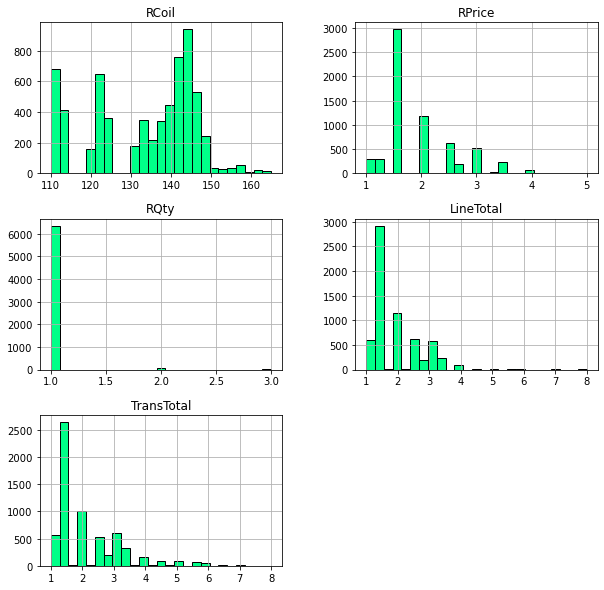

In [25]:
n_db.hist(figsize=(10,10), column = ["RCoil", "RPrice", "RQty", "LineTotal", "TransTotal"],histtype = 'bar', bins = 25, color = "#00ff88", edgecolor = "black");

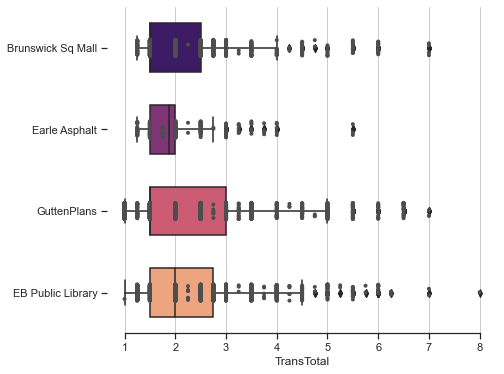

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))



# Plot the orbital period with horizontal boxes
sns.boxplot(x="TransTotal", y="Location", data=n_db,
            whis=1.5, width=.6, palette="magma")

# Add in points to show each observation
sns.stripplot(x="TransTotal", y="Location", data=n_db,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [27]:
n_db.groupby('Machine')['TransTotal'].sum()

Machine
BSQ Mall x1364 - Zales     1486.00
BSQ Mall x1366 - ATT       1269.00
EB Public Library x1380    4365.25
Earle Asphalt x1371        1261.00
GuttenPlans x1367          5680.75
Name: TransTotal, dtype: float64

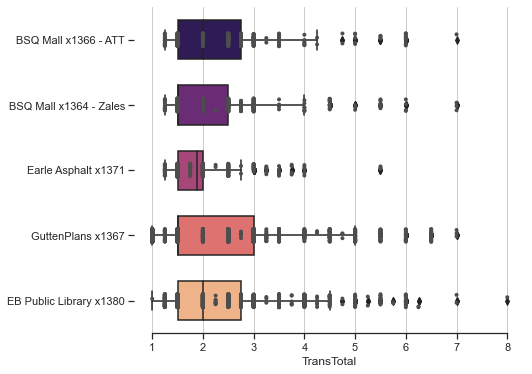

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))



# Plot the orbital period with horizontal boxes
sns.boxplot(x="TransTotal", y="Machine", data=n_db,
            whis=1.5, width=.6, palette="magma")

# Add in points to show each observation
sns.stripplot(x="TransTotal", y="Machine", data=n_db,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

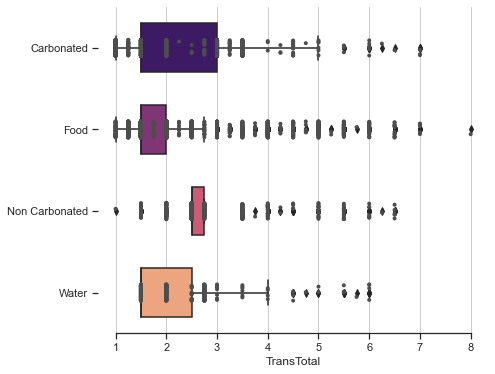

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))



# Plot the orbital period with horizontal boxes
sns.boxplot(x="TransTotal", y="Category", data=n_db,
            whis=1.5, width=.6, palette="magma")

# Add in points to show each observation
sns.stripplot(x="TransTotal", y="Category", data=n_db,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [30]:
n_db.groupby('Type')['TransTotal'].sum()

Type
Cash      7981.5
Credit    6080.5
Name: TransTotal, dtype: float64

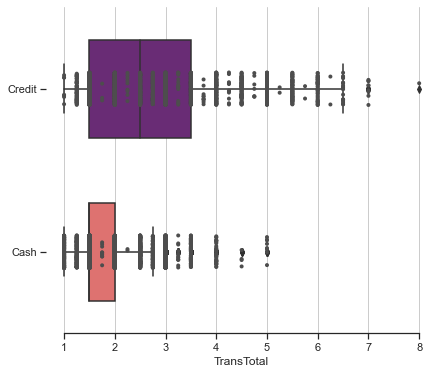

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))



# Plot the orbital period with horizontal boxes
sns.boxplot(x="TransTotal", y="Type", data=n_db,
            whis=1.5, width=.6, palette="magma")

# Add in points to show each observation
sns.stripplot(x="TransTotal", y="Type", data=n_db,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

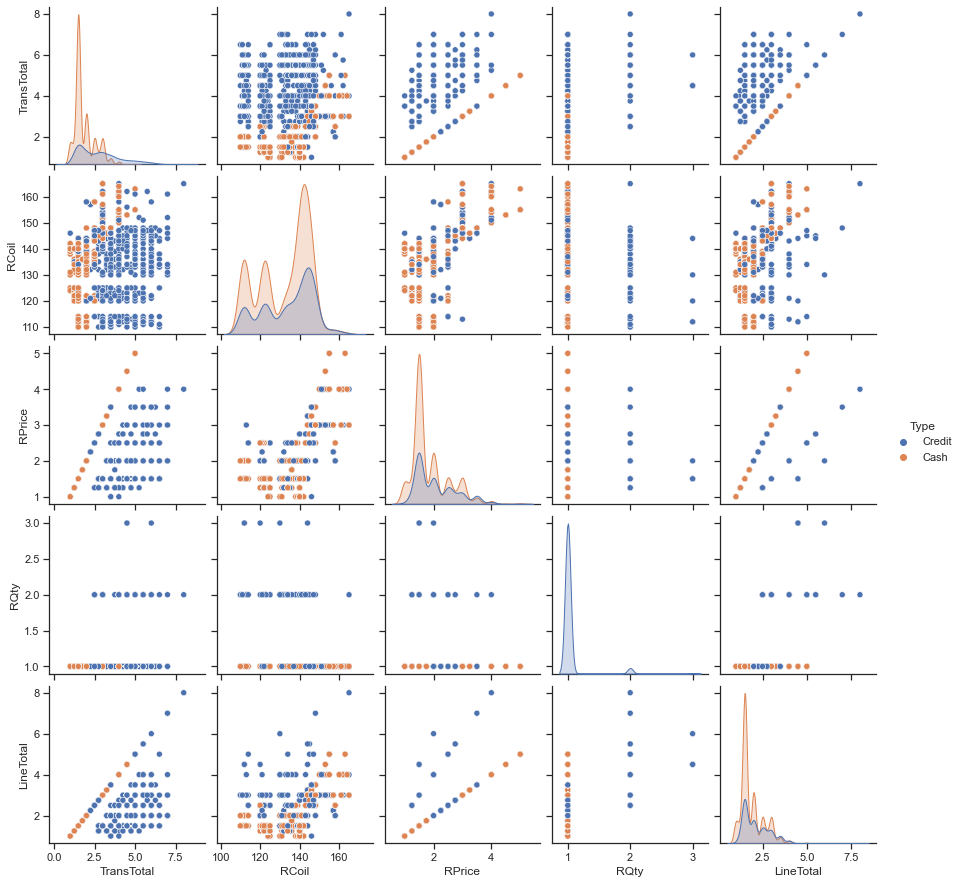

In [32]:
lis = ["TransTotal", "RCoil", "RPrice", "RQty","LineTotal", "Type"]
sns.pairplot(data = n_db[lis], hue = "Type");

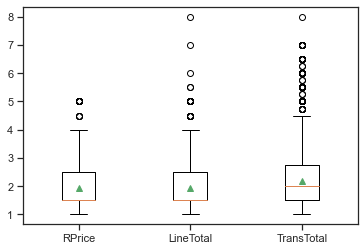

In [33]:
numerical = ["RPrice", "LineTotal", "TransTotal"]
plt.boxplot(n_db[numerical], labels = numerical, showmeans = True);

# Feature Engineering <a class="anchor" id="fifth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [34]:
n_db

,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Prcd Date
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,3.5,1/1/2022
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,5.0,1/1/2022
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,1.5,5.0,1/1/2022
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,1.5,1.5,1/1/2022
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,3.5,1/1/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,15603201222,"Wednesday, August 31, 2022",Credit,122,2.0,1,2.0,6.0,8/31/2022
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,15603201222,"Wednesday, August 31, 2022",Credit,131,2.0,1,2.0,6.0,8/31/2022
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,15603201222,"Wednesday, August 31, 2022",Credit,137,2.0,1,2.0,6.0,8/31/2022
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,15603853105,"Wednesday, August 31, 2022",Credit,145,2.5,1,2.5,2.5,8/31/2022


In [35]:
n_db[n_db["TransTotal"]>6]

,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Prcd Date
679,GuttenPlans,GuttenPlans x1367,Jack Links Beef Steak Original,Food,14686135261,"Friday, February 11, 2022",Credit,133,2.00,1,2.00,6.50,2/11/2022
680,GuttenPlans,GuttenPlans x1367,Popchips Potato - Barbeque,Food,14686135261,"Friday, February 11, 2022",Credit,114,1.50,1,1.50,6.50,2/11/2022
681,GuttenPlans,GuttenPlans x1367,Monster Energy Original,Carbonated,14686135261,"Friday, February 11, 2022",Credit,144,3.00,1,3.00,6.50,2/11/2022
782,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Original,Carbonated,14711605715,"Thursday, February 17, 2022",Credit,148,3.50,2,7.00,7.00,2/17/2022
783,GuttenPlans,GuttenPlans x1367,Jack Links Beef Steak Original,Food,14711662400,"Thursday, February 17, 2022",Credit,133,2.00,1,2.00,7.00,2/17/2022
784,GuttenPlans,GuttenPlans x1367,KitKat - Crisp Wafers,Food,14711662400,"Thursday, February 17, 2022",Credit,134,2.00,1,2.00,7.00,2/17/2022
785,GuttenPlans,GuttenPlans x1367,Monster Energy Original,Carbonated,14711662400,"Thursday, February 17, 2022",Credit,144,3.00,1,3.00,7.00,2/17/2022
801,GuttenPlans,GuttenPlans x1367,Jack Links Beef Steak Original,Food,14714781621,"Friday, February 18, 2022",Credit,133,2.00,1,2.00,6.50,2/18/2022
802,GuttenPlans,GuttenPlans x1367,KitKat - Crisp Wafers,Food,14714781621,"Friday, February 18, 2022",Credit,134,2.00,1,2.00,6.50,2/18/2022
803,GuttenPlans,GuttenPlans x1367,Snapple Tea - Raspberry,Non Carbonated,14714781621,"Friday, February 18, 2022",Credit,147,2.50,1,2.50,6.50,2/18/2022


We do not drop outliers since they make sense.

Let us decompose the date column into day of the week and month:

In [36]:
n_db["Date_Split"]=n_db["TransDate"].str.split(", ")

In [37]:
n_db

,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Prcd Date,Date_Split
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,3.5,1/1/2022,"[Saturday, January 1, 2022]"
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,5.0,1/1/2022,"[Saturday, January 1, 2022]"
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,1.5,5.0,1/1/2022,"[Saturday, January 1, 2022]"
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,1.5,1.5,1/1/2022,"[Saturday, January 1, 2022]"
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,3.5,1/1/2022,"[Saturday, January 1, 2022]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,15603201222,"Wednesday, August 31, 2022",Credit,122,2.0,1,2.0,6.0,8/31/2022,"[Wednesday, August 31, 2022]"
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,15603201222,"Wednesday, August 31, 2022",Credit,131,2.0,1,2.0,6.0,8/31/2022,"[Wednesday, August 31, 2022]"
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,15603201222,"Wednesday, August 31, 2022",Credit,137,2.0,1,2.0,6.0,8/31/2022,"[Wednesday, August 31, 2022]"
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,15603853105,"Wednesday, August 31, 2022",Credit,145,2.5,1,2.5,2.5,8/31/2022,"[Wednesday, August 31, 2022]"


In [38]:
n_db[["Day_of_Week","Month+Day","Year"]]=pd.DataFrame(n_db.Date_Split.tolist(),index=n_db.index)

In [39]:
n_db

,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Prcd Date,Date_Split,Day_of_Week,Month+Day,Year
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,3.5,1/1/2022,"[Saturday, January 1, 2022]",Saturday,January 1,2022
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,5.0,1/1/2022,"[Saturday, January 1, 2022]",Saturday,January 1,2022
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,1.5,5.0,1/1/2022,"[Saturday, January 1, 2022]",Saturday,January 1,2022
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,1.5,1.5,1/1/2022,"[Saturday, January 1, 2022]",Saturday,January 1,2022
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,3.5,1,3.5,3.5,1/1/2022,"[Saturday, January 1, 2022]",Saturday,January 1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,15603201222,"Wednesday, August 31, 2022",Credit,122,2.0,1,2.0,6.0,8/31/2022,"[Wednesday, August 31, 2022]",Wednesday,August 31,2022
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,15603201222,"Wednesday, August 31, 2022",Credit,131,2.0,1,2.0,6.0,8/31/2022,"[Wednesday, August 31, 2022]",Wednesday,August 31,2022
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,15603201222,"Wednesday, August 31, 2022",Credit,137,2.0,1,2.0,6.0,8/31/2022,"[Wednesday, August 31, 2022]",Wednesday,August 31,2022
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,15603853105,"Wednesday, August 31, 2022",Credit,145,2.5,1,2.5,2.5,8/31/2022,"[Wednesday, August 31, 2022]",Wednesday,August 31,2022


Let us drop duplicate columns:

In [40]:
n_db=n_db.drop(["TransDate","Date_Split"],axis=1)

Let us classify working and non working days (weekends+holidays(aggiungi link)):

In [41]:
holiday=["January 1","January 17","February 21","April 15","May 30","June 17","July 4"]
n=(n_db["Day_of_Week"]=="Saturday") | (n_db["Day_of_Week"]=="Sunday") 
m=n_db["Month+Day"].isin(holiday)

In [42]:
n_db["Festive"]=np.where(n|m,1,0)

We drop the year column as all data is from 2022

In [43]:
n_db=n_db.drop(["Year"],axis=1)

We create dummy variables for each day of the week

In [44]:
l=[]
for i in range(len(n_db["Month+Day"])):
    l.append(n_db["Month+Day"].iloc[i].split(" ")[0])
n_db["Month"]=l

In [45]:
n_db = n_db.drop(["Month+Day","Prcd Date"],axis=1)

In [46]:
n_db

,Location,Machine,Product,Category,Transaction,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Day_of_Week,Festive,Month
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,Credit,148,3.5,1,3.5,3.5,Saturday,1,January
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,Credit,148,3.5,1,3.5,5.0,Saturday,1,January
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,Credit,123,1.5,1,1.5,5.0,Saturday,1,January
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,Credit,123,1.5,1,1.5,1.5,Saturday,1,January
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,Credit,148,3.5,1,3.5,3.5,Saturday,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,15603201222,Credit,122,2.0,1,2.0,6.0,Wednesday,0,August
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,15603201222,Credit,131,2.0,1,2.0,6.0,Wednesday,0,August
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,15603201222,Credit,137,2.0,1,2.0,6.0,Wednesday,0,August
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,15603853105,Credit,145,2.5,1,2.5,2.5,Wednesday,0,August


In [47]:
#n_db=n_db.drop(["RCoil"],axis=1)

In [48]:
print(n_db["RQty"].value_counts())

1    6360
2      76
3       5
Name: RQty, dtype: int64


In [50]:
n_db[n_db["RQty"] == 2].TransTotal.mean()

4.338815789473684

In [52]:
n_db = n_db.drop(['Transaction'], axis=1)

In [53]:
n_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 6444
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     6441 non-null   object 
 1   Machine      6441 non-null   object 
 2   Product      6441 non-null   object 
 3   Category     6441 non-null   object 
 4   Type         6441 non-null   object 
 5   RCoil        6441 non-null   int64  
 6   RPrice       6441 non-null   float64
 7   RQty         6441 non-null   int64  
 8   LineTotal    6441 non-null   float64
 9   TransTotal   6441 non-null   float64
 10  Day_of_Week  6441 non-null   object 
 11  Festive      6441 non-null   int64  
 12  Month        6441 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 962.5+ KB


## Exploratory Data Analysis <a class="anchor" id="sixth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

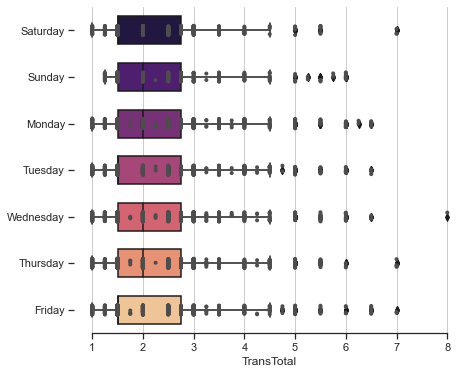

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))



# Plot the orbital period with horizontal boxes
sns.boxplot(x="TransTotal", y="Day_of_Week", data=n_db,
            whis=1.5, width=.6, palette="magma")

# Add in points to show each observation
sns.stripplot(x="TransTotal", y="Day_of_Week", data=n_db,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [55]:
a = n_db.groupby('Day_of_Week')['TransTotal'].mean()
a

Day_of_Week
Friday       2.148522
Monday       2.192571
Saturday     2.137061
Sunday       2.285901
Thursday     2.171493
Tuesday      2.164568
Wednesday    2.229223
Name: TransTotal, dtype: float64

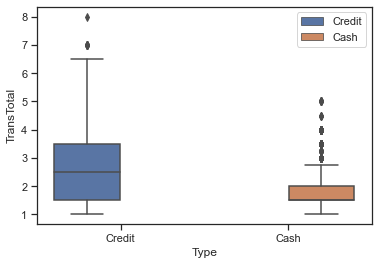

In [56]:
sns.boxplot(data=n_db, x="Type", y="TransTotal", hue = "Type");
plt.legend(loc='upper right')

In [57]:
n_db['hor_eye'] = np.nan

In [58]:
n_db

,Location,Machine,Product,Category,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Day_of_Week,Festive,Month,hor_eye
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,3.5,Saturday,1,January,NaN
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,5.0,Saturday,1,January,NaN
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,123,1.5,1,1.5,5.0,Saturday,1,January,NaN
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,123,1.5,1,1.5,1.5,Saturday,1,January,NaN
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,3.5,Saturday,1,January,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,Credit,122,2.0,1,2.0,6.0,Wednesday,0,August,NaN
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,Credit,131,2.0,1,2.0,6.0,Wednesday,0,August,NaN
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,Credit,137,2.0,1,2.0,6.0,Wednesday,0,August,NaN
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,Credit,145,2.5,1,2.5,2.5,Wednesday,0,August,NaN


In [59]:
n_db.groupby('hor_eye')['TransTotal'].sum()

Series([], Name: TransTotal, dtype: float64)

In [60]:
for i in range(len(n_db)):
    n_db['hor_eye'].loc[n_db.index[i]] = int(str(n_db['RCoil'].loc[n_db.index[i]])[1])

In [64]:
a = n_db.groupby('RCoil')['RPrice'].mean()
b = a.to_frame()
data = pd.DataFrame({'RCoil': range(110,170),
                   'Total': 0},
                   columns = ['RCoil', 'Total'])
data = pd.merge(b, data, left_on="RCoil", right_on="RCoil")
data.drop(['Total'], axis=1, inplace= True)
data['Row'] = np.nan
data['Column'] = np.nan
for i in range(len(data)):
    data['Row'].loc[data.index[i]] = int(str(data['RCoil'].loc[data.index[i]])[1])
    data['Column'].loc[data.index[i]] = int(str(data['RCoil'].loc[data.index[i]])[2])
data.drop(['RCoil'], axis=1, inplace = True)
datas = pd.DataFrame(np.nan, index=[i for i in range(1,7)], columns=[i for i in range(0,10)])
for i in range(len(data)):
    a = data['Row'].loc[data.index[i]]
    b = data['Column'].loc[data.index[i]]
    c = data['RPrice'].loc[data.index[i]]
    datas[a][b] = c
datas.drop([0,6,7,8,9], axis =1, inplace = True)
datas

,1,2,3,4,5
1,1.518672,1.570961,1.836207,1.492775,3.888889
2,1.537037,1.467045,1.850000,1.432039,3.952381
3,1.512766,1.460199,2.067568,2.380435,4.000000
4,1.625714,1.378440,2.023179,2.075314,3.500000
5,NaN,1.387500,1.855691,2.573276,4.533333
6,NaN,NaN,1.962766,3.115942,3.000000


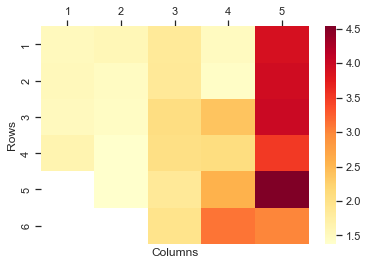

In [65]:
ax = sns.heatmap(datas, cmap = 'YlOrRd')
ax.set(xlabel="Columns", ylabel="Rows")
ax.xaxis.tick_top()

Other Stuff

In [62]:
n_db

,Location,Machine,Product,Category,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Day_of_Week,Festive,Month,hor_eye
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,3.5,Saturday,1,January,4.0
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,5.0,Saturday,1,January,4.0
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,123,1.5,1,1.5,5.0,Saturday,1,January,2.0
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,123,1.5,1,1.5,1.5,Saturday,1,January,2.0
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,3.5,Saturday,1,January,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,Credit,122,2.0,1,2.0,6.0,Wednesday,0,August,2.0
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,Credit,131,2.0,1,2.0,6.0,Wednesday,0,August,3.0
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,Credit,137,2.0,1,2.0,6.0,Wednesday,0,August,3.0
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,Credit,145,2.5,1,2.5,2.5,Wednesday,0,August,4.0


<AxesSubplot:xlabel='Day_of_Week'>

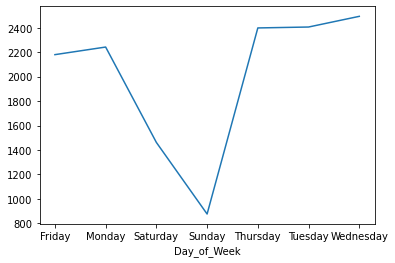

In [109]:
n_db.groupby('Day_of_Week')["TransTotal"].sum().plot()

No handles with labels found to put in legend.


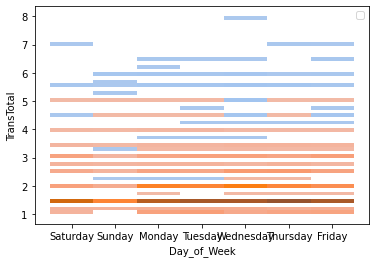

In [107]:
sns.histplot(data=n_db, x="Day_of_Week", y="TransTotal", hue = "Type");
plt.legend(loc='upper right')

<AxesSubplot:xlabel='Day_of_Week'>

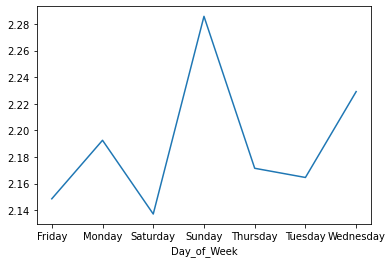

In [65]:
n_db.groupby('Day_of_Week')["TransTotal"].mean().plot()

In [66]:
n_db.groupby(['Type', 'Day_of_Week'])["TransTotal"].mean()

Type    Day_of_Week
Cash    Friday         1.837644
        Monday         1.847243
        Saturday       1.923684
        Sunday         1.868834
        Thursday       1.854058
        Tuesday        1.836763
        Wednesday      1.868385
Credit  Friday         2.826803
        Monday         2.850852
        Saturday       2.622010
        Sunday         2.867188
        Thursday       2.882698
        Tuesday        2.788512
        Wednesday      2.925393
Name: TransTotal, dtype: float64

In [67]:
n_db.groupby('Type')["TransTotal"].mean()

Type
Cash      1.858324
Credit    2.833411
Name: TransTotal, dtype: float64

# First Ttest <a class="anchor" id="seventh-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [68]:
from scipy import stats
stats.ttest_ind(a=n_db[n_db['Type'] == 'Cash'].TransTotal, b=n_db[n_db['Type']== 'Credit'].TransTotal, equal_var=False)

Ttest_indResult(statistic=-31.916125815473997, pvalue=1.4498531340664352e-189)

There is a significant difference between cash and credit. Now we are looking for inheristic differences.

# Cash vs Credit Comparison <a class="anchor" id="eighth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

n_db dataset is set. After this point there isn't any operation on the original ready n_db dataset!

In [69]:
d_cash = n_db[n_db['Type'] == 'Cash']
d_credit = n_db[n_db['Type'] == 'Credit']

In [70]:
d_credit.groupby('Category')["TransTotal"].mean()

Category
Carbonated        2.740909
Food              2.842359
Non Carbonated    3.224379
Water             2.336788
Name: TransTotal, dtype: float64

In [71]:
d_credit.groupby('Day_of_Week')["TransTotal"].mean()

Day_of_Week
Friday       2.826803
Monday       2.850852
Saturday     2.622010
Sunday       2.867188
Thursday     2.882698
Tuesday      2.788512
Wednesday    2.925393
Name: TransTotal, dtype: float64

In [72]:
d_cash.groupby('Day_of_Week')["TransTotal"].mean()

Day_of_Week
Friday       1.837644
Monday       1.847243
Saturday     1.923684
Sunday       1.868834
Thursday     1.854058
Tuesday      1.836763
Wednesday    1.868385
Name: TransTotal, dtype: float64

(<AxesSubplot:>, <AxesSubplot:>)

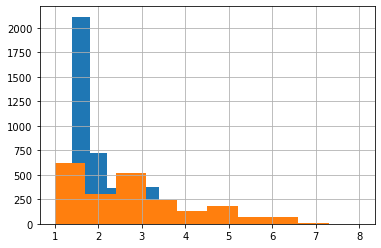

In [73]:
d_cash['TransTotal'].hist(), d_credit['TransTotal'].hist()

In [74]:
d_cash.groupby('Category')["TransTotal"].mean(), d_credit.groupby('Category')["TransTotal"].mean()

(Category
 Carbonated        1.933788
 Food              1.707926
 Non Carbonated    2.519704
 Water             1.828448
 Name: TransTotal, dtype: float64,
 Category
 Carbonated        2.740909
 Food              2.842359
 Non Carbonated    3.224379
 Water             2.336788
 Name: TransTotal, dtype: float64)

In [75]:
d_cash.groupby('Category')["RPrice"].mean(), d_credit.groupby('Category')["RPrice"].mean()

(Category
 Carbonated        1.933788
 Food              1.707926
 Non Carbonated    2.519704
 Water             1.828448
 Name: RPrice, dtype: float64,
 Category
 Carbonated        2.398864
 Food              1.813182
 Non Carbonated    2.643634
 Water             1.880829
 Name: RPrice, dtype: float64)

# Second T-test <a class="anchor" id="ninth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [76]:
from scipy import stats
stats.ttest_ind(a=d_cash[d_cash['Category'] == 'Carbonated'].RPrice, b=d_credit[d_credit['Category'] == 'Carbonated'].RPrice, equal_var=False)

Ttest_indResult(statistic=-10.086287115574407, pvalue=1.4600523938525717e-22)

There is a significant difference between RetailPrice of Carbonated products that are preferred by card users vs cash user!

# Cash-Carbonated vs Credit-Carbonated <a class="anchor" id="tenth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [77]:
carbonated_cash = d_cash[d_cash['Category'] == 'Carbonated']
carbonated_credit =d_credit[d_credit['Category'] == 'Carbonated']

In [78]:
l = carbonated_cash.groupby('Product')['RPrice'].mean()-carbonated_credit.groupby('Product')['RPrice'].mean() == 0
#carbonated["Product"][l]
l = l[l==False]
la = l[l==False].index

In [79]:
carbonated_differ = n_db.loc[n_db['Product'].isin(la)]
carbonated_differ['Product'].value_counts()

Coca Cola - Zero Sugar                      517
Monster Energy Original                     385
Sunkist Soda - Orange                       217
Red Bull - Original                         157
Coca Cola - Regular                         155
Starbucks Refresher - Real Coconut Water     53
Canada Dry - Ginger Ale & Lemonde            32
Keto Krisp - Almond Butter                   27
Spindrift - Sparkling Water  Lime            22
Keto Krisp - Almond/Chocolate                15
Canada Dry - Ginger Ale                      15
Remedy Kombucha - Ginger Lemon                2
Name: Product, dtype: int64

In [80]:
carbonated_differ_g = carbonated_differ.drop(['Month','TransTotal','Festive','Location','Type','Machine','Category','RQty','LineTotal','Day_of_Week'],axis=1)
carbonated_differ_g

,Product,RCoil,RPrice,hor_eye
8,Monster Energy Original,144,3.0,4.0
17,Monster Energy Original,146,3.0,4.0
19,Monster Energy Original,146,3.0,4.0
20,Monster Energy Original,144,3.0,4.0
21,Spindrift - Sparkling Water Lime,140,1.0,4.0
...,...,...,...,...
6387,Starbucks Refresher - Real Coconut Water,148,3.0,4.0
6390,Coca Cola - Zero Sugar,140,1.5,4.0
6397,Coca Cola - Zero Sugar,141,2.0,4.0
6400,Coca Cola - Zero Sugar,141,2.0,4.0


Product
Canada Dry - Ginger Ale                     AxesSubplot(0.125,0.125;0.775x0.755)
Canada Dry - Ginger Ale & Lemonde           AxesSubplot(0.125,0.125;0.775x0.755)
Coca Cola - Regular                         AxesSubplot(0.125,0.125;0.775x0.755)
Coca Cola - Zero Sugar                      AxesSubplot(0.125,0.125;0.775x0.755)
Keto Krisp - Almond Butter                  AxesSubplot(0.125,0.125;0.775x0.755)
Keto Krisp - Almond/Chocolate               AxesSubplot(0.125,0.125;0.775x0.755)
Monster Energy Original                     AxesSubplot(0.125,0.125;0.775x0.755)
Red Bull - Original                         AxesSubplot(0.125,0.125;0.775x0.755)
Remedy Kombucha - Ginger Lemon              AxesSubplot(0.125,0.125;0.775x0.755)
Spindrift - Sparkling Water  Lime           AxesSubplot(0.125,0.125;0.775x0.755)
Starbucks Refresher - Real Coconut Water    AxesSubplot(0.125,0.125;0.775x0.755)
Sunkist Soda - Orange                       AxesSubplot(0.125,0.125;0.775x0.755)
Name: RPrice, dtype:

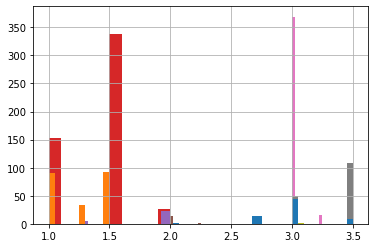

In [81]:
carbonated_differ_g.groupby('Product')['RPrice'].hist()

In [82]:
carbonated_differ_g.groupby('Product')['RPrice'].value_counts()

Product                                   RPrice
Canada Dry - Ginger Ale                   2.75       14
                                          2.00        1
Canada Dry - Ginger Ale & Lemonde         1.50       22
                                          2.00       10
Coca Cola - Regular                       1.50      145
                                          2.00       10
Coca Cola - Zero Sugar                    1.50      339
                                          1.00      152
                                          2.00       26
Keto Krisp - Almond Butter                2.00       22
                                          1.25        5
Keto Krisp - Almond/Chocolate             2.00       14
                                          2.25        1
Monster Energy Original                   3.00      369
                                          3.25       16
Red Bull - Original                       3.50      108
                                          3.00       49

In [83]:
cola_zero = carbonated_differ.loc[carbonated_differ['Product'] == 'Coca Cola - Zero Sugar']
cola_zero.groupby('RPrice')['Location'].value_counts()

RPrice  Location         
1.0     GuttenPlans          152
1.5     EB Public Library    140
        GuttenPlans          128
        Brunswick Sq Mall     61
        Earle Asphalt         10
2.0     EB Public Library     26
Name: Location, dtype: int64

In [84]:
cola_zero

,Location,Machine,Product,Category,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Day_of_Week,Festive,Month,hor_eye
112,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,Cash,142,1.0,1,1.0,1.0,Thursday,0,January,4.0
120,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,Cash,141,1.0,1,1.0,1.0,Thursday,0,January,4.0
121,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,Cash,142,1.0,1,1.0,1.0,Thursday,0,January,4.0
123,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,Cash,141,1.0,1,1.0,1.0,Friday,0,January,4.0
140,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,Cash,141,1.0,1,1.0,1.0,Friday,0,January,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,Cash,141,2.0,1,2.0,2.0,Monday,0,August,4.0
6382,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,Credit,141,2.0,1,2.0,2.0,Monday,0,August,4.0
6390,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Coca Cola - Zero Sugar,Carbonated,Credit,140,1.5,1,1.5,6.0,Monday,0,August,4.0
6397,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,Cash,141,2.0,1,2.0,2.0,Tuesday,0,August,4.0


In [85]:
cola_zero.groupby('RPrice')['Month'].value_counts()

RPrice  Month   
1.0     January     52
        March       45
        February    43
        April       12
1.5     April       88
        May         84
        July        66
        June        65
        March       23
        February     8
        August       5
2.0     August      26
Name: Month, dtype: int64

In [86]:
carbonated = n_db[n_db['Category']=='Carbonated']
carbonated.groupby('Product')['RPrice'].mean()

Product
Bubly - Cherry                                   1.500000
Bubly - Mango                                    1.500000
Canada Dry - Ginger Ale                          2.700000
Canada Dry - Ginger Ale & Lemonde                1.656250
Coca Cola - Regular                              1.532258
Coca Cola - Zero Sugar                           1.378143
Keto Krisp - Almond Butter                       1.861111
Keto Krisp - Almond/Chocolate                    2.016667
Monster Energy  Zero Ultra                       3.000000
Monster Energy Original                          3.010390
Red Bull - Energy Drink - Sugar Free             3.500000
Red Bull - Original                              3.343949
Remedy Kombucha - Ginger Lemon                   3.000000
S. Pellegrino Essenza Mineral Water - Blood O    2.500000
Spindrift - Sparkling Water  Lime                1.431818
Spindrift - Sparkling Water - Pineapple          1.500000
Starbucks Refresher - Real Coconut Water         3.075472
Sunkis

In [87]:
carbonated = n_db[n_db['Category']=='Carbonated']
carbonated.groupby('RPrice')['Product'].count()

RPrice
1.00    245
1.25     39
1.50    679
2.00     83
2.25      1
2.50      3
2.75     14
3.00    469
3.25     16
3.50    137
Name: Product, dtype: int64

In [88]:
carbonated.groupby('Product')['RPrice'].sum()

Product
Bubly - Cherry                                      7.50
Bubly - Mango                                       7.50
Canada Dry - Ginger Ale                            40.50
Canada Dry - Ginger Ale & Lemonde                  53.00
Coca Cola - Regular                               237.50
Coca Cola - Zero Sugar                            712.50
Keto Krisp - Almond Butter                         50.25
Keto Krisp - Almond/Chocolate                      30.25
Monster Energy  Zero Ultra                         12.00
Monster Energy Original                          1159.00
Red Bull - Energy Drink - Sugar Free               73.50
Red Bull - Original                               525.00
Remedy Kombucha - Ginger Lemon                      6.00
S. Pellegrino Essenza Mineral Water - Blood O       7.50
Spindrift - Sparkling Water  Lime                  31.50
Spindrift - Sparkling Water - Pineapple            76.50
Starbucks Refresher - Real Coconut Water          163.00
Sunkist Soda - Orange  

## Location  <a class="anchor" id="eleventh-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [89]:
n_db

,Location,Machine,Product,Category,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Day_of_Week,Festive,Month,hor_eye
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,3.5,Saturday,1,January,4.0
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,5.0,Saturday,1,January,4.0
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,123,1.5,1,1.5,5.0,Saturday,1,January,2.0
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,123,1.5,1,1.5,1.5,Saturday,1,January,2.0
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,3.5,Saturday,1,January,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,Credit,122,2.0,1,2.0,6.0,Wednesday,0,August,2.0
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,Credit,131,2.0,1,2.0,6.0,Wednesday,0,August,3.0
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,Credit,137,2.0,1,2.0,6.0,Wednesday,0,August,3.0
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,Credit,145,2.5,1,2.5,2.5,Wednesday,0,August,4.0


In [90]:
n_db.Location.value_counts()

GuttenPlans          2567
EB Public Library    1919
Brunswick Sq Mall    1279
Earle Asphalt         676
Name: Location, dtype: int64

In [91]:
n_db.groupby(['Location', 'Day_of_Week'])['TransTotal'].mean()

Location           Day_of_Week
Brunswick Sq Mall  Friday         2.051775
                   Monday         2.263081
                   Saturday       2.177419
                   Sunday         2.205628
                   Thursday       2.318966
                   Tuesday        2.035294
                   Wednesday      2.021127
EB Public Library  Friday         2.304612
                   Monday         2.288288
                   Saturday       2.210976
                   Sunday         2.407986
                   Thursday       2.256818
                   Tuesday        2.236232
                   Wednesday      2.281601
Earle Asphalt      Friday         1.905357
                   Monday         1.892857
                   Saturday       1.583333
                   Sunday         1.375000
                   Thursday       1.807252
                   Tuesday        1.812500
                   Wednesday      1.913603
GuttenPlans        Friday         2.185000
                   Mond

In [92]:
n_db.groupby(['Location','Day_of_Week'])['TransTotal'].sum()

Location           Day_of_Week
Brunswick Sq Mall  Friday          346.75
                   Monday          389.25
                   Saturday        607.50
                   Sunday          509.50
                   Thursday        269.00
                   Tuesday         346.00
                   Wednesday       287.00
EB Public Library  Friday          474.75
                   Monday          762.00
                   Saturday        453.25
                   Sunday          346.75
                   Thursday        744.75
                   Tuesday         771.50
                   Wednesday       812.25
Earle Asphalt      Friday          266.75
                   Monday          265.00
                   Saturday          4.75
                   Sunday            2.75
                   Thursday        236.75
                   Tuesday         224.75
                   Wednesday       260.25
GuttenPlans        Friday         1092.50
                   Monday          826.75
   

Brunswick = n_db[n_db['Location']=='Brunswick Sq Mall'] #Mall with average foot traffic 7 days a week
Brunswick.groupby('Day_of_Week')['TransTotal'].sum()
GuttenPlans = n_db[n_db['Location']=='GuttenPlans'] #Frozen dough specialist company that operates 24/5
GuttenPlans.groupby('Day_of_Week')['TransTotal'].sum()
Earle_Asphalt = n_db[n_db['Location']=='Earle Asphalt'] #A construction engineering firm that operates 5 days a week.
Earle_Asphalt.groupby('Day_of_Week')['TransTotal'].sum()
EB_Public_Library = n_db[n_db['Location']=='EB Public Library'] #- Public library that has high foot traffic 5-6 days a week.
EB_Public_Library.groupby('Day_of_Week')['TransTotal'].sum()

## RCoil  <a class="anchor" id="twelfth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

Analysis on RCoil, do products at the eye level sell more?

In [93]:
n_db

,Location,Machine,Product,Category,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Day_of_Week,Festive,Month,hor_eye
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,3.5,Saturday,1,January,4.0
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,5.0,Saturday,1,January,4.0
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,123,1.5,1,1.5,5.0,Saturday,1,January,2.0
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,123,1.5,1,1.5,1.5,Saturday,1,January,2.0
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,148,3.5,1,3.5,3.5,Saturday,1,January,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,Credit,122,2.0,1,2.0,6.0,Wednesday,0,August,2.0
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,Credit,131,2.0,1,2.0,6.0,Wednesday,0,August,3.0
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,Credit,137,2.0,1,2.0,6.0,Wednesday,0,August,3.0
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,Credit,145,2.5,1,2.5,2.5,Wednesday,0,August,4.0


<AxesSubplot:xlabel='RCoil'>

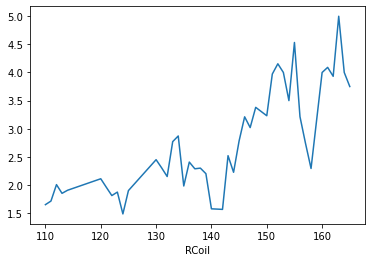

In [94]:
n_db.groupby('RCoil')['TransTotal'].mean().plot()

<AxesSubplot:xlabel='RCoil'>

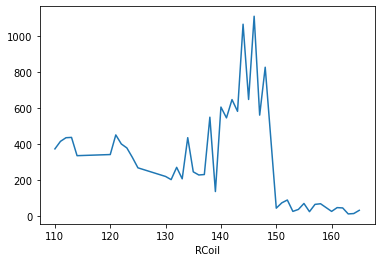

In [95]:
n_db.groupby('RCoil')['TransTotal'].sum().plot()

    Some other stuff

Only difference based on the days are the sum not the mean. Meaning the overall number of transaction are more during the weekend. But there is no difference in terms of the mean!

In [96]:
n_db.groupby('Day_of_Week')["TransTotal"].mean()

Day_of_Week
Friday       2.148522
Monday       2.192571
Saturday     2.137061
Sunday       2.285901
Thursday     2.171493
Tuesday      2.164568
Wednesday    2.229223
Name: TransTotal, dtype: float64

In [97]:
n_db.groupby('Day_of_Week')["TransTotal"].sum()

Day_of_Week
Friday       2180.75
Monday       2243.00
Saturday     1461.75
Sunday        875.50
Thursday     2399.50
Tuesday      2407.00
Wednesday    2494.50
Name: TransTotal, dtype: float64

In [98]:
n_db.groupby('Month')["TransTotal"].sum()

Month
April       1790.25
August      2339.00
February    1050.50
January      950.75
July        2529.00
June        2177.25
March       1331.00
May         1894.25
Name: TransTotal, dtype: float64

In [99]:
n_db.groupby('Location')["TransTotal"].sum()

Location
Brunswick Sq Mall    2755.00
EB Public Library    4365.25
Earle Asphalt        1261.00
GuttenPlans          5680.75
Name: TransTotal, dtype: float64

In [100]:
n_db.groupby('Machine')["TransTotal"].sum()

Machine
BSQ Mall x1364 - Zales     1486.00
BSQ Mall x1366 - ATT       1269.00
EB Public Library x1380    4365.25
Earle Asphalt x1371        1261.00
GuttenPlans x1367          5680.75
Name: TransTotal, dtype: float64

In [101]:
n_db.groupby('Product')["TransTotal"].sum()

Product
Autumns Granola Bar - Cinnamon Almond          40.00
Bai Antioxidant - Brasilia BB                  10.00
Bai Antioxidant - Kula Watermelon              13.75
Bai Antioxidant - Kupang strawberry kiwi       30.25
Bai Antioxidant - Molokai Coconut              31.50
                                               ...  
Vitamin Water - XXX Acai BB Pomegranate        46.75
Wonderful Pistachios - Variety                350.50
Zevia Organic Tea - Peach                       2.50
Zevia Zero Calorie Energy - Mango Ginger       15.00
Zone Perfect - Chocolate Chip Cookie Dough     11.50
Name: TransTotal, Length: 170, dtype: float64

In [102]:
n_db.groupby('Location')["Machine"]

In [103]:
print(n_db["Location"].value_counts())

GuttenPlans          2567
EB Public Library    1919
Brunswick Sq Mall    1279
Earle Asphalt         676
Name: Location, dtype: int64


## CatBoost  <a class="anchor" id="thirteenth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

CatBoost is a machine learning algorithm that uses gradient boosting on decision trees.

In [104]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [105]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [242]:
target = n_db["TransTotal"]

In [243]:
n_db=n_db.drop(["TransTotal"],axis=1)

In [244]:
n_db=n_db.drop(["LineTotal", "RPrice"],axis=1)

In [245]:
n_db=n_db.drop(["RCoil"],axis=1)

In [246]:
n_db

,Location,Machine,Product,Category,Type,RQty,Day_of_Week,Festive,Month,hor_eye
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,1,Saturday,1,January,4.0
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,1,Saturday,1,January,4.0
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,1,Saturday,1,January,2.0
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,Credit,1,Saturday,1,January,2.0
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,Credit,1,Saturday,1,January,4.0
...,...,...,...,...,...,...,...,...,...,...
6440,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,Credit,1,Wednesday,0,August,2.0
6441,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,Credit,1,Wednesday,0,August,3.0
6442,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,Credit,1,Wednesday,0,August,3.0
6443,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,Credit,1,Wednesday,0,August,4.0


In [247]:
train_dataset = cb.Pool(n_db, target, cat_features = ["Location", "Machine", "Product", "Category","Type", "Day_of_Week", "Festive", "Month"])

In [248]:
model = cb.CatBoostRegressor(loss_function="RMSE")

In [249]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 2.3390570	test: 2.4355499	best: 2.4355499 (0)	total: 61.4ms	remaining: 6.07s
1:	learn: 2.2800186	test: 2.3754599	best: 2.3754599 (1)	total: 63.8ms	remaining: 3.13s
2:	learn: 2.2229932	test: 2.3175409	best: 2.3175409 (2)	total: 65.4ms	remaining: 2.12s
3:	learn: 2.1680032	test: 2.2615760	best: 2.2615760 (3)	total: 66.5ms	remaining: 1.6s
4:	learn: 2.1149641	test: 2.2076379	best: 2.2076379 (4)	total: 68.3ms	remaining: 1.3s
5:	learn: 2.0649906	test: 2.1580085	best: 2.1580085 (5)	total: 69.2ms	remaining: 1.08s
6:	learn: 2.0155812	test: 2.1077150	best: 2.1077150 (6)	total: 70.2ms	remaining: 933ms
7:	learn: 1.9700511	test: 2.0625616	best: 2.0625616 (7)	total: 71.5ms	remaining: 822ms
8:	learn: 1.9240883	test: 2.0157486	best: 2.0157486 (8)	total: 72.6ms	remaining: 734ms
9:	learn: 1.8800331	test: 1.9722977	best: 1.9722977 (9)	total: 73.5ms	remaining: 662ms
10:	learn: 1.8373033	test: 1.9287472	best: 1.9287472 (10)	total: 74.3ms	remaining: 601ms
11:	learn: 1.7955478	test: 1.8863369	best: 

52:	learn: 0.7162652	test: 0.7809642	best: 0.7809642 (52)	total: 55.5ms	remaining: 49.2ms
53:	learn: 0.7156955	test: 0.7805877	best: 0.7805877 (53)	total: 57.2ms	remaining: 48.7ms
54:	learn: 0.7146789	test: 0.7793683	best: 0.7793683 (54)	total: 59.6ms	remaining: 48.8ms
55:	learn: 0.7138119	test: 0.7783242	best: 0.7783242 (55)	total: 62ms	remaining: 48.7ms
56:	learn: 0.7132032	test: 0.7773848	best: 0.7773848 (56)	total: 63.9ms	remaining: 48.2ms
57:	learn: 0.7128376	test: 0.7767086	best: 0.7767086 (57)	total: 66.7ms	remaining: 48.3ms
58:	learn: 0.7125881	test: 0.7764555	best: 0.7764555 (58)	total: 70ms	remaining: 48.7ms
59:	learn: 0.7121807	test: 0.7757850	best: 0.7757850 (59)	total: 71.8ms	remaining: 47.9ms
60:	learn: 0.7100563	test: 0.7721690	best: 0.7721690 (60)	total: 73.2ms	remaining: 46.8ms
61:	learn: 0.7097276	test: 0.7718574	best: 0.7718574 (61)	total: 74.5ms	remaining: 45.7ms
62:	learn: 0.7092551	test: 0.7714345	best: 0.7714345 (62)	total: 75.9ms	remaining: 44.5ms
63:	learn: 0.7

76:	learn: 0.8319803	test: 0.9090172	best: 0.9090172 (76)	total: 115ms	remaining: 34.5ms
77:	learn: 0.8275157	test: 0.9046955	best: 0.9046955 (77)	total: 120ms	remaining: 33.9ms
78:	learn: 0.8234952	test: 0.9005582	best: 0.9005582 (78)	total: 123ms	remaining: 32.8ms
79:	learn: 0.8194780	test: 0.8964733	best: 0.8964733 (79)	total: 126ms	remaining: 31.5ms
80:	learn: 0.8155590	test: 0.8923498	best: 0.8923498 (80)	total: 129ms	remaining: 30.4ms
81:	learn: 0.8119758	test: 0.8884845	best: 0.8884845 (81)	total: 133ms	remaining: 29.1ms
82:	learn: 0.8084850	test: 0.8849718	best: 0.8849718 (82)	total: 136ms	remaining: 27.8ms
83:	learn: 0.8049073	test: 0.8812770	best: 0.8812770 (83)	total: 137ms	remaining: 26.2ms
84:	learn: 0.8016386	test: 0.8778830	best: 0.8778830 (84)	total: 139ms	remaining: 24.5ms
85:	learn: 0.7983907	test: 0.8745758	best: 0.8745758 (85)	total: 140ms	remaining: 22.8ms
86:	learn: 0.7955641	test: 0.8715226	best: 0.8715226 (86)	total: 141ms	remaining: 21.1ms
87:	learn: 0.7926993	

1:	learn: 2.2801037	test: 2.3755045	best: 2.3755045 (1)	total: 3.17ms	remaining: 156ms
2:	learn: 2.2231310	test: 2.3176043	best: 2.3176043 (2)	total: 5.76ms	remaining: 186ms
3:	learn: 2.1681608	test: 2.2616563	best: 2.2616563 (3)	total: 8.28ms	remaining: 199ms
4:	learn: 2.1151566	test: 2.2077343	best: 2.2077343 (4)	total: 11.4ms	remaining: 217ms
5:	learn: 2.0651928	test: 2.1581141	best: 2.1581141 (5)	total: 14ms	remaining: 219ms
6:	learn: 2.0157977	test: 2.1078331	best: 2.1078331 (6)	total: 17.3ms	remaining: 230ms
7:	learn: 1.9702763	test: 2.0626884	best: 2.0626884 (7)	total: 18.7ms	remaining: 215ms
8:	learn: 1.9243230	test: 2.0158857	best: 2.0158857 (8)	total: 19.9ms	remaining: 201ms
9:	learn: 1.8803352	test: 1.9724906	best: 1.9724906 (9)	total: 21.6ms	remaining: 195ms
10:	learn: 1.8376244	test: 1.9289481	best: 1.9289481 (10)	total: 23.5ms	remaining: 190ms
11:	learn: 1.7958979	test: 1.8865677	best: 1.8865677 (11)	total: 24.6ms	remaining: 181ms
12:	learn: 1.7580719	test: 1.8490028	best

28:	learn: 0.7679385	test: 0.8440759	best: 0.8440759 (28)	total: 44.7ms	remaining: 109ms
29:	learn: 0.7629292	test: 0.8387362	best: 0.8387362 (29)	total: 47.2ms	remaining: 110ms
30:	learn: 0.7586792	test: 0.8343467	best: 0.8343467 (30)	total: 48.3ms	remaining: 108ms
31:	learn: 0.7551838	test: 0.8300937	best: 0.8300937 (31)	total: 50.8ms	remaining: 108ms
32:	learn: 0.7516835	test: 0.8252592	best: 0.8252592 (32)	total: 53.4ms	remaining: 108ms
33:	learn: 0.7486685	test: 0.8210182	best: 0.8210182 (33)	total: 55.3ms	remaining: 107ms
34:	learn: 0.7459818	test: 0.8186052	best: 0.8186052 (34)	total: 57.6ms	remaining: 107ms
35:	learn: 0.7437178	test: 0.8162280	best: 0.8162280 (35)	total: 58.6ms	remaining: 104ms
36:	learn: 0.7412449	test: 0.8129332	best: 0.8129332 (36)	total: 59.6ms	remaining: 101ms
37:	learn: 0.7392731	test: 0.8101509	best: 0.8101509 (37)	total: 61.1ms	remaining: 99.6ms
38:	learn: 0.7379868	test: 0.8084498	best: 0.8084498 (38)	total: 62.3ms	remaining: 97.4ms
39:	learn: 0.736386

69:	learn: 0.8638339	test: 0.9412467	best: 0.9412467 (69)	total: 98.2ms	remaining: 42.1ms
70:	learn: 0.8575326	test: 0.9349042	best: 0.9349042 (70)	total: 99.6ms	remaining: 40.7ms
71:	learn: 0.8516980	test: 0.9288453	best: 0.9288453 (71)	total: 103ms	remaining: 40ms
72:	learn: 0.8460332	test: 0.9231508	best: 0.9231508 (72)	total: 105ms	remaining: 38.9ms
73:	learn: 0.8409278	test: 0.9180406	best: 0.9180406 (73)	total: 107ms	remaining: 37.6ms
74:	learn: 0.8363276	test: 0.9132798	best: 0.9132798 (74)	total: 109ms	remaining: 36.2ms
75:	learn: 0.8316494	test: 0.9086113	best: 0.9086113 (75)	total: 111ms	remaining: 34.9ms
76:	learn: 0.8269626	test: 0.9038962	best: 0.9038962 (76)	total: 113ms	remaining: 33.9ms
77:	learn: 0.8226686	test: 0.8997297	best: 0.8997297 (77)	total: 115ms	remaining: 32.5ms
78:	learn: 0.8188000	test: 0.8957351	best: 0.8957351 (78)	total: 116ms	remaining: 30.9ms
79:	learn: 0.8153923	test: 0.8923588	best: 0.8923588 (79)	total: 117ms	remaining: 29.4ms
80:	learn: 0.8116464	

90:	learn: 0.7007213	test: 0.7589694	best: 0.7589694 (90)	total: 140ms	remaining: 13.8ms
91:	learn: 0.7003616	test: 0.7587235	best: 0.7587235 (91)	total: 143ms	remaining: 12.4ms
92:	learn: 0.7003483	test: 0.7587220	best: 0.7587220 (92)	total: 145ms	remaining: 10.9ms
93:	learn: 0.7002497	test: 0.7585074	best: 0.7585074 (93)	total: 147ms	remaining: 9.36ms
94:	learn: 0.6997339	test: 0.7578332	best: 0.7578332 (94)	total: 147ms	remaining: 7.76ms
95:	learn: 0.6996614	test: 0.7578425	best: 0.7578332 (94)	total: 149ms	remaining: 6.22ms
96:	learn: 0.6996612	test: 0.7578418	best: 0.7578332 (94)	total: 153ms	remaining: 4.72ms
97:	learn: 0.6996462	test: 0.7578406	best: 0.7578332 (94)	total: 155ms	remaining: 3.17ms
98:	learn: 0.6993830	test: 0.7576866	best: 0.7576866 (98)	total: 158ms	remaining: 1.59ms
99:	learn: 0.6993028	test: 0.7575052	best: 0.7575052 (99)	total: 161ms	remaining: 0us

bestTest = 0.7575051704
bestIteration = 99

7:	loss: 0.7575052	best: 0.7565612 (3)	total: 1.31s	remaining: 14.4s

84:	learn: 0.8008782	test: 0.8769918	best: 0.8769918 (84)	total: 174ms	remaining: 133ms
85:	learn: 0.7976362	test: 0.8736894	best: 0.8736894 (85)	total: 178ms	remaining: 132ms
86:	learn: 0.7948087	test: 0.8706370	best: 0.8706370 (86)	total: 182ms	remaining: 131ms
87:	learn: 0.7919475	test: 0.8676842	best: 0.8676842 (87)	total: 185ms	remaining: 130ms
88:	learn: 0.7892316	test: 0.8650886	best: 0.8650886 (88)	total: 187ms	remaining: 128ms
89:	learn: 0.7866086	test: 0.8624909	best: 0.8624909 (89)	total: 189ms	remaining: 126ms
90:	learn: 0.7842452	test: 0.8600841	best: 0.8600841 (90)	total: 191ms	remaining: 124ms
91:	learn: 0.7817674	test: 0.8575418	best: 0.8575418 (91)	total: 193ms	remaining: 121ms
92:	learn: 0.7793814	test: 0.8550356	best: 0.8550356 (92)	total: 195ms	remaining: 119ms
93:	learn: 0.7773385	test: 0.8527783	best: 0.8527783 (93)	total: 198ms	remaining: 118ms
94:	learn: 0.7754275	test: 0.8506376	best: 0.8506376 (94)	total: 200ms	remaining: 116ms
95:	learn: 0.7733442	test: 0.848

146:	learn: 0.6909416	test: 0.7510599	best: 0.7510599 (146)	total: 227ms	remaining: 4.62ms
147:	learn: 0.6909335	test: 0.7510570	best: 0.7510570 (147)	total: 229ms	remaining: 3.1ms
148:	learn: 0.6908812	test: 0.7510861	best: 0.7510570 (147)	total: 232ms	remaining: 1.55ms
149:	learn: 0.6908102	test: 0.7509518	best: 0.7509518 (149)	total: 234ms	remaining: 0us

bestTest = 0.7509518233
bestIteration = 149

9:	loss: 0.7509518	best: 0.7509518 (9)	total: 1.91s	remaining: 16.4s
0:	learn: 2.3390741	test: 2.4355587	best: 2.4355587 (0)	total: 2.81ms	remaining: 418ms
1:	learn: 2.2800512	test: 2.3754766	best: 2.3754766 (1)	total: 14.8ms	remaining: 1.1s
2:	learn: 2.2230467	test: 2.3175646	best: 2.3175646 (2)	total: 18.6ms	remaining: 910ms
3:	learn: 2.1680644	test: 2.2616061	best: 2.2616061 (3)	total: 20.6ms	remaining: 750ms
4:	learn: 2.1150386	test: 2.2076740	best: 2.2076740 (4)	total: 21.7ms	remaining: 629ms
5:	learn: 2.0650687	test: 2.1580480	best: 2.1580480 (5)	total: 23.1ms	remaining: 555ms
6:	l

134:	learn: 0.7327095	test: 0.8013393	best: 0.8013393 (134)	total: 183ms	remaining: 20.4ms
135:	learn: 0.7321104	test: 0.8008409	best: 0.8008409 (135)	total: 186ms	remaining: 19.1ms
136:	learn: 0.7309607	test: 0.7990179	best: 0.7990179 (136)	total: 188ms	remaining: 17.9ms
137:	learn: 0.7305736	test: 0.7985953	best: 0.7985953 (137)	total: 190ms	remaining: 16.5ms
138:	learn: 0.7299961	test: 0.7980414	best: 0.7980414 (138)	total: 193ms	remaining: 15.3ms
139:	learn: 0.7294445	test: 0.7973959	best: 0.7973959 (139)	total: 195ms	remaining: 13.9ms
140:	learn: 0.7289094	test: 0.7968845	best: 0.7968845 (140)	total: 196ms	remaining: 12.5ms
141:	learn: 0.7284792	test: 0.7963834	best: 0.7963834 (141)	total: 198ms	remaining: 11.2ms
142:	learn: 0.7279836	test: 0.7959117	best: 0.7959117 (142)	total: 201ms	remaining: 9.84ms
143:	learn: 0.7275964	test: 0.7954719	best: 0.7954719 (143)	total: 204ms	remaining: 8.5ms
144:	learn: 0.7271766	test: 0.7950217	best: 0.7950217 (144)	total: 206ms	remaining: 7.11ms


91:	learn: 0.6987965	test: 0.7579191	best: 0.7579191 (91)	total: 166ms	remaining: 104ms
92:	learn: 0.6987812	test: 0.7579176	best: 0.7579176 (92)	total: 167ms	remaining: 103ms
93:	learn: 0.6986441	test: 0.7575975	best: 0.7575975 (93)	total: 170ms	remaining: 101ms
94:	learn: 0.6983857	test: 0.7574481	best: 0.7574481 (94)	total: 172ms	remaining: 99.7ms
95:	learn: 0.6982717	test: 0.7573658	best: 0.7573658 (95)	total: 175ms	remaining: 98.6ms
96:	learn: 0.6982391	test: 0.7573645	best: 0.7573645 (96)	total: 177ms	remaining: 97ms
97:	learn: 0.6978569	test: 0.7568126	best: 0.7568126 (97)	total: 179ms	remaining: 95.1ms
98:	learn: 0.6978283	test: 0.7567516	best: 0.7567516 (98)	total: 180ms	remaining: 92.9ms
99:	learn: 0.6977484	test: 0.7565612	best: 0.7565612 (99)	total: 181ms	remaining: 90.7ms
100:	learn: 0.6977466	test: 0.7565614	best: 0.7565612 (99)	total: 184ms	remaining: 89.1ms
101:	learn: 0.6977406	test: 0.7565626	best: 0.7565612 (99)	total: 185ms	remaining: 87.1ms
102:	learn: 0.6976630	te

62:	learn: 0.9121763	test: 0.9910143	best: 0.9910143 (62)	total: 102ms	remaining: 141ms
63:	learn: 0.9039086	test: 0.9821844	best: 0.9821844 (63)	total: 105ms	remaining: 141ms
64:	learn: 0.8962149	test: 0.9745584	best: 0.9745584 (64)	total: 106ms	remaining: 139ms
65:	learn: 0.8883890	test: 0.9667183	best: 0.9667183 (65)	total: 107ms	remaining: 136ms
66:	learn: 0.8811784	test: 0.9592953	best: 0.9592953 (66)	total: 108ms	remaining: 133ms
67:	learn: 0.8744010	test: 0.9520672	best: 0.9520672 (67)	total: 109ms	remaining: 131ms
68:	learn: 0.8679667	test: 0.9453805	best: 0.9453805 (68)	total: 110ms	remaining: 129ms
69:	learn: 0.8621283	test: 0.9396378	best: 0.9396378 (69)	total: 112ms	remaining: 128ms
70:	learn: 0.8560583	test: 0.9335330	best: 0.9335330 (70)	total: 114ms	remaining: 127ms
71:	learn: 0.8501975	test: 0.9274476	best: 0.9274476 (71)	total: 116ms	remaining: 126ms
72:	learn: 0.8445258	test: 0.9217370	best: 0.9217370 (72)	total: 118ms	remaining: 124ms
73:	learn: 0.8394147	test: 0.916

40:	learn: 0.7348822	test: 0.8046663	best: 0.8046663 (40)	total: 62.4ms	remaining: 166ms
41:	learn: 0.7329338	test: 0.8028337	best: 0.8028337 (41)	total: 64.9ms	remaining: 167ms
42:	learn: 0.7287097	test: 0.7963082	best: 0.7963082 (42)	total: 67.8ms	remaining: 169ms
43:	learn: 0.7252686	test: 0.7908140	best: 0.7908140 (43)	total: 69.9ms	remaining: 168ms
44:	learn: 0.7245048	test: 0.7899108	best: 0.7899108 (44)	total: 72.8ms	remaining: 170ms
45:	learn: 0.7237362	test: 0.7889277	best: 0.7889277 (45)	total: 74.7ms	remaining: 169ms
46:	learn: 0.7228764	test: 0.7880709	best: 0.7880709 (46)	total: 75.8ms	remaining: 166ms
47:	learn: 0.7219890	test: 0.7871529	best: 0.7871529 (47)	total: 77.2ms	remaining: 164ms
48:	learn: 0.7213338	test: 0.7866587	best: 0.7866587 (48)	total: 78.4ms	remaining: 162ms
49:	learn: 0.7206878	test: 0.7859869	best: 0.7859869 (49)	total: 79.6ms	remaining: 159ms
50:	learn: 0.7180008	test: 0.7815532	best: 0.7815532 (50)	total: 80.6ms	remaining: 157ms
51:	learn: 0.7173968	

11:	learn: 1.7966965	test: 1.8871472	best: 1.8871472 (11)	total: 22.1ms	remaining: 254ms
12:	learn: 1.7588834	test: 1.8495864	best: 1.8495864 (12)	total: 24.3ms	remaining: 256ms
13:	learn: 1.7201957	test: 1.8102355	best: 1.8102355 (13)	total: 25.5ms	remaining: 248ms
14:	learn: 1.6846785	test: 1.7751867	best: 1.7751867 (14)	total: 28.3ms	remaining: 255ms
15:	learn: 1.6512536	test: 1.7420366	best: 1.7420366 (15)	total: 32.6ms	remaining: 273ms
16:	learn: 1.6172335	test: 1.7072631	best: 1.7072631 (16)	total: 34.8ms	remaining: 272ms
17:	learn: 1.5845100	test: 1.6738396	best: 1.6738396 (17)	total: 37ms	remaining: 271ms
18:	learn: 1.5540289	test: 1.6435626	best: 1.6435626 (18)	total: 38.2ms	remaining: 264ms
19:	learn: 1.5228431	test: 1.6117587	best: 1.6117587 (19)	total: 39.5ms	remaining: 257ms
20:	learn: 1.4948222	test: 1.5840180	best: 1.5840180 (20)	total: 40.4ms	remaining: 248ms
21:	learn: 1.4668860	test: 1.5554216	best: 1.5554216 (21)	total: 41.9ms	remaining: 244ms
22:	learn: 1.4402570	te

129:	learn: 0.7367916	test: 0.8075234	best: 0.8075234 (129)	total: 215ms	remaining: 33.1ms
130:	learn: 0.7362689	test: 0.8069929	best: 0.8069929 (130)	total: 217ms	remaining: 31.5ms
131:	learn: 0.7357920	test: 0.8063801	best: 0.8063801 (131)	total: 220ms	remaining: 30ms
132:	learn: 0.7351172	test: 0.8057108	best: 0.8057108 (132)	total: 223ms	remaining: 28.5ms
133:	learn: 0.7337819	test: 0.8036412	best: 0.8036412 (133)	total: 225ms	remaining: 26.9ms
134:	learn: 0.7333274	test: 0.8032012	best: 0.8032012 (134)	total: 228ms	remaining: 25.4ms
135:	learn: 0.7327938	test: 0.8027245	best: 0.8027245 (135)	total: 232ms	remaining: 23.8ms
136:	learn: 0.7315454	test: 0.8007686	best: 0.8007686 (136)	total: 235ms	remaining: 22.3ms
137:	learn: 0.7311705	test: 0.8003510	best: 0.8003510 (137)	total: 237ms	remaining: 20.6ms
138:	learn: 0.7305984	test: 0.7997971	best: 0.7997971 (138)	total: 239ms	remaining: 18.9ms
139:	learn: 0.7300589	test: 0.7992755	best: 0.7992755 (139)	total: 240ms	remaining: 17.1ms
1

106:	learn: 0.6990538	test: 0.7571655	best: 0.7571567 (103)	total: 152ms	remaining: 61.1ms
107:	learn: 0.6988194	test: 0.7569264	best: 0.7569264 (107)	total: 153ms	remaining: 59.5ms
108:	learn: 0.6988119	test: 0.7569255	best: 0.7569255 (108)	total: 154ms	remaining: 58.1ms
109:	learn: 0.6988058	test: 0.7569259	best: 0.7569255 (108)	total: 156ms	remaining: 56.6ms
110:	learn: 0.6985558	test: 0.7566855	best: 0.7566855 (110)	total: 157ms	remaining: 55.2ms
111:	learn: 0.6985390	test: 0.7566835	best: 0.7566835 (111)	total: 158ms	remaining: 53.8ms
112:	learn: 0.6985332	test: 0.7566840	best: 0.7566835 (111)	total: 160ms	remaining: 52.3ms
113:	learn: 0.6984661	test: 0.7566097	best: 0.7566097 (113)	total: 161ms	remaining: 50.8ms
114:	learn: 0.6982567	test: 0.7563820	best: 0.7563820 (114)	total: 162ms	remaining: 49.3ms
115:	learn: 0.6981809	test: 0.7562363	best: 0.7562363 (115)	total: 163ms	remaining: 47.8ms
116:	learn: 0.6981315	test: 0.7562200	best: 0.7562200 (116)	total: 164ms	remaining: 46.4ms

62:	learn: 0.8872939	test: 0.9668884	best: 0.9668884 (62)	total: 123ms	remaining: 268ms
63:	learn: 0.8800368	test: 0.9594433	best: 0.9594433 (63)	total: 126ms	remaining: 268ms
64:	learn: 0.8729684	test: 0.9523281	best: 0.9523281 (64)	total: 128ms	remaining: 265ms
65:	learn: 0.8671816	test: 0.9462521	best: 0.9462521 (65)	total: 130ms	remaining: 264ms
66:	learn: 0.8611942	test: 0.9404451	best: 0.9404451 (66)	total: 132ms	remaining: 261ms
67:	learn: 0.8554468	test: 0.9346581	best: 0.9346581 (67)	total: 134ms	remaining: 260ms
68:	learn: 0.8500050	test: 0.9290638	best: 0.9290638 (68)	total: 135ms	remaining: 256ms
69:	learn: 0.8449789	test: 0.9239425	best: 0.9239425 (69)	total: 136ms	remaining: 252ms
70:	learn: 0.8396419	test: 0.9188063	best: 0.9188063 (70)	total: 138ms	remaining: 250ms
71:	learn: 0.8347535	test: 0.9135814	best: 0.9135814 (71)	total: 141ms	remaining: 250ms
72:	learn: 0.8298959	test: 0.9087282	best: 0.9087282 (72)	total: 143ms	remaining: 249ms
73:	learn: 0.8254209	test: 0.904

164:	learn: 0.7120925	test: 0.7744019	best: 0.7744019 (164)	total: 319ms	remaining: 67.6ms
165:	learn: 0.7118985	test: 0.7741872	best: 0.7741872 (165)	total: 321ms	remaining: 65.8ms
166:	learn: 0.7116634	test: 0.7738854	best: 0.7738854 (166)	total: 323ms	remaining: 63.7ms
167:	learn: 0.7113032	test: 0.7735638	best: 0.7735638 (167)	total: 325ms	remaining: 61.9ms
168:	learn: 0.7111059	test: 0.7733244	best: 0.7733244 (168)	total: 326ms	remaining: 59.8ms
169:	learn: 0.7108299	test: 0.7730896	best: 0.7730896 (169)	total: 327ms	remaining: 57.8ms
170:	learn: 0.7104425	test: 0.7725848	best: 0.7725848 (170)	total: 329ms	remaining: 55.7ms
171:	learn: 0.7101488	test: 0.7719746	best: 0.7719746 (171)	total: 333ms	remaining: 54.2ms
172:	learn: 0.7100067	test: 0.7718543	best: 0.7718543 (172)	total: 335ms	remaining: 52.3ms
173:	learn: 0.7097112	test: 0.7715592	best: 0.7715592 (173)	total: 337ms	remaining: 50.4ms
174:	learn: 0.7094797	test: 0.7713811	best: 0.7713811 (174)	total: 339ms	remaining: 48.4ms

62:	learn: 0.7083257	test: 0.7712254	best: 0.7712254 (62)	total: 133ms	remaining: 288ms
63:	learn: 0.7075349	test: 0.7702907	best: 0.7702907 (63)	total: 135ms	remaining: 288ms
64:	learn: 0.7072418	test: 0.7699963	best: 0.7699963 (64)	total: 138ms	remaining: 286ms
65:	learn: 0.7054573	test: 0.7668584	best: 0.7668584 (65)	total: 139ms	remaining: 282ms
66:	learn: 0.7049150	test: 0.7664665	best: 0.7664665 (66)	total: 141ms	remaining: 280ms
67:	learn: 0.7047950	test: 0.7662526	best: 0.7662526 (67)	total: 144ms	remaining: 279ms
68:	learn: 0.7044396	test: 0.7660202	best: 0.7660202 (68)	total: 146ms	remaining: 277ms
69:	learn: 0.7041383	test: 0.7658348	best: 0.7658348 (69)	total: 147ms	remaining: 274ms
70:	learn: 0.7025872	test: 0.7630422	best: 0.7630422 (70)	total: 149ms	remaining: 271ms
71:	learn: 0.7013934	test: 0.7607783	best: 0.7607783 (71)	total: 151ms	remaining: 268ms
72:	learn: 0.7011845	test: 0.7607001	best: 0.7607001 (72)	total: 152ms	remaining: 265ms
73:	learn: 0.7008955	test: 0.760

190:	learn: 0.6823059	test: 0.7419672	best: 0.7419463 (189)	total: 327ms	remaining: 15.4ms
191:	learn: 0.6822997	test: 0.7419665	best: 0.7419463 (189)	total: 329ms	remaining: 13.7ms
192:	learn: 0.6821908	test: 0.7418610	best: 0.7418610 (192)	total: 330ms	remaining: 12ms
193:	learn: 0.6821416	test: 0.7418269	best: 0.7418269 (193)	total: 333ms	remaining: 10.3ms
194:	learn: 0.6821400	test: 0.7418256	best: 0.7418256 (194)	total: 335ms	remaining: 8.6ms
195:	learn: 0.6816256	test: 0.7414679	best: 0.7414679 (195)	total: 336ms	remaining: 6.87ms
196:	learn: 0.6815552	test: 0.7413820	best: 0.7413820 (196)	total: 337ms	remaining: 5.14ms
197:	learn: 0.6814664	test: 0.7410694	best: 0.7410694 (197)	total: 339ms	remaining: 3.43ms
198:	learn: 0.6814127	test: 0.7410910	best: 0.7410694 (197)	total: 340ms	remaining: 1.71ms
199:	learn: 0.6813005	test: 0.7407412	best: 0.7407412 (199)	total: 341ms	remaining: 0us

bestTest = 0.7407411963
bestIteration = 199

17:	loss: 0.7407412	best: 0.7407412 (17)	total: 4.

122:	learn: 0.7329082	test: 0.8002893	best: 0.8002893 (122)	total: 177ms	remaining: 111ms
123:	learn: 0.7322090	test: 0.7996694	best: 0.7996694 (123)	total: 179ms	remaining: 110ms
124:	learn: 0.7314626	test: 0.7989022	best: 0.7989022 (124)	total: 183ms	remaining: 110ms
125:	learn: 0.7306397	test: 0.7979718	best: 0.7979718 (125)	total: 185ms	remaining: 109ms
126:	learn: 0.7300138	test: 0.7974216	best: 0.7974216 (126)	total: 188ms	remaining: 108ms
127:	learn: 0.7293795	test: 0.7964818	best: 0.7964818 (127)	total: 190ms	remaining: 107ms
128:	learn: 0.7282836	test: 0.7947562	best: 0.7947562 (128)	total: 192ms	remaining: 105ms
129:	learn: 0.7277020	test: 0.7942489	best: 0.7942489 (129)	total: 193ms	remaining: 104ms
130:	learn: 0.7266743	test: 0.7926139	best: 0.7926139 (130)	total: 196ms	remaining: 103ms
131:	learn: 0.7261300	test: 0.7921413	best: 0.7921413 (131)	total: 198ms	remaining: 102ms
132:	learn: 0.7255418	test: 0.7915473	best: 0.7915473 (132)	total: 200ms	remaining: 101ms
133:	learn

49:	learn: 0.7186522	test: 0.7845185	best: 0.7845185 (49)	total: 70.9ms	remaining: 213ms
50:	learn: 0.7174926	test: 0.7825499	best: 0.7825499 (50)	total: 72.3ms	remaining: 211ms
51:	learn: 0.7163257	test: 0.7807963	best: 0.7807963 (51)	total: 74.8ms	remaining: 213ms
52:	learn: 0.7157545	test: 0.7797123	best: 0.7797123 (52)	total: 76.6ms	remaining: 212ms
53:	learn: 0.7152856	test: 0.7792292	best: 0.7792292 (53)	total: 79.6ms	remaining: 215ms
54:	learn: 0.7131438	test: 0.7754955	best: 0.7754955 (54)	total: 82.2ms	remaining: 217ms
55:	learn: 0.7114038	test: 0.7723351	best: 0.7723351 (55)	total: 83.8ms	remaining: 216ms
56:	learn: 0.7107995	test: 0.7716597	best: 0.7716597 (56)	total: 85.5ms	remaining: 214ms
57:	learn: 0.7105488	test: 0.7714183	best: 0.7714183 (57)	total: 86.8ms	remaining: 212ms
58:	learn: 0.7100147	test: 0.7710814	best: 0.7710814 (58)	total: 87.8ms	remaining: 210ms
59:	learn: 0.7091661	test: 0.7697691	best: 0.7697691 (59)	total: 89.9ms	remaining: 210ms
60:	learn: 0.7089812	

171:	learn: 0.6832471	test: 0.7418131	best: 0.7418097 (170)	total: 263ms	remaining: 42.8ms
172:	learn: 0.6831802	test: 0.7418278	best: 0.7418097 (170)	total: 264ms	remaining: 41.2ms
173:	learn: 0.6831273	test: 0.7418147	best: 0.7418097 (170)	total: 267ms	remaining: 39.8ms
174:	learn: 0.6830371	test: 0.7418034	best: 0.7418034 (174)	total: 269ms	remaining: 38.4ms
175:	learn: 0.6830364	test: 0.7418018	best: 0.7418018 (175)	total: 271ms	remaining: 37ms
176:	learn: 0.6829063	test: 0.7417019	best: 0.7417019 (176)	total: 272ms	remaining: 35.3ms
177:	learn: 0.6828638	test: 0.7417353	best: 0.7417019 (176)	total: 274ms	remaining: 33.8ms
178:	learn: 0.6825470	test: 0.7412690	best: 0.7412690 (178)	total: 275ms	remaining: 32.3ms
179:	learn: 0.6825417	test: 0.7412615	best: 0.7412615 (179)	total: 277ms	remaining: 30.8ms
180:	learn: 0.6824831	test: 0.7413076	best: 0.7412615 (179)	total: 279ms	remaining: 29.2ms
181:	learn: 0.6824295	test: 0.7413281	best: 0.7412615 (179)	total: 280ms	remaining: 27.7ms
1

78:	learn: 0.8088889	test: 0.8836608	best: 0.8836608 (78)	total: 144ms	remaining: 221ms
79:	learn: 0.8054489	test: 0.8803227	best: 0.8803227 (79)	total: 148ms	remaining: 222ms
80:	learn: 0.8017748	test: 0.8767729	best: 0.8767729 (80)	total: 149ms	remaining: 219ms
81:	learn: 0.7986987	test: 0.8732083	best: 0.8732083 (81)	total: 150ms	remaining: 216ms
82:	learn: 0.7952630	test: 0.8696781	best: 0.8696781 (82)	total: 152ms	remaining: 214ms
83:	learn: 0.7922128	test: 0.8665338	best: 0.8665338 (83)	total: 153ms	remaining: 211ms
84:	learn: 0.7892936	test: 0.8636870	best: 0.8636870 (84)	total: 154ms	remaining: 208ms
85:	learn: 0.7868119	test: 0.8609147	best: 0.8609147 (85)	total: 155ms	remaining: 205ms
86:	learn: 0.7843092	test: 0.8582276	best: 0.8582276 (86)	total: 157ms	remaining: 204ms
87:	learn: 0.7818344	test: 0.8555811	best: 0.8555811 (87)	total: 158ms	remaining: 201ms
88:	learn: 0.7797397	test: 0.8532533	best: 0.8532533 (88)	total: 161ms	remaining: 200ms
89:	learn: 0.7773375	test: 0.850

4:	learn: 1.6053414	test: 1.6967100	best: 1.6967100 (4)	total: 11ms	remaining: 429ms
5:	learn: 1.4967131	test: 1.5860362	best: 1.5860362 (5)	total: 16.8ms	remaining: 544ms
6:	learn: 1.4065169	test: 1.4974929	best: 1.4974929 (6)	total: 19.8ms	remaining: 545ms
7:	learn: 1.3233183	test: 1.4122901	best: 1.4122901 (7)	total: 21.9ms	remaining: 526ms
8:	learn: 1.2533657	test: 1.3429751	best: 1.3429751 (8)	total: 23.9ms	remaining: 507ms
9:	learn: 1.1904593	test: 1.2770524	best: 1.2770524 (9)	total: 25ms	remaining: 475ms
10:	learn: 1.1379399	test: 1.2229372	best: 1.2229372 (10)	total: 26.7ms	remaining: 458ms
11:	learn: 1.0954949	test: 1.1812365	best: 1.1812365 (11)	total: 29.2ms	remaining: 457ms
12:	learn: 1.0545248	test: 1.1362525	best: 1.1362525 (12)	total: 30.7ms	remaining: 442ms
13:	learn: 1.0250554	test: 1.1069665	best: 1.1069665 (13)	total: 32.3ms	remaining: 430ms
14:	learn: 0.9968413	test: 1.0754096	best: 1.0754096 (14)	total: 34.7ms	remaining: 428ms
15:	learn: 0.9581806	test: 1.0364843	

118:	learn: 0.6919504	test: 0.7511915	best: 0.7511915 (118)	total: 204ms	remaining: 139ms
119:	learn: 0.6917987	test: 0.7509825	best: 0.7509825 (119)	total: 207ms	remaining: 138ms
120:	learn: 0.6913882	test: 0.7505148	best: 0.7505148 (120)	total: 209ms	remaining: 136ms
121:	learn: 0.6913879	test: 0.7505145	best: 0.7505145 (121)	total: 210ms	remaining: 134ms
122:	learn: 0.6907844	test: 0.7495323	best: 0.7495323 (122)	total: 211ms	remaining: 132ms
123:	learn: 0.6907288	test: 0.7494780	best: 0.7494780 (123)	total: 213ms	remaining: 131ms
124:	learn: 0.6905714	test: 0.7493242	best: 0.7493242 (124)	total: 217ms	remaining: 130ms
125:	learn: 0.6905626	test: 0.7493229	best: 0.7493229 (125)	total: 220ms	remaining: 129ms
126:	learn: 0.6904696	test: 0.7492882	best: 0.7492882 (126)	total: 222ms	remaining: 128ms
127:	learn: 0.6904570	test: 0.7492812	best: 0.7492812 (127)	total: 224ms	remaining: 126ms
128:	learn: 0.6903855	test: 0.7493099	best: 0.7492812 (127)	total: 225ms	remaining: 124ms
129:	learn

27:	learn: 1.3265879	test: 1.4163948	best: 1.4163948 (27)	total: 50.8ms	remaining: 312ms
28:	learn: 1.3051615	test: 1.3941510	best: 1.3941510 (28)	total: 52.4ms	remaining: 309ms
29:	learn: 1.2844348	test: 1.3728302	best: 1.3728302 (29)	total: 53.7ms	remaining: 304ms
30:	learn: 1.2651241	test: 1.3528445	best: 1.3528445 (30)	total: 55.1ms	remaining: 301ms
31:	learn: 1.2456733	test: 1.3328454	best: 1.3328454 (31)	total: 57.8ms	remaining: 303ms
32:	learn: 1.2280569	test: 1.3145981	best: 1.3145981 (32)	total: 59.6ms	remaining: 301ms
33:	learn: 1.2101084	test: 1.2953973	best: 1.2953973 (33)	total: 62.6ms	remaining: 306ms
34:	learn: 1.1929701	test: 1.2770381	best: 1.2770381 (34)	total: 64.7ms	remaining: 305ms
35:	learn: 1.1766130	test: 1.2594907	best: 1.2594907 (35)	total: 66.1ms	remaining: 301ms
36:	learn: 1.1615021	test: 1.2445607	best: 1.2445607 (36)	total: 67.3ms	remaining: 296ms
37:	learn: 1.1471459	test: 1.2295628	best: 1.2295628 (37)	total: 68.3ms	remaining: 291ms
38:	learn: 1.1330759	

145:	learn: 0.7229273	test: 0.7892333	best: 0.7892333 (145)	total: 243ms	remaining: 90ms
146:	learn: 0.7225542	test: 0.7889077	best: 0.7889077 (146)	total: 246ms	remaining: 88.5ms
147:	learn: 0.7219811	test: 0.7882420	best: 0.7882420 (147)	total: 247ms	remaining: 86.7ms
148:	learn: 0.7214784	test: 0.7876743	best: 0.7876743 (148)	total: 249ms	remaining: 85.3ms
149:	learn: 0.7212809	test: 0.7874679	best: 0.7874679 (149)	total: 252ms	remaining: 83.9ms
150:	learn: 0.7209750	test: 0.7870784	best: 0.7870784 (150)	total: 255ms	remaining: 82.6ms
151:	learn: 0.7204620	test: 0.7864747	best: 0.7864747 (151)	total: 257ms	remaining: 81.2ms
152:	learn: 0.7195793	test: 0.7850442	best: 0.7850442 (152)	total: 260ms	remaining: 80ms
153:	learn: 0.7193224	test: 0.7846917	best: 0.7846917 (153)	total: 262ms	remaining: 78.4ms
154:	learn: 0.7191589	test: 0.7845289	best: 0.7845289 (154)	total: 265ms	remaining: 77.1ms
155:	learn: 0.7188498	test: 0.7842812	best: 0.7842812 (155)	total: 268ms	remaining: 75.5ms
156

53:	learn: 0.7148580	test: 0.7778364	best: 0.7778364 (53)	total: 98.5ms	remaining: 266ms
54:	learn: 0.7143230	test: 0.7769241	best: 0.7769241 (54)	total: 101ms	remaining: 266ms
55:	learn: 0.7139752	test: 0.7767356	best: 0.7767356 (55)	total: 104ms	remaining: 267ms
56:	learn: 0.7121269	test: 0.7733859	best: 0.7733859 (56)	total: 107ms	remaining: 267ms
57:	learn: 0.7116906	test: 0.7730520	best: 0.7730520 (57)	total: 109ms	remaining: 268ms
58:	learn: 0.7113135	test: 0.7726998	best: 0.7726998 (58)	total: 111ms	remaining: 266ms
59:	learn: 0.7108417	test: 0.7724011	best: 0.7724011 (59)	total: 113ms	remaining: 263ms
60:	learn: 0.7105361	test: 0.7721290	best: 0.7721290 (60)	total: 114ms	remaining: 260ms
61:	learn: 0.7101335	test: 0.7716248	best: 0.7716248 (61)	total: 117ms	remaining: 259ms
62:	learn: 0.7098283	test: 0.7714163	best: 0.7714163 (62)	total: 118ms	remaining: 256ms
63:	learn: 0.7093163	test: 0.7710796	best: 0.7710796 (63)	total: 119ms	remaining: 253ms
64:	learn: 0.7088150	test: 0.77

180:	learn: 0.6886255	test: 0.7468096	best: 0.7468096 (180)	total: 292ms	remaining: 30.7ms
181:	learn: 0.6884055	test: 0.7467820	best: 0.7467820 (181)	total: 295ms	remaining: 29.1ms
182:	learn: 0.6882532	test: 0.7467188	best: 0.7467188 (182)	total: 296ms	remaining: 27.5ms
183:	learn: 0.6882453	test: 0.7467209	best: 0.7467188 (182)	total: 298ms	remaining: 25.9ms
184:	learn: 0.6882130	test: 0.7467235	best: 0.7467188 (182)	total: 301ms	remaining: 24.4ms
185:	learn: 0.6878851	test: 0.7464272	best: 0.7464272 (185)	total: 302ms	remaining: 22.7ms
186:	learn: 0.6877952	test: 0.7463180	best: 0.7463180 (186)	total: 304ms	remaining: 21.2ms
187:	learn: 0.6876599	test: 0.7461803	best: 0.7461803 (187)	total: 306ms	remaining: 19.5ms
188:	learn: 0.6876307	test: 0.7461814	best: 0.7461803 (187)	total: 310ms	remaining: 18.1ms
189:	learn: 0.6875530	test: 0.7460405	best: 0.7460405 (189)	total: 313ms	remaining: 16.5ms
190:	learn: 0.6875522	test: 0.7460400	best: 0.7460400 (190)	total: 315ms	remaining: 14.9ms

66:	learn: 0.6693488	test: 0.7258751	best: 0.7258751 (66)	total: 126ms	remaining: 62.1ms
67:	learn: 0.6692267	test: 0.7258442	best: 0.7258442 (67)	total: 130ms	remaining: 61.3ms
68:	learn: 0.6689667	test: 0.7251838	best: 0.7251838 (68)	total: 133ms	remaining: 59.9ms
69:	learn: 0.6684979	test: 0.7251330	best: 0.7251330 (69)	total: 136ms	remaining: 58.5ms
70:	learn: 0.6683562	test: 0.7250491	best: 0.7250491 (70)	total: 140ms	remaining: 57.2ms
71:	learn: 0.6682757	test: 0.7249840	best: 0.7249840 (71)	total: 142ms	remaining: 55.1ms
72:	learn: 0.6678778	test: 0.7245880	best: 0.7245880 (72)	total: 143ms	remaining: 53ms
73:	learn: 0.6673896	test: 0.7242071	best: 0.7242071 (73)	total: 146ms	remaining: 51.3ms
74:	learn: 0.6670304	test: 0.7242159	best: 0.7242071 (73)	total: 148ms	remaining: 49.3ms
75:	learn: 0.6668877	test: 0.7240812	best: 0.7240812 (75)	total: 150ms	remaining: 47.2ms
76:	learn: 0.6667327	test: 0.7237056	best: 0.7237056 (76)	total: 153ms	remaining: 45.8ms
77:	learn: 0.6663328	te

25:	learn: 0.7458622	test: 0.8142675	best: 0.8142675 (25)	total: 53.5ms	remaining: 152ms
26:	learn: 0.7379724	test: 0.8056130	best: 0.8056130 (26)	total: 55.8ms	remaining: 151ms
27:	learn: 0.7294469	test: 0.7952894	best: 0.7952894 (27)	total: 59.1ms	remaining: 152ms
28:	learn: 0.7227517	test: 0.7877450	best: 0.7877450 (28)	total: 62.8ms	remaining: 154ms
29:	learn: 0.7171075	test: 0.7818017	best: 0.7818017 (29)	total: 66.8ms	remaining: 156ms
30:	learn: 0.7115145	test: 0.7757869	best: 0.7757869 (30)	total: 69.1ms	remaining: 154ms
31:	learn: 0.7091764	test: 0.7733052	best: 0.7733052 (31)	total: 71.3ms	remaining: 152ms
32:	learn: 0.7060890	test: 0.7702612	best: 0.7702612 (32)	total: 73.7ms	remaining: 150ms
33:	learn: 0.7039806	test: 0.7674026	best: 0.7674026 (33)	total: 75.2ms	remaining: 146ms
34:	learn: 0.7012416	test: 0.7650198	best: 0.7650198 (34)	total: 77.7ms	remaining: 144ms
35:	learn: 0.7000518	test: 0.7636630	best: 0.7636630 (35)	total: 78.9ms	remaining: 140ms
36:	learn: 0.6979985	

98:	learn: 0.7218684	test: 0.7860011	best: 0.7860011 (98)	total: 234ms	remaining: 2.36ms
99:	learn: 0.7201809	test: 0.7843276	best: 0.7843276 (99)	total: 235ms	remaining: 0us

bestTest = 0.7843276107
bestIteration = 99

28:	loss: 0.7843276	best: 0.7167145 (27)	total: 7.37s	remaining: 17s
0:	learn: 2.1977017	test: 2.2916518	best: 2.2916518 (0)	total: 2.23ms	remaining: 220ms
1:	learn: 2.0161392	test: 2.1071382	best: 2.1071382 (1)	total: 4.67ms	remaining: 229ms
2:	learn: 1.8649241	test: 1.9577580	best: 1.9577580 (2)	total: 6.43ms	remaining: 208ms
3:	learn: 1.7241223	test: 1.8142812	best: 1.8142812 (3)	total: 8.68ms	remaining: 208ms
4:	learn: 1.5978080	test: 1.6840865	best: 1.6840865 (4)	total: 13.2ms	remaining: 251ms
5:	learn: 1.4876251	test: 1.5723639	best: 1.5723639 (5)	total: 15ms	remaining: 236ms
6:	learn: 1.3901017	test: 1.4713135	best: 1.4713135 (6)	total: 18.6ms	remaining: 247ms
7:	learn: 1.3048975	test: 1.3848921	best: 1.3848921 (7)	total: 22.2ms	remaining: 255ms
8:	learn: 1.23329

95:	learn: 0.6622037	test: 0.7162253	best: 0.7162253 (95)	total: 193ms	remaining: 8.04ms
96:	learn: 0.6621133	test: 0.7161835	best: 0.7161835 (96)	total: 197ms	remaining: 6.08ms
97:	learn: 0.6619727	test: 0.7160913	best: 0.7160913 (97)	total: 201ms	remaining: 4.09ms
98:	learn: 0.6619624	test: 0.7160798	best: 0.7160798 (98)	total: 203ms	remaining: 2.05ms
99:	learn: 0.6616819	test: 0.7159592	best: 0.7159592 (99)	total: 205ms	remaining: 0us

bestTest = 0.7159591915
bestIteration = 99

29:	loss: 0.7159592	best: 0.7159592 (29)	total: 7.59s	remaining: 16.7s
0:	learn: 2.3392019	test: 2.4356318	best: 2.4356318 (0)	total: 1.33ms	remaining: 132ms
1:	learn: 2.2796706	test: 2.3749931	best: 2.3749931 (1)	total: 3.14ms	remaining: 154ms
2:	learn: 2.2251116	test: 2.3210034	best: 2.3210034 (2)	total: 5.17ms	remaining: 167ms
3:	learn: 2.1700270	test: 2.2647239	best: 2.2647239 (3)	total: 6.81ms	remaining: 164ms
4:	learn: 2.1161711	test: 2.2094474	best: 2.2094474 (4)	total: 8.81ms	remaining: 167ms
5:	lear

71:	learn: 0.6717534	test: 0.7261520	best: 0.7261520 (71)	total: 150ms	remaining: 58.3ms
72:	learn: 0.6715594	test: 0.7258414	best: 0.7258414 (72)	total: 153ms	remaining: 56.7ms
73:	learn: 0.6713190	test: 0.7258314	best: 0.7258314 (73)	total: 156ms	remaining: 55ms
74:	learn: 0.6710996	test: 0.7256498	best: 0.7256498 (74)	total: 160ms	remaining: 53.4ms
75:	learn: 0.6708721	test: 0.7255120	best: 0.7255120 (75)	total: 164ms	remaining: 51.7ms
76:	learn: 0.6695860	test: 0.7234576	best: 0.7234576 (76)	total: 167ms	remaining: 49.7ms
77:	learn: 0.6693093	test: 0.7233349	best: 0.7233349 (77)	total: 170ms	remaining: 47.9ms
78:	learn: 0.6692879	test: 0.7233334	best: 0.7233334 (78)	total: 172ms	remaining: 45.6ms
79:	learn: 0.6691572	test: 0.7231796	best: 0.7231796 (79)	total: 173ms	remaining: 43.3ms
80:	learn: 0.6691569	test: 0.7231780	best: 0.7231780 (80)	total: 175ms	remaining: 41ms
81:	learn: 0.6681406	test: 0.7226393	best: 0.7226393 (81)	total: 177ms	remaining: 38.9ms
82:	learn: 0.6681107	test

149:	learn: 0.6818728	test: 0.7432489	best: 0.7432489 (149)	total: 324ms	remaining: 0us

bestTest = 0.7432488558
bestIteration = 149

32:	loss: 0.7432489	best: 0.7159592 (29)	total: 8.39s	remaining: 16s
0:	learn: 2.1975543	test: 2.2915747	best: 2.2915747 (0)	total: 1.49ms	remaining: 223ms
1:	learn: 2.0157433	test: 2.1069407	best: 2.1069407 (1)	total: 3.28ms	remaining: 243ms
2:	learn: 1.8644347	test: 1.9575028	best: 1.9575028 (2)	total: 5.31ms	remaining: 260ms
3:	learn: 1.7232797	test: 1.8138387	best: 1.8138387 (3)	total: 7.67ms	remaining: 280ms
4:	learn: 1.5966797	test: 1.6834604	best: 1.6834604 (4)	total: 12.3ms	remaining: 357ms
5:	learn: 1.4861289	test: 1.5713155	best: 1.5713155 (5)	total: 16.6ms	remaining: 398ms
6:	learn: 1.3882780	test: 1.4700422	best: 1.4700422 (6)	total: 20.8ms	remaining: 424ms
7:	learn: 1.3030193	test: 1.3835844	best: 1.3835844 (7)	total: 23.6ms	remaining: 419ms
8:	learn: 1.2313842	test: 1.3110635	best: 1.3110635 (8)	total: 26.9ms	remaining: 422ms
9:	learn: 1.16

101:	learn: 0.6585610	test: 0.7175000	best: 0.7175000 (101)	total: 192ms	remaining: 90.5ms
102:	learn: 0.6585521	test: 0.7174968	best: 0.7174968 (102)	total: 195ms	remaining: 89.1ms
103:	learn: 0.6582800	test: 0.7172743	best: 0.7172743 (103)	total: 199ms	remaining: 87.8ms
104:	learn: 0.6582752	test: 0.7172699	best: 0.7172699 (104)	total: 201ms	remaining: 86.3ms
105:	learn: 0.6580250	test: 0.7172710	best: 0.7172699 (104)	total: 205ms	remaining: 85ms
106:	learn: 0.6579054	test: 0.7172300	best: 0.7172300 (106)	total: 207ms	remaining: 83.3ms
107:	learn: 0.6575935	test: 0.7167525	best: 0.7167525 (107)	total: 208ms	remaining: 81ms
108:	learn: 0.6574816	test: 0.7169490	best: 0.7167525 (107)	total: 210ms	remaining: 78.8ms
109:	learn: 0.6574658	test: 0.7169498	best: 0.7167525 (107)	total: 211ms	remaining: 76.8ms
110:	learn: 0.6572317	test: 0.7168749	best: 0.7167525 (107)	total: 213ms	remaining: 74.8ms
111:	learn: 0.6571485	test: 0.7168788	best: 0.7167525 (107)	total: 216ms	remaining: 73.2ms
112

56:	learn: 0.9282401	test: 1.0004316	best: 1.0004316 (56)	total: 101ms	remaining: 165ms
57:	learn: 0.9170728	test: 0.9893920	best: 0.9893920 (57)	total: 104ms	remaining: 166ms
58:	learn: 0.9063771	test: 0.9786597	best: 0.9786597 (58)	total: 109ms	remaining: 168ms
59:	learn: 0.8972034	test: 0.9697755	best: 0.9697755 (59)	total: 113ms	remaining: 169ms
60:	learn: 0.8873974	test: 0.9601068	best: 0.9601068 (60)	total: 115ms	remaining: 168ms
61:	learn: 0.8782984	test: 0.9509988	best: 0.9509988 (61)	total: 116ms	remaining: 165ms
62:	learn: 0.8705517	test: 0.9432978	best: 0.9432978 (62)	total: 119ms	remaining: 164ms
63:	learn: 0.8625177	test: 0.9352216	best: 0.9352216 (63)	total: 120ms	remaining: 161ms
64:	learn: 0.8539966	test: 0.9267097	best: 0.9267097 (64)	total: 123ms	remaining: 160ms
65:	learn: 0.8454388	test: 0.9172305	best: 0.9172305 (65)	total: 124ms	remaining: 158ms
66:	learn: 0.8373387	test: 0.9082221	best: 0.9082221 (66)	total: 126ms	remaining: 156ms
67:	learn: 0.8308178	test: 0.901

6:	learn: 1.3889884	test: 1.4705315	best: 1.4705315 (6)	total: 15ms	remaining: 307ms
7:	learn: 1.3037491	test: 1.3840860	best: 1.3840860 (7)	total: 19ms	remaining: 337ms
8:	learn: 1.2321348	test: 1.3115273	best: 1.3115273 (8)	total: 22.8ms	remaining: 358ms
9:	learn: 1.1702626	test: 1.2487962	best: 1.2487962 (9)	total: 26.1ms	remaining: 366ms
10:	learn: 1.1197904	test: 1.1993795	best: 1.1993795 (10)	total: 28.8ms	remaining: 363ms
11:	learn: 1.0751200	test: 1.1554061	best: 1.1554061 (11)	total: 30.8ms	remaining: 355ms
12:	learn: 1.0345274	test: 1.1152679	best: 1.1152679 (12)	total: 32.5ms	remaining: 342ms
13:	learn: 0.9965193	test: 1.0742098	best: 1.0742098 (13)	total: 34.4ms	remaining: 334ms
14:	learn: 0.9678590	test: 1.0437486	best: 1.0437486 (14)	total: 36.3ms	remaining: 327ms
15:	learn: 0.9428283	test: 1.0191974	best: 1.0191974 (15)	total: 38.2ms	remaining: 320ms
16:	learn: 0.9237269	test: 1.0002894	best: 1.0002894 (16)	total: 40ms	remaining: 313ms
17:	learn: 0.9030413	test: 0.977314

13:	learn: 1.7157631	test: 1.8058872	best: 1.8058872 (13)	total: 22.9ms	remaining: 222ms
14:	learn: 1.6777343	test: 1.7666153	best: 1.7666153 (14)	total: 27.3ms	remaining: 246ms
15:	learn: 1.6423445	test: 1.7305744	best: 1.7305744 (15)	total: 30.1ms	remaining: 252ms
16:	learn: 1.6080772	test: 1.6969890	best: 1.6969890 (16)	total: 32.4ms	remaining: 253ms
17:	learn: 1.5735366	test: 1.6612901	best: 1.6612901 (17)	total: 34ms	remaining: 249ms
18:	learn: 1.5429429	test: 1.6312908	best: 1.6312908 (18)	total: 35.6ms	remaining: 245ms
19:	learn: 1.5121449	test: 1.5999664	best: 1.5999664 (19)	total: 37.1ms	remaining: 241ms
20:	learn: 1.4846005	test: 1.5726966	best: 1.5726966 (20)	total: 39.7ms	remaining: 244ms
21:	learn: 1.4560895	test: 1.5437985	best: 1.5437985 (21)	total: 41ms	remaining: 238ms
22:	learn: 1.4283511	test: 1.5157810	best: 1.5157810 (22)	total: 42.3ms	remaining: 234ms
23:	learn: 1.4025604	test: 1.4893988	best: 1.4893988 (23)	total: 43.8ms	remaining: 230ms
24:	learn: 1.3770424	test

116:	learn: 0.6994366	test: 0.7609135	best: 0.7609135 (116)	total: 218ms	remaining: 61.5ms
117:	learn: 0.6987485	test: 0.7602115	best: 0.7602115 (117)	total: 220ms	remaining: 59.8ms
118:	learn: 0.6973507	test: 0.7582698	best: 0.7582698 (118)	total: 224ms	remaining: 58.4ms
119:	learn: 0.6965905	test: 0.7575987	best: 0.7575987 (119)	total: 228ms	remaining: 57.1ms
120:	learn: 0.6959455	test: 0.7568629	best: 0.7568629 (120)	total: 232ms	remaining: 55.5ms
121:	learn: 0.6953032	test: 0.7563043	best: 0.7563043 (121)	total: 235ms	remaining: 53.8ms
122:	learn: 0.6943707	test: 0.7552449	best: 0.7552449 (122)	total: 236ms	remaining: 51.8ms
123:	learn: 0.6936529	test: 0.7544933	best: 0.7544933 (123)	total: 237ms	remaining: 49.7ms
124:	learn: 0.6929262	test: 0.7536357	best: 0.7536357 (124)	total: 239ms	remaining: 47.9ms
125:	learn: 0.6926374	test: 0.7532980	best: 0.7532980 (125)	total: 241ms	remaining: 45.8ms
126:	learn: 0.6919016	test: 0.7524988	best: 0.7524988 (126)	total: 242ms	remaining: 43.9ms

65:	learn: 0.6711965	test: 0.7256297	best: 0.7256297 (65)	total: 126ms	remaining: 161ms
66:	learn: 0.6708669	test: 0.7254862	best: 0.7254862 (66)	total: 131ms	remaining: 163ms
67:	learn: 0.6705696	test: 0.7252118	best: 0.7252118 (67)	total: 136ms	remaining: 164ms
68:	learn: 0.6699985	test: 0.7243151	best: 0.7243151 (68)	total: 139ms	remaining: 164ms
69:	learn: 0.6696305	test: 0.7238979	best: 0.7238979 (69)	total: 142ms	remaining: 162ms
70:	learn: 0.6689275	test: 0.7232717	best: 0.7232717 (70)	total: 143ms	remaining: 159ms
71:	learn: 0.6687723	test: 0.7232176	best: 0.7232176 (71)	total: 144ms	remaining: 156ms
72:	learn: 0.6682184	test: 0.7225149	best: 0.7225149 (72)	total: 146ms	remaining: 154ms
73:	learn: 0.6672850	test: 0.7215093	best: 0.7215093 (73)	total: 147ms	remaining: 151ms
74:	learn: 0.6670194	test: 0.7214101	best: 0.7214101 (74)	total: 148ms	remaining: 148ms
75:	learn: 0.6661634	test: 0.7202948	best: 0.7202948 (75)	total: 150ms	remaining: 146ms
76:	learn: 0.6660083	test: 0.720

19:	learn: 1.5150206	test: 1.6019660	best: 1.6019660 (19)	total: 35.7ms	remaining: 232ms
20:	learn: 1.4874361	test: 1.5746578	best: 1.5746578 (20)	total: 38.2ms	remaining: 235ms
21:	learn: 1.4589217	test: 1.5457547	best: 1.5457547 (21)	total: 41.6ms	remaining: 242ms
22:	learn: 1.4313290	test: 1.5178218	best: 1.5178218 (22)	total: 45ms	remaining: 249ms
23:	learn: 1.4054859	test: 1.4913888	best: 1.4913888 (23)	total: 47.4ms	remaining: 249ms
24:	learn: 1.3801423	test: 1.4661370	best: 1.4661370 (24)	total: 50.2ms	remaining: 251ms
25:	learn: 1.3552376	test: 1.4407487	best: 1.4407487 (25)	total: 52.7ms	remaining: 251ms
26:	learn: 1.3306729	test: 1.4150704	best: 1.4150704 (26)	total: 54.5ms	remaining: 248ms
27:	learn: 1.3085939	test: 1.3933957	best: 1.3933957 (27)	total: 56.3ms	remaining: 245ms
28:	learn: 1.2878812	test: 1.3728750	best: 1.3728750 (28)	total: 57.5ms	remaining: 240ms
29:	learn: 1.2662328	test: 1.3497672	best: 1.3497672 (29)	total: 59.1ms	remaining: 236ms
30:	learn: 1.2465957	te

116:	learn: 0.7019702	test: 0.7624347	best: 0.7624347 (116)	total: 232ms	remaining: 65.4ms
117:	learn: 0.7009018	test: 0.7612878	best: 0.7612878 (117)	total: 237ms	remaining: 64.3ms
118:	learn: 0.6999990	test: 0.7601703	best: 0.7601703 (118)	total: 241ms	remaining: 62.7ms
119:	learn: 0.6986777	test: 0.7588666	best: 0.7588666 (119)	total: 243ms	remaining: 60.8ms
120:	learn: 0.6978696	test: 0.7580082	best: 0.7580082 (120)	total: 245ms	remaining: 58.6ms
121:	learn: 0.6969712	test: 0.7570241	best: 0.7570241 (121)	total: 246ms	remaining: 56.5ms
122:	learn: 0.6963617	test: 0.7564439	best: 0.7564439 (122)	total: 250ms	remaining: 54.9ms
123:	learn: 0.6957495	test: 0.7559151	best: 0.7559151 (123)	total: 252ms	remaining: 52.9ms
124:	learn: 0.6951183	test: 0.7552572	best: 0.7552572 (124)	total: 255ms	remaining: 51ms
125:	learn: 0.6945657	test: 0.7547444	best: 0.7547444 (125)	total: 257ms	remaining: 49ms
126:	learn: 0.6940940	test: 0.7542567	best: 0.7542567 (126)	total: 258ms	remaining: 46.8ms
127

147:	learn: 0.6561657	test: 0.7133931	best: 0.7133931 (147)	total: 326ms	remaining: 4.4ms
148:	learn: 0.6560558	test: 0.7133582	best: 0.7133582 (148)	total: 330ms	remaining: 2.21ms
149:	learn: 0.6559727	test: 0.7133030	best: 0.7133030 (149)	total: 333ms	remaining: 0us

bestTest = 0.7133030303
bestIteration = 149

39:	loss: 0.7133030	best: 0.7083624 (35)	total: 10.7s	remaining: 14.9s
0:	learn: 2.3390602	test: 2.4355453	best: 2.4355453 (0)	total: 4.52ms	remaining: 900ms
1:	learn: 2.2811671	test: 2.3778526	best: 2.3778526 (1)	total: 7.46ms	remaining: 739ms
2:	learn: 2.2235737	test: 2.3193203	best: 2.3193203 (2)	total: 11.3ms	remaining: 744ms
3:	learn: 2.1686445	test: 2.2650188	best: 2.2650188 (3)	total: 13.7ms	remaining: 669ms
4:	learn: 2.1171769	test: 2.2138824	best: 2.2138824 (4)	total: 15.7ms	remaining: 610ms
5:	learn: 2.0645761	test: 2.1604675	best: 2.1604675 (5)	total: 18.2ms	remaining: 589ms
6:	learn: 2.0141782	test: 2.1091415	best: 2.1091415 (6)	total: 20.3ms	remaining: 560ms
7:	le

130:	learn: 0.6816945	test: 0.7388158	best: 0.7388158 (130)	total: 381ms	remaining: 201ms
131:	learn: 0.6810967	test: 0.7382322	best: 0.7382322 (131)	total: 386ms	remaining: 199ms
132:	learn: 0.6806555	test: 0.7375430	best: 0.7375430 (132)	total: 390ms	remaining: 197ms
133:	learn: 0.6803885	test: 0.7373449	best: 0.7373449 (133)	total: 396ms	remaining: 195ms
134:	learn: 0.6800252	test: 0.7369855	best: 0.7369855 (134)	total: 398ms	remaining: 192ms
135:	learn: 0.6794663	test: 0.7361370	best: 0.7361370 (135)	total: 401ms	remaining: 189ms
136:	learn: 0.6792701	test: 0.7357874	best: 0.7357874 (136)	total: 403ms	remaining: 185ms
137:	learn: 0.6786470	test: 0.7350003	best: 0.7350003 (137)	total: 407ms	remaining: 183ms
138:	learn: 0.6782639	test: 0.7346428	best: 0.7346428 (138)	total: 409ms	remaining: 180ms
139:	learn: 0.6778267	test: 0.7341339	best: 0.7341339 (139)	total: 411ms	remaining: 176ms
140:	learn: 0.6775182	test: 0.7338271	best: 0.7338271 (140)	total: 412ms	remaining: 173ms
141:	learn

70:	learn: 0.6608613	test: 0.7189051	best: 0.7189051 (70)	total: 178ms	remaining: 324ms
71:	learn: 0.6606961	test: 0.7187975	best: 0.7187975 (71)	total: 183ms	remaining: 326ms
72:	learn: 0.6601024	test: 0.7183200	best: 0.7183200 (72)	total: 189ms	remaining: 329ms
73:	learn: 0.6599785	test: 0.7182689	best: 0.7182689 (73)	total: 192ms	remaining: 328ms
74:	learn: 0.6595963	test: 0.7181883	best: 0.7181883 (74)	total: 197ms	remaining: 328ms
75:	learn: 0.6593512	test: 0.7178999	best: 0.7178999 (75)	total: 199ms	remaining: 325ms
76:	learn: 0.6593024	test: 0.7179021	best: 0.7178999 (75)	total: 201ms	remaining: 322ms
77:	learn: 0.6591698	test: 0.7177218	best: 0.7177218 (77)	total: 204ms	remaining: 318ms
78:	learn: 0.6590580	test: 0.7175379	best: 0.7175379 (78)	total: 207ms	remaining: 317ms
79:	learn: 0.6585507	test: 0.7170462	best: 0.7170462 (79)	total: 210ms	remaining: 315ms
80:	learn: 0.6582844	test: 0.7163991	best: 0.7163991 (80)	total: 213ms	remaining: 312ms
81:	learn: 0.6578829	test: 0.716

196:	learn: 0.6277332	test: 0.6938062	best: 0.6937782 (195)	total: 571ms	remaining: 8.69ms
197:	learn: 0.6275388	test: 0.6938322	best: 0.6937782 (195)	total: 573ms	remaining: 5.79ms
198:	learn: 0.6274949	test: 0.6937509	best: 0.6937509 (198)	total: 576ms	remaining: 2.9ms
199:	learn: 0.6274944	test: 0.6937509	best: 0.6937509 (198)	total: 580ms	remaining: 0us

bestTest = 0.6937508688
bestIteration = 198

41:	loss: 0.6937509	best: 0.6937509 (41)	total: 11.9s	remaining: 15.3s
0:	learn: 2.3391032	test: 2.4355632	best: 2.4355632 (0)	total: 5.19ms	remaining: 1.03s
1:	learn: 2.2812797	test: 2.3779085	best: 2.3779085 (1)	total: 8.54ms	remaining: 845ms
2:	learn: 2.2237264	test: 2.3193936	best: 2.3193936 (2)	total: 11.4ms	remaining: 747ms
3:	learn: 2.1688858	test: 2.2651410	best: 2.2651410 (3)	total: 15.4ms	remaining: 754ms
4:	learn: 2.1174432	test: 2.2140099	best: 2.2140099 (4)	total: 18.8ms	remaining: 732ms
5:	learn: 2.0648904	test: 2.1606237	best: 2.1606237 (5)	total: 20.9ms	remaining: 676ms
6

126:	learn: 0.6870459	test: 0.7437977	best: 0.7437977 (126)	total: 377ms	remaining: 217ms
127:	learn: 0.6868684	test: 0.7435884	best: 0.7435884 (127)	total: 380ms	remaining: 214ms
128:	learn: 0.6865729	test: 0.7432983	best: 0.7432983 (128)	total: 386ms	remaining: 212ms
129:	learn: 0.6857333	test: 0.7419607	best: 0.7419607 (129)	total: 391ms	remaining: 210ms
130:	learn: 0.6848479	test: 0.7406948	best: 0.7406948 (130)	total: 393ms	remaining: 207ms
131:	learn: 0.6844257	test: 0.7403782	best: 0.7403782 (131)	total: 395ms	remaining: 204ms
132:	learn: 0.6836840	test: 0.7394867	best: 0.7394867 (132)	total: 397ms	remaining: 200ms
133:	learn: 0.6834310	test: 0.7391490	best: 0.7391490 (133)	total: 401ms	remaining: 197ms
134:	learn: 0.6832104	test: 0.7388629	best: 0.7388629 (134)	total: 404ms	remaining: 195ms
135:	learn: 0.6828620	test: 0.7384791	best: 0.7384791 (135)	total: 406ms	remaining: 191ms
136:	learn: 0.6826224	test: 0.7382665	best: 0.7382665 (136)	total: 409ms	remaining: 188ms
137:	learn

57:	learn: 0.6699461	test: 0.7272149	best: 0.7272149 (57)	total: 153ms	remaining: 374ms
58:	learn: 0.6686569	test: 0.7251356	best: 0.7251356 (58)	total: 158ms	remaining: 378ms
59:	learn: 0.6676176	test: 0.7231250	best: 0.7231250 (59)	total: 164ms	remaining: 383ms
60:	learn: 0.6673579	test: 0.7229644	best: 0.7229644 (60)	total: 168ms	remaining: 383ms
61:	learn: 0.6667855	test: 0.7222670	best: 0.7222670 (61)	total: 171ms	remaining: 381ms
62:	learn: 0.6655692	test: 0.7203914	best: 0.7203914 (62)	total: 174ms	remaining: 378ms
63:	learn: 0.6652842	test: 0.7201244	best: 0.7201244 (63)	total: 176ms	remaining: 374ms
64:	learn: 0.6650919	test: 0.7200046	best: 0.7200046 (64)	total: 179ms	remaining: 371ms
65:	learn: 0.6649392	test: 0.7197623	best: 0.7197623 (65)	total: 181ms	remaining: 368ms
66:	learn: 0.6642811	test: 0.7190343	best: 0.7190343 (66)	total: 185ms	remaining: 367ms
67:	learn: 0.6638829	test: 0.7185896	best: 0.7185896 (67)	total: 190ms	remaining: 369ms
68:	learn: 0.6636278	test: 0.718

186:	learn: 0.6333224	test: 0.6951523	best: 0.6951523 (186)	total: 547ms	remaining: 38ms
187:	learn: 0.6332250	test: 0.6951718	best: 0.6951523 (186)	total: 551ms	remaining: 35.2ms
188:	learn: 0.6331823	test: 0.6951831	best: 0.6951523 (186)	total: 553ms	remaining: 32.2ms
189:	learn: 0.6331423	test: 0.6951016	best: 0.6951016 (189)	total: 557ms	remaining: 29.3ms
190:	learn: 0.6325390	test: 0.6941357	best: 0.6941357 (190)	total: 562ms	remaining: 26.5ms
191:	learn: 0.6322655	test: 0.6940811	best: 0.6940811 (191)	total: 568ms	remaining: 23.6ms
192:	learn: 0.6321302	test: 0.6940459	best: 0.6940459 (192)	total: 572ms	remaining: 20.8ms
193:	learn: 0.6320954	test: 0.6940288	best: 0.6940288 (193)	total: 575ms	remaining: 17.8ms
194:	learn: 0.6318982	test: 0.6941149	best: 0.6940288 (193)	total: 579ms	remaining: 14.8ms
195:	learn: 0.6314472	test: 0.6936055	best: 0.6936055 (195)	total: 582ms	remaining: 11.9ms
196:	learn: 0.6313167	test: 0.6934902	best: 0.6934902 (196)	total: 584ms	remaining: 8.89ms
1

126:	learn: 0.6882456	test: 0.7461970	best: 0.7461970 (126)	total: 347ms	remaining: 199ms
127:	learn: 0.6879599	test: 0.7458207	best: 0.7458207 (127)	total: 351ms	remaining: 197ms
128:	learn: 0.6872717	test: 0.7449474	best: 0.7449474 (128)	total: 355ms	remaining: 195ms
129:	learn: 0.6865691	test: 0.7438845	best: 0.7438845 (129)	total: 359ms	remaining: 193ms
130:	learn: 0.6860318	test: 0.7431160	best: 0.7431160 (130)	total: 361ms	remaining: 190ms
131:	learn: 0.6858110	test: 0.7428112	best: 0.7428112 (131)	total: 363ms	remaining: 187ms
132:	learn: 0.6855141	test: 0.7426351	best: 0.7426351 (132)	total: 365ms	remaining: 184ms
133:	learn: 0.6853085	test: 0.7424144	best: 0.7424144 (133)	total: 368ms	remaining: 181ms
134:	learn: 0.6850786	test: 0.7422468	best: 0.7422468 (134)	total: 371ms	remaining: 179ms
135:	learn: 0.6844929	test: 0.7416612	best: 0.7416612 (135)	total: 375ms	remaining: 176ms
136:	learn: 0.6842737	test: 0.7414522	best: 0.7414522 (136)	total: 377ms	remaining: 174ms
137:	learn

67:	learn: 0.6664352	test: 0.7187783	best: 0.7187783 (67)	total: 201ms	remaining: 391ms
68:	learn: 0.6657454	test: 0.7173392	best: 0.7173392 (68)	total: 205ms	remaining: 389ms
69:	learn: 0.6649838	test: 0.7164714	best: 0.7164714 (69)	total: 207ms	remaining: 384ms
70:	learn: 0.6648962	test: 0.7163137	best: 0.7163137 (70)	total: 210ms	remaining: 381ms
71:	learn: 0.6648542	test: 0.7163352	best: 0.7163137 (70)	total: 214ms	remaining: 381ms
72:	learn: 0.6644454	test: 0.7162075	best: 0.7162075 (72)	total: 217ms	remaining: 378ms
73:	learn: 0.6641656	test: 0.7157250	best: 0.7157250 (73)	total: 222ms	remaining: 379ms
74:	learn: 0.6636069	test: 0.7149905	best: 0.7149905 (74)	total: 227ms	remaining: 379ms
75:	learn: 0.6634266	test: 0.7150123	best: 0.7149905 (74)	total: 230ms	remaining: 376ms
76:	learn: 0.6633504	test: 0.7150202	best: 0.7149905 (74)	total: 234ms	remaining: 375ms
77:	learn: 0.6624429	test: 0.7146327	best: 0.7146327 (77)	total: 237ms	remaining: 371ms
78:	learn: 0.6620115	test: 0.713

199:	learn: 0.6332082	test: 0.6945393	best: 0.6945208 (198)	total: 602ms	remaining: 0us

bestTest = 0.6945207842
bestIteration = 198

45:	loss: 0.6945208	best: 0.6930269 (43)	total: 14.3s	remaining: 15.6s
0:	learn: 2.3393775	test: 2.4357113	best: 2.4357113 (0)	total: 6.88ms	remaining: 1.37s
1:	learn: 2.2819400	test: 2.3783501	best: 2.3783501 (1)	total: 9.37ms	remaining: 928ms
2:	learn: 2.2246467	test: 2.3199830	best: 2.3199830 (2)	total: 12.2ms	remaining: 802ms
3:	learn: 2.1691534	test: 2.2634400	best: 2.2634400 (3)	total: 14.6ms	remaining: 717ms
4:	learn: 2.1178520	test: 2.2123138	best: 2.2123138 (4)	total: 19.5ms	remaining: 760ms
5:	learn: 2.0657033	test: 2.1592833	best: 2.1592833 (5)	total: 22.8ms	remaining: 738ms
6:	learn: 2.0155742	test: 2.1082390	best: 2.1082390 (6)	total: 25.5ms	remaining: 703ms
7:	learn: 1.9674982	test: 2.0592923	best: 2.0592923 (7)	total: 28ms	remaining: 673ms
8:	learn: 1.9216747	test: 2.0124063	best: 2.0124063 (8)	total: 30.9ms	remaining: 657ms
9:	learn: 1.87

160:	learn: 0.6769880	test: 0.7329552	best: 0.7329552 (160)	total: 391ms	remaining: 94.8ms
161:	learn: 0.6768652	test: 0.7328577	best: 0.7328577 (161)	total: 396ms	remaining: 92.8ms
162:	learn: 0.6762559	test: 0.7319993	best: 0.7319993 (162)	total: 400ms	remaining: 90.9ms
163:	learn: 0.6761913	test: 0.7318631	best: 0.7318631 (163)	total: 404ms	remaining: 88.6ms
164:	learn: 0.6758989	test: 0.7313646	best: 0.7313646 (164)	total: 406ms	remaining: 86.1ms
165:	learn: 0.6757554	test: 0.7313062	best: 0.7313062 (165)	total: 408ms	remaining: 83.6ms
166:	learn: 0.6755896	test: 0.7310644	best: 0.7310644 (166)	total: 411ms	remaining: 81.2ms
167:	learn: 0.6751688	test: 0.7307198	best: 0.7307198 (167)	total: 413ms	remaining: 78.7ms
168:	learn: 0.6748884	test: 0.7304381	best: 0.7304381 (168)	total: 416ms	remaining: 76.3ms
169:	learn: 0.6747199	test: 0.7302538	best: 0.7302538 (169)	total: 418ms	remaining: 73.7ms
170:	learn: 0.6746771	test: 0.7301795	best: 0.7301795 (170)	total: 422ms	remaining: 71.5ms

112:	learn: 0.6551335	test: 0.7056403	best: 0.7055783 (110)	total: 292ms	remaining: 225ms
113:	learn: 0.6549281	test: 0.7053610	best: 0.7053610 (113)	total: 295ms	remaining: 223ms
114:	learn: 0.6546695	test: 0.7056337	best: 0.7053610 (113)	total: 301ms	remaining: 223ms
115:	learn: 0.6545711	test: 0.7054942	best: 0.7053610 (113)	total: 305ms	remaining: 221ms
116:	learn: 0.6544216	test: 0.7053918	best: 0.7053610 (113)	total: 307ms	remaining: 218ms
117:	learn: 0.6544167	test: 0.7053895	best: 0.7053610 (113)	total: 310ms	remaining: 215ms
118:	learn: 0.6538676	test: 0.7047827	best: 0.7047827 (118)	total: 312ms	remaining: 213ms
119:	learn: 0.6537465	test: 0.7048543	best: 0.7047827 (118)	total: 315ms	remaining: 210ms
120:	learn: 0.6535587	test: 0.7048290	best: 0.7047827 (118)	total: 320ms	remaining: 209ms
121:	learn: 0.6534658	test: 0.7047864	best: 0.7047827 (118)	total: 322ms	remaining: 206ms
122:	learn: 0.6534555	test: 0.7047824	best: 0.7047824 (122)	total: 324ms	remaining: 203ms
123:	learn

62:	learn: 0.8744140	test: 0.9473328	best: 0.9473328 (62)	total: 174ms	remaining: 102ms
63:	learn: 0.8636992	test: 0.9361430	best: 0.9361430 (63)	total: 180ms	remaining: 101ms
64:	learn: 0.8534150	test: 0.9252461	best: 0.9252461 (64)	total: 187ms	remaining: 101ms
65:	learn: 0.8441298	test: 0.9153864	best: 0.9153864 (65)	total: 193ms	remaining: 99.4ms
66:	learn: 0.8356035	test: 0.9070646	best: 0.9070646 (66)	total: 200ms	remaining: 98.6ms
67:	learn: 0.8279425	test: 0.8994576	best: 0.8994576 (67)	total: 208ms	remaining: 97.7ms
68:	learn: 0.8202431	test: 0.8916661	best: 0.8916661 (68)	total: 213ms	remaining: 95.5ms
69:	learn: 0.8139419	test: 0.8851835	best: 0.8851835 (69)	total: 217ms	remaining: 93.2ms
70:	learn: 0.8063998	test: 0.8770589	best: 0.8770589 (70)	total: 220ms	remaining: 89.8ms
71:	learn: 0.7999957	test: 0.8708522	best: 0.8708522 (71)	total: 223ms	remaining: 86.6ms
72:	learn: 0.7935945	test: 0.8638083	best: 0.8638083 (72)	total: 226ms	remaining: 83.6ms
73:	learn: 0.7875742	tes

86:	learn: 0.6314165	test: 0.7068294	best: 0.7068017 (85)	total: 273ms	remaining: 40.8ms
87:	learn: 0.6313487	test: 0.7068311	best: 0.7068017 (85)	total: 280ms	remaining: 38.2ms
88:	learn: 0.6311881	test: 0.7068507	best: 0.7068017 (85)	total: 284ms	remaining: 35ms
89:	learn: 0.6308525	test: 0.7066985	best: 0.7066985 (89)	total: 286ms	remaining: 31.8ms
90:	learn: 0.6299988	test: 0.7066076	best: 0.7066076 (90)	total: 289ms	remaining: 28.6ms
91:	learn: 0.6295377	test: 0.7066457	best: 0.7066076 (90)	total: 293ms	remaining: 25.5ms
92:	learn: 0.6289872	test: 0.7063449	best: 0.7063449 (92)	total: 297ms	remaining: 22.3ms
93:	learn: 0.6280702	test: 0.7058752	best: 0.7058752 (93)	total: 300ms	remaining: 19.2ms
94:	learn: 0.6268152	test: 0.7057682	best: 0.7057682 (94)	total: 303ms	remaining: 15.9ms
95:	learn: 0.6256628	test: 0.7060729	best: 0.7057682 (94)	total: 306ms	remaining: 12.7ms
96:	learn: 0.6253220	test: 0.7059718	best: 0.7057682 (94)	total: 308ms	remaining: 9.54ms
97:	learn: 0.6250009	te

7:	learn: 1.3079361	test: 1.3921131	best: 1.3921131 (7)	total: 43ms	remaining: 494ms
8:	learn: 1.2396185	test: 1.3242587	best: 1.3242587 (8)	total: 46.1ms	remaining: 466ms
9:	learn: 1.1730665	test: 1.2548796	best: 1.2548796 (9)	total: 51ms	remaining: 459ms
10:	learn: 1.1188423	test: 1.1997744	best: 1.1997744 (10)	total: 55.6ms	remaining: 450ms
11:	learn: 1.0676755	test: 1.1457423	best: 1.1457423 (11)	total: 64.1ms	remaining: 470ms
12:	learn: 1.0336223	test: 1.1116641	best: 1.1116641 (12)	total: 67.5ms	remaining: 452ms
13:	learn: 0.9969263	test: 1.0741417	best: 1.0741417 (13)	total: 76.7ms	remaining: 471ms
14:	learn: 0.9630234	test: 1.0367401	best: 1.0367401 (14)	total: 84.2ms	remaining: 477ms
15:	learn: 0.9352952	test: 1.0063384	best: 1.0063384 (15)	total: 89ms	remaining: 467ms
16:	learn: 0.9137820	test: 0.9841277	best: 0.9841277 (16)	total: 96.2ms	remaining: 469ms
17:	learn: 0.8960332	test: 0.9665044	best: 0.9665044 (17)	total: 103ms	remaining: 469ms
18:	learn: 0.8806987	test: 0.95145

34:	learn: 1.1672405	test: 1.2463582	best: 1.2463582 (34)	total: 92.7ms	remaining: 172ms
35:	learn: 1.1511276	test: 1.2292884	best: 1.2292884 (35)	total: 95.4ms	remaining: 170ms
36:	learn: 1.1341439	test: 1.2112640	best: 1.2112640 (36)	total: 102ms	remaining: 173ms
37:	learn: 1.1195719	test: 1.1961654	best: 1.1961654 (37)	total: 104ms	remaining: 170ms
38:	learn: 1.1042098	test: 1.1800870	best: 1.1800870 (38)	total: 110ms	remaining: 172ms
39:	learn: 1.0890520	test: 1.1642801	best: 1.1642801 (39)	total: 115ms	remaining: 173ms
40:	learn: 1.0760938	test: 1.1510772	best: 1.1510772 (40)	total: 119ms	remaining: 171ms
41:	learn: 1.0640456	test: 1.1391130	best: 1.1391130 (41)	total: 121ms	remaining: 168ms
42:	learn: 1.0518044	test: 1.1266477	best: 1.1266477 (42)	total: 124ms	remaining: 164ms
43:	learn: 1.0405110	test: 1.1150532	best: 1.1150532 (43)	total: 127ms	remaining: 162ms
44:	learn: 1.0304971	test: 1.1046529	best: 1.1046529 (44)	total: 128ms	remaining: 157ms
45:	learn: 1.0209850	test: 1.0

56:	learn: 0.6546449	test: 0.7173718	best: 0.7173718 (56)	total: 190ms	remaining: 143ms
57:	learn: 0.6544154	test: 0.7171296	best: 0.7171296 (57)	total: 194ms	remaining: 141ms
58:	learn: 0.6537052	test: 0.7167507	best: 0.7167507 (58)	total: 197ms	remaining: 137ms
59:	learn: 0.6533086	test: 0.7164698	best: 0.7164698 (59)	total: 201ms	remaining: 134ms
60:	learn: 0.6530912	test: 0.7164414	best: 0.7164414 (60)	total: 203ms	remaining: 130ms
61:	learn: 0.6522120	test: 0.7149990	best: 0.7149990 (61)	total: 206ms	remaining: 126ms
62:	learn: 0.6520628	test: 0.7149110	best: 0.7149110 (62)	total: 210ms	remaining: 123ms
63:	learn: 0.6511855	test: 0.7137337	best: 0.7137337 (63)	total: 212ms	remaining: 119ms
64:	learn: 0.6499177	test: 0.7129599	best: 0.7129599 (64)	total: 214ms	remaining: 115ms
65:	learn: 0.6499064	test: 0.7129159	best: 0.7129159 (65)	total: 218ms	remaining: 112ms
66:	learn: 0.6496241	test: 0.7127908	best: 0.7127908 (66)	total: 222ms	remaining: 109ms
67:	learn: 0.6496091	test: 0.712

90:	learn: 0.7282269	test: 0.7910947	best: 0.7910947 (90)	total: 245ms	remaining: 24.3ms
91:	learn: 0.7250969	test: 0.7878777	best: 0.7878777 (91)	total: 248ms	remaining: 21.5ms
92:	learn: 0.7227028	test: 0.7853882	best: 0.7853882 (92)	total: 250ms	remaining: 18.8ms
93:	learn: 0.7206260	test: 0.7833603	best: 0.7833603 (93)	total: 251ms	remaining: 16ms
94:	learn: 0.7182330	test: 0.7809952	best: 0.7809952 (94)	total: 254ms	remaining: 13.3ms
95:	learn: 0.7161408	test: 0.7790211	best: 0.7790211 (95)	total: 255ms	remaining: 10.6ms
96:	learn: 0.7132353	test: 0.7760518	best: 0.7760518 (96)	total: 257ms	remaining: 7.95ms
97:	learn: 0.7112236	test: 0.7739939	best: 0.7739939 (97)	total: 259ms	remaining: 5.28ms
98:	learn: 0.7096175	test: 0.7723903	best: 0.7723903 (98)	total: 261ms	remaining: 2.63ms
99:	learn: 0.7077787	test: 0.7705239	best: 0.7705239 (99)	total: 263ms	remaining: 0us

bestTest = 0.7705239493
bestIteration = 99

54:	loss: 0.7705239	best: 0.6930269 (43)	total: 17.6s	remaining: 13.1s

82:	learn: 0.6454566	test: 0.7141283	best: 0.7139956 (81)	total: 177ms	remaining: 36.2ms
83:	learn: 0.6452304	test: 0.7140635	best: 0.7139956 (81)	total: 179ms	remaining: 34.1ms
84:	learn: 0.6452302	test: 0.7140618	best: 0.7139956 (81)	total: 180ms	remaining: 31.8ms
85:	learn: 0.6451799	test: 0.7140559	best: 0.7139956 (81)	total: 183ms	remaining: 29.7ms
86:	learn: 0.6451728	test: 0.7140538	best: 0.7139956 (81)	total: 185ms	remaining: 27.6ms
87:	learn: 0.6451641	test: 0.7140479	best: 0.7139956 (81)	total: 187ms	remaining: 25.5ms
88:	learn: 0.6448637	test: 0.7137878	best: 0.7137878 (88)	total: 188ms	remaining: 23.3ms
89:	learn: 0.6448635	test: 0.7137875	best: 0.7137875 (89)	total: 190ms	remaining: 21.1ms
90:	learn: 0.6441370	test: 0.7133902	best: 0.7133902 (90)	total: 192ms	remaining: 19ms
91:	learn: 0.6439589	test: 0.7131316	best: 0.7131316 (91)	total: 194ms	remaining: 16.9ms
92:	learn: 0.6431926	test: 0.7122503	best: 0.7122503 (92)	total: 198ms	remaining: 14.9ms
93:	learn: 0.6431878	te

139:	learn: 0.6610299	test: 0.7262164	best: 0.7262164 (139)	total: 355ms	remaining: 25.3ms
140:	learn: 0.6605995	test: 0.7257313	best: 0.7257313 (140)	total: 359ms	remaining: 22.9ms
141:	learn: 0.6602242	test: 0.7254818	best: 0.7254818 (141)	total: 360ms	remaining: 20.3ms
142:	learn: 0.6599005	test: 0.7250466	best: 0.7250466 (142)	total: 363ms	remaining: 17.8ms
143:	learn: 0.6594431	test: 0.7247540	best: 0.7247540 (143)	total: 370ms	remaining: 15.4ms
144:	learn: 0.6590671	test: 0.7242956	best: 0.7242956 (144)	total: 373ms	remaining: 12.9ms
145:	learn: 0.6587249	test: 0.7241732	best: 0.7241732 (145)	total: 378ms	remaining: 10.3ms
146:	learn: 0.6584375	test: 0.7238864	best: 0.7238864 (146)	total: 380ms	remaining: 7.75ms
147:	learn: 0.6580241	test: 0.7237259	best: 0.7237259 (147)	total: 384ms	remaining: 5.19ms
148:	learn: 0.6576342	test: 0.7232587	best: 0.7232587 (148)	total: 388ms	remaining: 2.6ms
149:	learn: 0.6574578	test: 0.7231410	best: 0.7231410 (149)	total: 391ms	remaining: 0us

be

112:	learn: 0.6193773	test: 0.7033479	best: 0.7032728 (111)	total: 358ms	remaining: 117ms
113:	learn: 0.6191508	test: 0.7031290	best: 0.7031290 (113)	total: 361ms	remaining: 114ms
114:	learn: 0.6190373	test: 0.7031624	best: 0.7031290 (113)	total: 367ms	remaining: 112ms
115:	learn: 0.6188743	test: 0.7032470	best: 0.7031290 (113)	total: 369ms	remaining: 108ms
116:	learn: 0.6184562	test: 0.7029635	best: 0.7029635 (116)	total: 372ms	remaining: 105ms
117:	learn: 0.6179456	test: 0.7029200	best: 0.7029200 (117)	total: 375ms	remaining: 102ms
118:	learn: 0.6168698	test: 0.7020915	best: 0.7020915 (118)	total: 382ms	remaining: 99.4ms
119:	learn: 0.6155248	test: 0.7017577	best: 0.7017577 (119)	total: 384ms	remaining: 96ms
120:	learn: 0.6153109	test: 0.7016753	best: 0.7016753 (120)	total: 386ms	remaining: 92.6ms
121:	learn: 0.6149952	test: 0.7015952	best: 0.7015952 (121)	total: 389ms	remaining: 89.4ms
122:	learn: 0.6147565	test: 0.7015585	best: 0.7015585 (122)	total: 392ms	remaining: 86.1ms
123:	le

107:	learn: 0.6888065	test: 0.7514099	best: 0.7514099 (107)	total: 248ms	remaining: 96.4ms
108:	learn: 0.6870305	test: 0.7498795	best: 0.7498795 (108)	total: 252ms	remaining: 94.7ms
109:	learn: 0.6860551	test: 0.7490702	best: 0.7490702 (109)	total: 254ms	remaining: 92.3ms
110:	learn: 0.6854561	test: 0.7484306	best: 0.7484306 (110)	total: 255ms	remaining: 89.7ms
111:	learn: 0.6843287	test: 0.7472640	best: 0.7472640 (111)	total: 257ms	remaining: 87.3ms
112:	learn: 0.6834429	test: 0.7464294	best: 0.7464294 (112)	total: 260ms	remaining: 85ms
113:	learn: 0.6819438	test: 0.7452008	best: 0.7452008 (113)	total: 263ms	remaining: 82.9ms
114:	learn: 0.6803375	test: 0.7431568	best: 0.7431568 (114)	total: 264ms	remaining: 80.4ms
115:	learn: 0.6788384	test: 0.7415600	best: 0.7415600 (115)	total: 266ms	remaining: 78ms
116:	learn: 0.6778829	test: 0.7407676	best: 0.7407676 (116)	total: 267ms	remaining: 75.4ms
117:	learn: 0.6771776	test: 0.7399653	best: 0.7399653 (117)	total: 270ms	remaining: 73.2ms
118

125:	learn: 0.6217106	test: 0.6998640	best: 0.6998640 (125)	total: 297ms	remaining: 56.6ms
126:	learn: 0.6213630	test: 0.6998332	best: 0.6998332 (126)	total: 299ms	remaining: 54.2ms
127:	learn: 0.6202321	test: 0.6992880	best: 0.6992880 (127)	total: 301ms	remaining: 51.8ms
128:	learn: 0.6200193	test: 0.6991206	best: 0.6991206 (128)	total: 303ms	remaining: 49.4ms
129:	learn: 0.6189012	test: 0.6992707	best: 0.6991206 (128)	total: 306ms	remaining: 47.1ms
130:	learn: 0.6187226	test: 0.6990387	best: 0.6990387 (130)	total: 308ms	remaining: 44.6ms
131:	learn: 0.6182339	test: 0.6984442	best: 0.6984442 (131)	total: 310ms	remaining: 42.2ms
132:	learn: 0.6170700	test: 0.6976740	best: 0.6976740 (132)	total: 312ms	remaining: 39.9ms
133:	learn: 0.6163731	test: 0.6974656	best: 0.6974656 (133)	total: 314ms	remaining: 37.5ms
134:	learn: 0.6158817	test: 0.6974565	best: 0.6974565 (134)	total: 316ms	remaining: 35.1ms
135:	learn: 0.6155395	test: 0.6978608	best: 0.6974565 (134)	total: 319ms	remaining: 32.8ms

137:	learn: 0.6651409	test: 0.7275703	best: 0.7275703 (137)	total: 340ms	remaining: 29.6ms
138:	learn: 0.6647810	test: 0.7273371	best: 0.7273371 (138)	total: 342ms	remaining: 27.1ms
139:	learn: 0.6644735	test: 0.7271279	best: 0.7271279 (139)	total: 345ms	remaining: 24.7ms
140:	learn: 0.6640347	test: 0.7268353	best: 0.7268353 (140)	total: 348ms	remaining: 22.2ms
141:	learn: 0.6634444	test: 0.7262258	best: 0.7262258 (141)	total: 351ms	remaining: 19.8ms
142:	learn: 0.6627577	test: 0.7253175	best: 0.7253175 (142)	total: 353ms	remaining: 17.3ms
143:	learn: 0.6623719	test: 0.7250441	best: 0.7250441 (143)	total: 356ms	remaining: 14.8ms
144:	learn: 0.6620820	test: 0.7245798	best: 0.7245798 (144)	total: 359ms	remaining: 12.4ms
145:	learn: 0.6616404	test: 0.7242531	best: 0.7242531 (145)	total: 361ms	remaining: 9.88ms
146:	learn: 0.6611362	test: 0.7237708	best: 0.7237708 (146)	total: 363ms	remaining: 7.41ms
147:	learn: 0.6607066	test: 0.7234690	best: 0.7234690 (147)	total: 365ms	remaining: 4.93ms

124:	learn: 0.6272116	test: 0.7024272	best: 0.7024272 (124)	total: 359ms	remaining: 71.9ms
125:	learn: 0.6271888	test: 0.7024171	best: 0.7024171 (125)	total: 363ms	remaining: 69.2ms
126:	learn: 0.6267614	test: 0.7024470	best: 0.7024171 (125)	total: 370ms	remaining: 66.9ms
127:	learn: 0.6264698	test: 0.7024435	best: 0.7024171 (125)	total: 376ms	remaining: 64.7ms
128:	learn: 0.6251034	test: 0.7022741	best: 0.7022741 (128)	total: 379ms	remaining: 61.7ms
129:	learn: 0.6239995	test: 0.7026974	best: 0.7022741 (128)	total: 381ms	remaining: 58.6ms
130:	learn: 0.6235751	test: 0.7021785	best: 0.7021785 (130)	total: 384ms	remaining: 55.6ms
131:	learn: 0.6232656	test: 0.7017898	best: 0.7017898 (131)	total: 388ms	remaining: 52.9ms
132:	learn: 0.6232216	test: 0.7017992	best: 0.7017898 (131)	total: 392ms	remaining: 50.1ms
133:	learn: 0.6224961	test: 0.7015993	best: 0.7015993 (133)	total: 395ms	remaining: 47.2ms
134:	learn: 0.6223560	test: 0.7015291	best: 0.7015291 (134)	total: 398ms	remaining: 44.2ms

126:	learn: 0.6758381	test: 0.7361285	best: 0.7361285 (126)	total: 309ms	remaining: 56ms
127:	learn: 0.6753082	test: 0.7355460	best: 0.7355460 (127)	total: 312ms	remaining: 53.6ms
128:	learn: 0.6746929	test: 0.7349912	best: 0.7349912 (128)	total: 315ms	remaining: 51.2ms
129:	learn: 0.6740822	test: 0.7343188	best: 0.7343188 (129)	total: 316ms	remaining: 48.7ms
130:	learn: 0.6730328	test: 0.7330030	best: 0.7330030 (130)	total: 319ms	remaining: 46.2ms
131:	learn: 0.6723606	test: 0.7323380	best: 0.7323380 (131)	total: 321ms	remaining: 43.7ms
132:	learn: 0.6715435	test: 0.7314418	best: 0.7314418 (132)	total: 323ms	remaining: 41.3ms
133:	learn: 0.6709600	test: 0.7309477	best: 0.7309477 (133)	total: 326ms	remaining: 38.9ms
134:	learn: 0.6707967	test: 0.7307011	best: 0.7307011 (134)	total: 327ms	remaining: 36.4ms
135:	learn: 0.6701752	test: 0.7302479	best: 0.7302479 (135)	total: 329ms	remaining: 33.9ms
136:	learn: 0.6696645	test: 0.7297344	best: 0.7297344 (136)	total: 332ms	remaining: 31.5ms
1

132:	learn: 0.6339945	test: 0.7080897	best: 0.7080897 (132)	total: 338ms	remaining: 43.2ms
133:	learn: 0.6335879	test: 0.7082293	best: 0.7080897 (132)	total: 341ms	remaining: 40.7ms
134:	learn: 0.6331713	test: 0.7078999	best: 0.7078999 (134)	total: 343ms	remaining: 38.1ms
135:	learn: 0.6327618	test: 0.7077530	best: 0.7077530 (135)	total: 345ms	remaining: 35.5ms
136:	learn: 0.6326840	test: 0.7077421	best: 0.7077421 (136)	total: 347ms	remaining: 33ms
137:	learn: 0.6326240	test: 0.7077395	best: 0.7077395 (137)	total: 350ms	remaining: 30.4ms
138:	learn: 0.6325107	test: 0.7076693	best: 0.7076693 (138)	total: 352ms	remaining: 27.9ms
139:	learn: 0.6323667	test: 0.7076859	best: 0.7076693 (138)	total: 354ms	remaining: 25.3ms
140:	learn: 0.6323569	test: 0.7076863	best: 0.7076693 (138)	total: 356ms	remaining: 22.7ms
141:	learn: 0.6322883	test: 0.7076873	best: 0.7076693 (138)	total: 358ms	remaining: 20.2ms
142:	learn: 0.6319543	test: 0.7077761	best: 0.7076693 (138)	total: 361ms	remaining: 17.7ms
1

79:	learn: 0.7284928	test: 0.7965546	best: 0.7965546 (79)	total: 358ms	remaining: 537ms
80:	learn: 0.7251765	test: 0.7930223	best: 0.7930223 (80)	total: 366ms	remaining: 537ms
81:	learn: 0.7216849	test: 0.7895095	best: 0.7895095 (81)	total: 370ms	remaining: 532ms
82:	learn: 0.7194822	test: 0.7871554	best: 0.7871554 (82)	total: 374ms	remaining: 527ms
83:	learn: 0.7173208	test: 0.7848459	best: 0.7848459 (83)	total: 380ms	remaining: 525ms
84:	learn: 0.7156803	test: 0.7831628	best: 0.7831628 (84)	total: 382ms	remaining: 517ms
85:	learn: 0.7126171	test: 0.7795219	best: 0.7795219 (85)	total: 387ms	remaining: 513ms
86:	learn: 0.7106655	test: 0.7776426	best: 0.7776426 (86)	total: 391ms	remaining: 508ms
87:	learn: 0.7085176	test: 0.7756035	best: 0.7756035 (87)	total: 397ms	remaining: 506ms
88:	learn: 0.7072177	test: 0.7742625	best: 0.7742625 (88)	total: 400ms	remaining: 498ms
89:	learn: 0.7053907	test: 0.7724133	best: 0.7724133 (89)	total: 403ms	remaining: 493ms
90:	learn: 0.7031478	test: 0.770

175:	learn: 0.6457053	test: 0.7110640	best: 0.7110640 (175)	total: 754ms	remaining: 103ms
176:	learn: 0.6455428	test: 0.7110170	best: 0.7110170 (176)	total: 758ms	remaining: 98.5ms
177:	learn: 0.6454269	test: 0.7109354	best: 0.7109354 (177)	total: 762ms	remaining: 94.2ms
178:	learn: 0.6449736	test: 0.7105884	best: 0.7105884 (178)	total: 765ms	remaining: 89.8ms
179:	learn: 0.6447903	test: 0.7103618	best: 0.7103618 (179)	total: 770ms	remaining: 85.5ms
180:	learn: 0.6446207	test: 0.7103023	best: 0.7103023 (180)	total: 774ms	remaining: 81.3ms
181:	learn: 0.6443762	test: 0.7099799	best: 0.7099799 (181)	total: 778ms	remaining: 76.9ms
182:	learn: 0.6441436	test: 0.7098670	best: 0.7098670 (182)	total: 781ms	remaining: 72.6ms
183:	learn: 0.6439464	test: 0.7096550	best: 0.7096550 (183)	total: 785ms	remaining: 68.3ms
184:	learn: 0.6436737	test: 0.7093842	best: 0.7093842 (184)	total: 790ms	remaining: 64.1ms
185:	learn: 0.6435591	test: 0.7093109	best: 0.7093109 (185)	total: 795ms	remaining: 59.8ms


71:	learn: 0.6307446	test: 0.6961138	best: 0.6961138 (71)	total: 284ms	remaining: 505ms
72:	learn: 0.6296114	test: 0.6956054	best: 0.6956054 (72)	total: 290ms	remaining: 504ms
73:	learn: 0.6285542	test: 0.6947949	best: 0.6947949 (73)	total: 294ms	remaining: 500ms
74:	learn: 0.6282523	test: 0.6946329	best: 0.6946329 (74)	total: 300ms	remaining: 501ms
75:	learn: 0.6272570	test: 0.6939212	best: 0.6939212 (75)	total: 305ms	remaining: 497ms
76:	learn: 0.6271851	test: 0.6938596	best: 0.6938596 (76)	total: 308ms	remaining: 493ms
77:	learn: 0.6263354	test: 0.6934696	best: 0.6934696 (77)	total: 313ms	remaining: 489ms
78:	learn: 0.6263040	test: 0.6934632	best: 0.6934632 (78)	total: 315ms	remaining: 483ms
79:	learn: 0.6253931	test: 0.6932094	best: 0.6932094 (79)	total: 319ms	remaining: 479ms
80:	learn: 0.6250500	test: 0.6931895	best: 0.6931895 (80)	total: 323ms	remaining: 474ms
81:	learn: 0.6248850	test: 0.6930925	best: 0.6930925 (81)	total: 326ms	remaining: 469ms
82:	learn: 0.6241325	test: 0.692

6:	learn: 2.0169257	test: 2.1105851	best: 2.1105851 (6)	total: 27.9ms	remaining: 770ms
7:	learn: 1.9714048	test: 2.0654512	best: 2.0654512 (7)	total: 30.3ms	remaining: 726ms
8:	learn: 1.9237070	test: 2.0166575	best: 2.0166575 (8)	total: 35.4ms	remaining: 752ms
9:	learn: 1.8783738	test: 1.9702805	best: 1.9702805 (9)	total: 40.7ms	remaining: 774ms
10:	learn: 1.8348176	test: 1.9259388	best: 1.9259388 (10)	total: 47.4ms	remaining: 814ms
11:	learn: 1.7933374	test: 1.8836630	best: 1.8836630 (11)	total: 49.5ms	remaining: 776ms
12:	learn: 1.7523716	test: 1.8414172	best: 1.8414172 (12)	total: 54.5ms	remaining: 784ms
13:	learn: 1.7160280	test: 1.8054181	best: 1.8054181 (13)	total: 55.5ms	remaining: 738ms
14:	learn: 1.6811148	test: 1.7708354	best: 1.7708354 (14)	total: 56.5ms	remaining: 697ms
15:	learn: 1.6439336	test: 1.7323560	best: 1.7323560 (15)	total: 60.5ms	remaining: 696ms
16:	learn: 1.6100538	test: 1.6990164	best: 1.6990164 (16)	total: 63.8ms	remaining: 687ms
17:	learn: 1.5760057	test: 1.

102:	learn: 0.6811592	test: 0.7455261	best: 0.7455261 (102)	total: 427ms	remaining: 402ms
103:	learn: 0.6795944	test: 0.7438262	best: 0.7438262 (103)	total: 431ms	remaining: 398ms
104:	learn: 0.6784781	test: 0.7425523	best: 0.7425523 (104)	total: 435ms	remaining: 393ms
105:	learn: 0.6769261	test: 0.7407530	best: 0.7407530 (105)	total: 438ms	remaining: 389ms
106:	learn: 0.6762937	test: 0.7399893	best: 0.7399893 (106)	total: 441ms	remaining: 384ms
107:	learn: 0.6754126	test: 0.7392340	best: 0.7392340 (107)	total: 445ms	remaining: 379ms
108:	learn: 0.6747177	test: 0.7384685	best: 0.7384685 (108)	total: 448ms	remaining: 374ms
109:	learn: 0.6740934	test: 0.7378463	best: 0.7378463 (109)	total: 454ms	remaining: 372ms
110:	learn: 0.6730192	test: 0.7366123	best: 0.7366123 (110)	total: 459ms	remaining: 368ms
111:	learn: 0.6722955	test: 0.7357128	best: 0.7357128 (111)	total: 464ms	remaining: 364ms
112:	learn: 0.6714318	test: 0.7349555	best: 0.7349555 (112)	total: 469ms	remaining: 361ms
113:	learn

33:	learn: 0.6751412	test: 0.7377993	best: 0.7377993 (33)	total: 165ms	remaining: 805ms
34:	learn: 0.6715400	test: 0.7333209	best: 0.7333209 (34)	total: 172ms	remaining: 811ms
35:	learn: 0.6692002	test: 0.7313355	best: 0.7313355 (35)	total: 179ms	remaining: 814ms
36:	learn: 0.6676548	test: 0.7300617	best: 0.7300617 (36)	total: 183ms	remaining: 808ms
37:	learn: 0.6668233	test: 0.7292693	best: 0.7292693 (37)	total: 187ms	remaining: 797ms
38:	learn: 0.6630607	test: 0.7251515	best: 0.7251515 (38)	total: 192ms	remaining: 793ms
39:	learn: 0.6617793	test: 0.7245960	best: 0.7245960 (39)	total: 202ms	remaining: 808ms
40:	learn: 0.6604885	test: 0.7235234	best: 0.7235234 (40)	total: 206ms	remaining: 798ms
41:	learn: 0.6592711	test: 0.7227763	best: 0.7227763 (41)	total: 212ms	remaining: 799ms
42:	learn: 0.6578741	test: 0.7214031	best: 0.7214031 (42)	total: 218ms	remaining: 797ms
43:	learn: 0.6574897	test: 0.7208094	best: 0.7208094 (43)	total: 221ms	remaining: 785ms
44:	learn: 0.6566580	test: 0.720

156:	learn: 0.5893284	test: 0.6793914	best: 0.6793914 (156)	total: 769ms	remaining: 211ms
157:	learn: 0.5882680	test: 0.6796037	best: 0.6793914 (156)	total: 773ms	remaining: 206ms
158:	learn: 0.5880216	test: 0.6795659	best: 0.6793914 (156)	total: 780ms	remaining: 201ms
159:	learn: 0.5875167	test: 0.6790793	best: 0.6790793 (159)	total: 784ms	remaining: 196ms
160:	learn: 0.5872906	test: 0.6788819	best: 0.6788819 (160)	total: 787ms	remaining: 191ms
161:	learn: 0.5869743	test: 0.6791348	best: 0.6788819 (160)	total: 793ms	remaining: 186ms
162:	learn: 0.5866603	test: 0.6791790	best: 0.6788819 (160)	total: 797ms	remaining: 181ms
163:	learn: 0.5858873	test: 0.6791579	best: 0.6788819 (160)	total: 800ms	remaining: 176ms
164:	learn: 0.5852932	test: 0.6790813	best: 0.6788819 (160)	total: 804ms	remaining: 170ms
165:	learn: 0.5845948	test: 0.6786390	best: 0.6786390 (165)	total: 809ms	remaining: 166ms
166:	learn: 0.5843941	test: 0.6785231	best: 0.6785231 (166)	total: 813ms	remaining: 161ms
167:	learn

48:	learn: 0.9495403	test: 1.0239026	best: 1.0239026 (48)	total: 197ms	remaining: 608ms
49:	learn: 0.9378099	test: 1.0123679	best: 1.0123679 (49)	total: 203ms	remaining: 608ms
50:	learn: 0.9269119	test: 1.0015077	best: 1.0015077 (50)	total: 205ms	remaining: 598ms
51:	learn: 0.9168959	test: 0.9916419	best: 0.9916419 (51)	total: 207ms	remaining: 588ms
52:	learn: 0.9064448	test: 0.9811375	best: 0.9811375 (52)	total: 210ms	remaining: 581ms
53:	learn: 0.8953787	test: 0.9695000	best: 0.9695000 (53)	total: 215ms	remaining: 580ms
54:	learn: 0.8847290	test: 0.9577674	best: 0.9577674 (54)	total: 219ms	remaining: 578ms
55:	learn: 0.8768057	test: 0.9493857	best: 0.9493857 (55)	total: 222ms	remaining: 571ms
56:	learn: 0.8663059	test: 0.9377709	best: 0.9377709 (56)	total: 225ms	remaining: 565ms
57:	learn: 0.8569479	test: 0.9287640	best: 0.9287640 (57)	total: 231ms	remaining: 566ms
58:	learn: 0.8483182	test: 0.9195335	best: 0.9195335 (58)	total: 236ms	remaining: 565ms
59:	learn: 0.8392212	test: 0.909

141:	learn: 0.6619754	test: 0.7262698	best: 0.7262698 (141)	total: 594ms	remaining: 242ms
142:	learn: 0.6613702	test: 0.7256133	best: 0.7256133 (142)	total: 599ms	remaining: 239ms
143:	learn: 0.6610645	test: 0.7253835	best: 0.7253835 (143)	total: 605ms	remaining: 235ms
144:	learn: 0.6605882	test: 0.7249147	best: 0.7249147 (144)	total: 610ms	remaining: 231ms
145:	learn: 0.6603589	test: 0.7246386	best: 0.7246386 (145)	total: 613ms	remaining: 227ms
146:	learn: 0.6598031	test: 0.7238858	best: 0.7238858 (146)	total: 620ms	remaining: 224ms
147:	learn: 0.6597013	test: 0.7238002	best: 0.7238002 (147)	total: 622ms	remaining: 219ms
148:	learn: 0.6593355	test: 0.7235364	best: 0.7235364 (148)	total: 626ms	remaining: 214ms
149:	learn: 0.6591136	test: 0.7233153	best: 0.7233153 (149)	total: 629ms	remaining: 210ms
150:	learn: 0.6584552	test: 0.7226201	best: 0.7226201 (150)	total: 634ms	remaining: 206ms
151:	learn: 0.6580492	test: 0.7222348	best: 0.7222348 (151)	total: 639ms	remaining: 202ms
152:	learn

32:	learn: 0.6841768	test: 0.7501625	best: 0.7501625 (32)	total: 134ms	remaining: 679ms
33:	learn: 0.6802441	test: 0.7453194	best: 0.7453194 (33)	total: 140ms	remaining: 682ms
34:	learn: 0.6764117	test: 0.7406114	best: 0.7406114 (34)	total: 143ms	remaining: 676ms
35:	learn: 0.6719201	test: 0.7348631	best: 0.7348631 (35)	total: 147ms	remaining: 672ms
36:	learn: 0.6691417	test: 0.7314649	best: 0.7314649 (36)	total: 153ms	remaining: 673ms
37:	learn: 0.6672617	test: 0.7295538	best: 0.7295538 (37)	total: 157ms	remaining: 670ms
38:	learn: 0.6657784	test: 0.7270909	best: 0.7270909 (38)	total: 161ms	remaining: 666ms
39:	learn: 0.6648324	test: 0.7259601	best: 0.7259601 (39)	total: 167ms	remaining: 667ms
40:	learn: 0.6633570	test: 0.7243949	best: 0.7243949 (40)	total: 171ms	remaining: 664ms
41:	learn: 0.6629632	test: 0.7236725	best: 0.7236725 (41)	total: 174ms	remaining: 655ms
42:	learn: 0.6597235	test: 0.7205943	best: 0.7205943 (42)	total: 178ms	remaining: 651ms
43:	learn: 0.6581629	test: 0.718

157:	learn: 0.5984009	test: 0.6818163	best: 0.6817595 (154)	total: 731ms	remaining: 194ms
158:	learn: 0.5982446	test: 0.6816586	best: 0.6816586 (158)	total: 738ms	remaining: 190ms
159:	learn: 0.5978311	test: 0.6815654	best: 0.6815654 (159)	total: 742ms	remaining: 186ms
160:	learn: 0.5971433	test: 0.6818393	best: 0.6815654 (159)	total: 746ms	remaining: 181ms
161:	learn: 0.5962993	test: 0.6811448	best: 0.6811448 (161)	total: 750ms	remaining: 176ms
162:	learn: 0.5954441	test: 0.6801987	best: 0.6801987 (162)	total: 754ms	remaining: 171ms
163:	learn: 0.5952045	test: 0.6802119	best: 0.6801987 (162)	total: 759ms	remaining: 167ms
164:	learn: 0.5948945	test: 0.6800056	best: 0.6800056 (164)	total: 763ms	remaining: 162ms
165:	learn: 0.5948079	test: 0.6798953	best: 0.6798953 (165)	total: 768ms	remaining: 157ms
166:	learn: 0.5944692	test: 0.6797592	best: 0.6797592 (166)	total: 773ms	remaining: 153ms
167:	learn: 0.5935315	test: 0.6795783	best: 0.6795783 (167)	total: 777ms	remaining: 148ms
168:	learn

56:	learn: 0.8696847	test: 0.9409865	best: 0.9409865 (56)	total: 213ms	remaining: 534ms
57:	learn: 0.8601604	test: 0.9311043	best: 0.9311043 (57)	total: 216ms	remaining: 530ms
58:	learn: 0.8517582	test: 0.9227774	best: 0.9227774 (58)	total: 221ms	remaining: 529ms
59:	learn: 0.8432555	test: 0.9135762	best: 0.9135762 (59)	total: 227ms	remaining: 530ms
60:	learn: 0.8355671	test: 0.9053728	best: 0.9053728 (60)	total: 233ms	remaining: 531ms
61:	learn: 0.8290421	test: 0.8988391	best: 0.8988391 (61)	total: 237ms	remaining: 527ms
62:	learn: 0.8204823	test: 0.8897657	best: 0.8897657 (62)	total: 243ms	remaining: 528ms
63:	learn: 0.8128062	test: 0.8813759	best: 0.8813759 (63)	total: 248ms	remaining: 526ms
64:	learn: 0.8063537	test: 0.8749431	best: 0.8749431 (64)	total: 252ms	remaining: 523ms
65:	learn: 0.8003227	test: 0.8685670	best: 0.8685670 (65)	total: 259ms	remaining: 526ms
66:	learn: 0.7944385	test: 0.8623162	best: 0.8623162 (66)	total: 263ms	remaining: 522ms
67:	learn: 0.7896069	test: 0.857

188:	learn: 0.6509582	test: 0.7115331	best: 0.7115331 (188)	total: 812ms	remaining: 47.3ms
189:	learn: 0.6508477	test: 0.7114068	best: 0.7114068 (189)	total: 817ms	remaining: 43ms
190:	learn: 0.6505562	test: 0.7110528	best: 0.7110528 (190)	total: 820ms	remaining: 38.7ms
191:	learn: 0.6504388	test: 0.7108835	best: 0.7108835 (191)	total: 827ms	remaining: 34.4ms
192:	learn: 0.6504195	test: 0.7108852	best: 0.7108835 (191)	total: 831ms	remaining: 30.1ms
193:	learn: 0.6500743	test: 0.7105330	best: 0.7105330 (193)	total: 835ms	remaining: 25.8ms
194:	learn: 0.6500492	test: 0.7105385	best: 0.7105330 (193)	total: 837ms	remaining: 21.5ms
195:	learn: 0.6498573	test: 0.7103950	best: 0.7103950 (195)	total: 844ms	remaining: 17.2ms
196:	learn: 0.6498503	test: 0.7103865	best: 0.7103865 (196)	total: 846ms	remaining: 12.9ms
197:	learn: 0.6497944	test: 0.7103401	best: 0.7103401 (197)	total: 850ms	remaining: 8.58ms
198:	learn: 0.6495389	test: 0.7100933	best: 0.7100933 (198)	total: 853ms	remaining: 4.29ms
1

103:	learn: 0.6297156	test: 0.6997111	best: 0.6997111 (103)	total: 556ms	remaining: 513ms
104:	learn: 0.6287531	test: 0.6989599	best: 0.6989599 (104)	total: 562ms	remaining: 508ms
105:	learn: 0.6284707	test: 0.6989149	best: 0.6989149 (105)	total: 568ms	remaining: 504ms
106:	learn: 0.6274805	test: 0.6982459	best: 0.6982459 (106)	total: 573ms	remaining: 498ms
107:	learn: 0.6262713	test: 0.6969406	best: 0.6969406 (107)	total: 576ms	remaining: 491ms
108:	learn: 0.6258972	test: 0.6968270	best: 0.6968270 (108)	total: 580ms	remaining: 485ms
109:	learn: 0.6255502	test: 0.6969375	best: 0.6968270 (108)	total: 585ms	remaining: 478ms
110:	learn: 0.6252010	test: 0.6965440	best: 0.6965440 (110)	total: 589ms	remaining: 472ms
111:	learn: 0.6246193	test: 0.6962895	best: 0.6962895 (111)	total: 593ms	remaining: 466ms
112:	learn: 0.6245176	test: 0.6962249	best: 0.6962249 (112)	total: 597ms	remaining: 459ms
113:	learn: 0.6243972	test: 0.6960700	best: 0.6960700 (113)	total: 602ms	remaining: 454ms
114:	learn

42:	learn: 1.0435492	test: 1.1189255	best: 1.1189255 (42)	total: 137ms	remaining: 182ms
43:	learn: 1.0320279	test: 1.1073062	best: 1.1073062 (43)	total: 140ms	remaining: 178ms
44:	learn: 1.0223714	test: 1.0976921	best: 1.0976921 (44)	total: 141ms	remaining: 172ms
45:	learn: 1.0135236	test: 1.0888506	best: 1.0888506 (45)	total: 143ms	remaining: 168ms
46:	learn: 1.0043418	test: 1.0792268	best: 1.0792268 (46)	total: 147ms	remaining: 166ms
47:	learn: 0.9934264	test: 1.0679605	best: 1.0679605 (47)	total: 151ms	remaining: 164ms
48:	learn: 0.9837243	test: 1.0582325	best: 1.0582325 (48)	total: 154ms	remaining: 160ms
49:	learn: 0.9739259	test: 1.0480565	best: 1.0480565 (49)	total: 158ms	remaining: 158ms
50:	learn: 0.9653893	test: 1.0397119	best: 1.0397119 (50)	total: 165ms	remaining: 158ms
51:	learn: 0.9565993	test: 1.0301717	best: 1.0301717 (51)	total: 166ms	remaining: 154ms
52:	learn: 0.9496312	test: 1.0229246	best: 1.0229246 (52)	total: 169ms	remaining: 150ms
53:	learn: 0.9414333	test: 1.014

44:	learn: 0.6391542	test: 0.7192218	best: 0.7192218 (44)	total: 165ms	remaining: 202ms
45:	learn: 0.6381115	test: 0.7185763	best: 0.7185763 (45)	total: 169ms	remaining: 198ms
46:	learn: 0.6370294	test: 0.7180544	best: 0.7180544 (46)	total: 172ms	remaining: 194ms
47:	learn: 0.6355518	test: 0.7175437	best: 0.7175437 (47)	total: 176ms	remaining: 191ms
48:	learn: 0.6348282	test: 0.7171773	best: 0.7171773 (48)	total: 186ms	remaining: 194ms
49:	learn: 0.6315832	test: 0.7159410	best: 0.7159410 (49)	total: 191ms	remaining: 191ms
50:	learn: 0.6296814	test: 0.7150252	best: 0.7150252 (50)	total: 194ms	remaining: 186ms
51:	learn: 0.6281538	test: 0.7144192	best: 0.7144192 (51)	total: 199ms	remaining: 184ms
52:	learn: 0.6269554	test: 0.7143242	best: 0.7143242 (52)	total: 203ms	remaining: 180ms
53:	learn: 0.6256050	test: 0.7139069	best: 0.7139069 (53)	total: 209ms	remaining: 178ms
54:	learn: 0.6254739	test: 0.7136090	best: 0.7136090 (54)	total: 212ms	remaining: 173ms
55:	learn: 0.6241672	test: 0.712

64:	learn: 0.8594153	test: 0.9272877	best: 0.9272877 (64)	total: 163ms	remaining: 87.7ms
65:	learn: 0.8491065	test: 0.9166552	best: 0.9166552 (65)	total: 168ms	remaining: 86.5ms
66:	learn: 0.8398437	test: 0.9074735	best: 0.9074735 (66)	total: 172ms	remaining: 84.5ms
67:	learn: 0.8301146	test: 0.8976916	best: 0.8976916 (67)	total: 175ms	remaining: 82.5ms
68:	learn: 0.8211930	test: 0.8884724	best: 0.8884724 (68)	total: 178ms	remaining: 80ms
69:	learn: 0.8130013	test: 0.8801345	best: 0.8801345 (69)	total: 181ms	remaining: 77.4ms
70:	learn: 0.8061778	test: 0.8732810	best: 0.8732810 (70)	total: 183ms	remaining: 74.8ms
71:	learn: 0.7981407	test: 0.8649395	best: 0.8649395 (71)	total: 189ms	remaining: 73.6ms
72:	learn: 0.7923562	test: 0.8590383	best: 0.8590383 (72)	total: 192ms	remaining: 70.9ms
73:	learn: 0.7849889	test: 0.8516899	best: 0.8516899 (73)	total: 197ms	remaining: 69.3ms
74:	learn: 0.7780354	test: 0.8446006	best: 0.8446006 (74)	total: 203ms	remaining: 67.7ms
75:	learn: 0.7722477	te

76:	learn: 0.6132707	test: 0.7039301	best: 0.7039301 (76)	total: 280ms	remaining: 83.5ms
77:	learn: 0.6118254	test: 0.7033597	best: 0.7033597 (77)	total: 283ms	remaining: 80ms
78:	learn: 0.6098572	test: 0.7039817	best: 0.7033597 (77)	total: 287ms	remaining: 76.2ms
79:	learn: 0.6092110	test: 0.7035208	best: 0.7033597 (77)	total: 289ms	remaining: 72.3ms
80:	learn: 0.6091597	test: 0.7033904	best: 0.7033597 (77)	total: 291ms	remaining: 68.3ms
81:	learn: 0.6078851	test: 0.7034282	best: 0.7033597 (77)	total: 294ms	remaining: 64.5ms
82:	learn: 0.6075481	test: 0.7033968	best: 0.7033597 (77)	total: 297ms	remaining: 60.9ms
83:	learn: 0.6062372	test: 0.7032722	best: 0.7032722 (83)	total: 300ms	remaining: 57.2ms
84:	learn: 0.6054003	test: 0.7031676	best: 0.7031676 (84)	total: 304ms	remaining: 53.6ms
85:	learn: 0.6051484	test: 0.7031184	best: 0.7031184 (85)	total: 307ms	remaining: 50ms
86:	learn: 0.6046551	test: 0.7030908	best: 0.7030908 (86)	total: 311ms	remaining: 46.5ms
87:	learn: 0.6045770	test

15:	learn: 0.9320563	test: 1.0007225	best: 1.0007225 (15)	total: 47.7ms	remaining: 250ms
16:	learn: 0.9134667	test: 0.9823390	best: 0.9823390 (16)	total: 50.5ms	remaining: 247ms
17:	learn: 0.8929795	test: 0.9605728	best: 0.9605728 (17)	total: 65.4ms	remaining: 298ms
18:	learn: 0.8547342	test: 0.9226962	best: 0.9226962 (18)	total: 92.9ms	remaining: 396ms
19:	learn: 0.8229668	test: 0.8892699	best: 0.8892699 (19)	total: 101ms	remaining: 403ms
20:	learn: 0.7969474	test: 0.8620851	best: 0.8620851 (20)	total: 104ms	remaining: 393ms
21:	learn: 0.7760847	test: 0.8410897	best: 0.8410897 (21)	total: 107ms	remaining: 380ms
22:	learn: 0.7576861	test: 0.8235819	best: 0.8235819 (22)	total: 110ms	remaining: 367ms
23:	learn: 0.7409110	test: 0.8058418	best: 0.8058418 (23)	total: 112ms	remaining: 356ms
24:	learn: 0.7256236	test: 0.7902499	best: 0.7902499 (24)	total: 117ms	remaining: 350ms
25:	learn: 0.7146386	test: 0.7796879	best: 0.7796879 (25)	total: 119ms	remaining: 339ms
26:	learn: 0.7046719	test: 0

20:	learn: 1.4844324	test: 1.5683026	best: 1.5683026 (20)	total: 63.6ms	remaining: 239ms
21:	learn: 1.4579279	test: 1.5420996	best: 1.5420996 (21)	total: 65ms	remaining: 231ms
22:	learn: 1.4294713	test: 1.5129524	best: 1.5129524 (22)	total: 69.8ms	remaining: 234ms
23:	learn: 1.4031398	test: 1.4861591	best: 1.4861591 (23)	total: 71.1ms	remaining: 225ms
24:	learn: 1.3780025	test: 1.4602393	best: 1.4602393 (24)	total: 73.1ms	remaining: 219ms
25:	learn: 1.3525255	test: 1.4335355	best: 1.4335355 (25)	total: 75.1ms	remaining: 214ms
26:	learn: 1.3305515	test: 1.4118565	best: 1.4118565 (26)	total: 76.8ms	remaining: 208ms
27:	learn: 1.3069878	test: 1.3872344	best: 1.3872344 (27)	total: 79.2ms	remaining: 204ms
28:	learn: 1.2840038	test: 1.3632401	best: 1.3632401 (28)	total: 86.1ms	remaining: 211ms
29:	learn: 1.2623326	test: 1.3406336	best: 1.3406336 (29)	total: 90.9ms	remaining: 212ms
30:	learn: 1.2442458	test: 1.3227348	best: 1.3227348 (30)	total: 92ms	remaining: 205ms
31:	learn: 1.2257627	test

23:	learn: 0.7652526	test: 0.8257143	best: 0.8257143 (23)	total: 88.5ms	remaining: 280ms
24:	learn: 0.7488203	test: 0.8078259	best: 0.8078259 (24)	total: 93.3ms	remaining: 280ms
25:	learn: 0.7374221	test: 0.7961968	best: 0.7961968 (25)	total: 95.1ms	remaining: 271ms
26:	learn: 0.7250655	test: 0.7841623	best: 0.7841623 (26)	total: 102ms	remaining: 277ms
27:	learn: 0.7155403	test: 0.7743941	best: 0.7743941 (27)	total: 108ms	remaining: 278ms
28:	learn: 0.7076929	test: 0.7671014	best: 0.7671014 (28)	total: 113ms	remaining: 277ms
29:	learn: 0.6991954	test: 0.7581886	best: 0.7581886 (29)	total: 121ms	remaining: 282ms
30:	learn: 0.6936885	test: 0.7529150	best: 0.7529150 (30)	total: 128ms	remaining: 284ms
31:	learn: 0.6900791	test: 0.7491121	best: 0.7491121 (31)	total: 130ms	remaining: 277ms
32:	learn: 0.6848627	test: 0.7451000	best: 0.7451000 (32)	total: 137ms	remaining: 279ms
33:	learn: 0.6822185	test: 0.7427006	best: 0.7427006 (33)	total: 140ms	remaining: 272ms
34:	learn: 0.6769232	test: 0.

63:	learn: 0.8545420	test: 0.9253455	best: 0.9253455 (63)	total: 246ms	remaining: 330ms
64:	learn: 0.8462512	test: 0.9171069	best: 0.9171069 (64)	total: 249ms	remaining: 325ms
65:	learn: 0.8371238	test: 0.9076328	best: 0.9076328 (65)	total: 254ms	remaining: 323ms
66:	learn: 0.8275724	test: 0.8979508	best: 0.8979508 (66)	total: 257ms	remaining: 319ms
67:	learn: 0.8197168	test: 0.8901006	best: 0.8901006 (67)	total: 263ms	remaining: 317ms
68:	learn: 0.8112832	test: 0.8811196	best: 0.8811196 (68)	total: 268ms	remaining: 315ms
69:	learn: 0.8028636	test: 0.8727546	best: 0.8727546 (69)	total: 271ms	remaining: 310ms
70:	learn: 0.7949718	test: 0.8644631	best: 0.8644631 (70)	total: 275ms	remaining: 306ms
71:	learn: 0.7870075	test: 0.8565079	best: 0.8565079 (71)	total: 282ms	remaining: 305ms
72:	learn: 0.7794097	test: 0.8489176	best: 0.8489176 (72)	total: 286ms	remaining: 302ms
73:	learn: 0.7726632	test: 0.8420222	best: 0.8420222 (73)	total: 290ms	remaining: 298ms
74:	learn: 0.7658045	test: 0.835

18:	learn: 0.8341911	test: 0.9061032	best: 0.9061032 (18)	total: 62.9ms	remaining: 434ms
19:	learn: 0.8083922	test: 0.8808186	best: 0.8808186 (19)	total: 66.1ms	remaining: 430ms
20:	learn: 0.7829039	test: 0.8543324	best: 0.8543324 (20)	total: 70.7ms	remaining: 434ms
21:	learn: 0.7655196	test: 0.8371567	best: 0.8371567 (21)	total: 72.7ms	remaining: 423ms
22:	learn: 0.7449620	test: 0.8165992	best: 0.8165992 (22)	total: 76.1ms	remaining: 420ms
23:	learn: 0.7324766	test: 0.8041588	best: 0.8041588 (23)	total: 78.3ms	remaining: 411ms
24:	learn: 0.7191996	test: 0.7904272	best: 0.7904272 (24)	total: 80.7ms	remaining: 404ms
25:	learn: 0.7061010	test: 0.7780638	best: 0.7780638 (25)	total: 86.2ms	remaining: 411ms
26:	learn: 0.6977702	test: 0.7699900	best: 0.7699900 (26)	total: 88.8ms	remaining: 405ms
27:	learn: 0.6926601	test: 0.7647047	best: 0.7647047 (27)	total: 91.2ms	remaining: 397ms
28:	learn: 0.6850935	test: 0.7596527	best: 0.7596527 (28)	total: 94.9ms	remaining: 396ms
29:	learn: 0.6796453	

126:	learn: 0.5642840	test: 0.7010971	best: 0.7010971 (126)	total: 456ms	remaining: 82.6ms
127:	learn: 0.5625467	test: 0.7008498	best: 0.7008498 (127)	total: 463ms	remaining: 79.5ms
128:	learn: 0.5608551	test: 0.7003062	best: 0.7003062 (128)	total: 465ms	remaining: 75.8ms
129:	learn: 0.5605235	test: 0.7005345	best: 0.7003062 (128)	total: 467ms	remaining: 71.9ms
130:	learn: 0.5602974	test: 0.7006258	best: 0.7003062 (128)	total: 472ms	remaining: 68.5ms
131:	learn: 0.5597116	test: 0.7008077	best: 0.7003062 (128)	total: 477ms	remaining: 65.1ms
132:	learn: 0.5592499	test: 0.7013197	best: 0.7003062 (128)	total: 480ms	remaining: 61.3ms
133:	learn: 0.5585179	test: 0.7010560	best: 0.7003062 (128)	total: 483ms	remaining: 57.6ms
134:	learn: 0.5577093	test: 0.7004892	best: 0.7003062 (128)	total: 485ms	remaining: 53.9ms
135:	learn: 0.5569930	test: 0.7000694	best: 0.7000694 (135)	total: 493ms	remaining: 50.8ms
136:	learn: 0.5559860	test: 0.7000363	best: 0.7000363 (136)	total: 496ms	remaining: 47ms
1

97:	learn: 0.6928297	test: 0.7607169	best: 0.7607169 (97)	total: 304ms	remaining: 161ms
98:	learn: 0.6906395	test: 0.7584759	best: 0.7584759 (98)	total: 307ms	remaining: 158ms
99:	learn: 0.6878382	test: 0.7561954	best: 0.7561954 (99)	total: 310ms	remaining: 155ms
100:	learn: 0.6866517	test: 0.7550188	best: 0.7550188 (100)	total: 312ms	remaining: 151ms
101:	learn: 0.6850422	test: 0.7531426	best: 0.7531426 (101)	total: 316ms	remaining: 149ms
102:	learn: 0.6832209	test: 0.7512773	best: 0.7512773 (102)	total: 319ms	remaining: 146ms
103:	learn: 0.6822802	test: 0.7503646	best: 0.7503646 (103)	total: 320ms	remaining: 142ms
104:	learn: 0.6812647	test: 0.7493853	best: 0.7493853 (104)	total: 323ms	remaining: 138ms
105:	learn: 0.6800572	test: 0.7481774	best: 0.7481774 (105)	total: 325ms	remaining: 135ms
106:	learn: 0.6782574	test: 0.7468308	best: 0.7468308 (106)	total: 328ms	remaining: 132ms
107:	learn: 0.6762291	test: 0.7447172	best: 0.7447172 (107)	total: 333ms	remaining: 130ms
108:	learn: 0.67

58:	learn: 0.6265852	test: 0.7070035	best: 0.7070035 (58)	total: 221ms	remaining: 341ms
59:	learn: 0.6265333	test: 0.7069237	best: 0.7069237 (59)	total: 226ms	remaining: 339ms
60:	learn: 0.6258828	test: 0.7066839	best: 0.7066839 (60)	total: 228ms	remaining: 333ms
61:	learn: 0.6250090	test: 0.7067590	best: 0.7066839 (60)	total: 233ms	remaining: 330ms
62:	learn: 0.6235850	test: 0.7067106	best: 0.7066839 (60)	total: 236ms	remaining: 326ms
63:	learn: 0.6220636	test: 0.7061135	best: 0.7061135 (63)	total: 243ms	remaining: 326ms
64:	learn: 0.6204448	test: 0.7052944	best: 0.7052944 (64)	total: 247ms	remaining: 322ms
65:	learn: 0.6203297	test: 0.7052242	best: 0.7052242 (65)	total: 249ms	remaining: 316ms
66:	learn: 0.6203088	test: 0.7052149	best: 0.7052149 (66)	total: 251ms	remaining: 312ms
67:	learn: 0.6203050	test: 0.7052110	best: 0.7052110 (67)	total: 253ms	remaining: 305ms
68:	learn: 0.6185347	test: 0.7056362	best: 0.7052110 (67)	total: 258ms	remaining: 303ms
69:	learn: 0.6176090	test: 0.705

12:	learn: 1.7522664	test: 1.8408807	best: 1.8408807 (12)	total: 34.7ms	remaining: 366ms
13:	learn: 1.7137840	test: 1.8016756	best: 1.8016756 (13)	total: 36.3ms	remaining: 353ms
14:	learn: 1.6770006	test: 1.7642115	best: 1.7642115 (14)	total: 37.5ms	remaining: 337ms
15:	learn: 1.6431456	test: 1.7307914	best: 1.7307914 (15)	total: 39.6ms	remaining: 332ms
16:	learn: 1.6082222	test: 1.6952488	best: 1.6952488 (16)	total: 41ms	remaining: 321ms
17:	learn: 1.5750222	test: 1.6612198	best: 1.6612198 (17)	total: 43ms	remaining: 316ms
18:	learn: 1.5417071	test: 1.6271364	best: 1.6271364 (18)	total: 49.2ms	remaining: 339ms
19:	learn: 1.5107080	test: 1.5953876	best: 1.5953876 (19)	total: 52.3ms	remaining: 340ms
20:	learn: 1.4804456	test: 1.5640329	best: 1.5640329 (20)	total: 54.3ms	remaining: 334ms
21:	learn: 1.4508921	test: 1.5332457	best: 1.5332457 (21)	total: 56.7ms	remaining: 330ms
22:	learn: 1.4238824	test: 1.5056004	best: 1.5056004 (22)	total: 59.1ms	remaining: 326ms
23:	learn: 1.3970617	test

140:	learn: 0.6490654	test: 0.7208219	best: 0.7208219 (140)	total: 427ms	remaining: 27.2ms
141:	learn: 0.6487154	test: 0.7204061	best: 0.7204061 (141)	total: 430ms	remaining: 24.2ms
142:	learn: 0.6478013	test: 0.7195318	best: 0.7195318 (142)	total: 435ms	remaining: 21.3ms
143:	learn: 0.6474827	test: 0.7192242	best: 0.7192242 (143)	total: 439ms	remaining: 18.3ms
144:	learn: 0.6467808	test: 0.7186779	best: 0.7186779 (144)	total: 442ms	remaining: 15.2ms
145:	learn: 0.6465989	test: 0.7185270	best: 0.7185270 (145)	total: 445ms	remaining: 12.2ms
146:	learn: 0.6462048	test: 0.7181390	best: 0.7181390 (146)	total: 450ms	remaining: 9.19ms
147:	learn: 0.6453854	test: 0.7176239	best: 0.7176239 (147)	total: 455ms	remaining: 6.14ms
148:	learn: 0.6448074	test: 0.7170075	best: 0.7170075 (148)	total: 457ms	remaining: 3.07ms
149:	learn: 0.6443097	test: 0.7165503	best: 0.7165503 (149)	total: 460ms	remaining: 0us

bestTest = 0.7165503398
bestIteration = 149

84:	loss: 0.7165503	best: 0.6737162 (65)	total:

109:	learn: 0.5942434	test: 0.6987623	best: 0.6983666 (107)	total: 367ms	remaining: 133ms
110:	learn: 0.5935281	test: 0.6985227	best: 0.6983666 (107)	total: 370ms	remaining: 130ms
111:	learn: 0.5932238	test: 0.6984774	best: 0.6983666 (107)	total: 373ms	remaining: 126ms
112:	learn: 0.5925928	test: 0.6980389	best: 0.6980389 (112)	total: 379ms	remaining: 124ms
113:	learn: 0.5924477	test: 0.6979939	best: 0.6979939 (113)	total: 382ms	remaining: 121ms
114:	learn: 0.5916671	test: 0.6981086	best: 0.6979939 (113)	total: 385ms	remaining: 117ms
115:	learn: 0.5910601	test: 0.6977405	best: 0.6977405 (115)	total: 387ms	remaining: 114ms
116:	learn: 0.5901179	test: 0.6982578	best: 0.6977405 (115)	total: 392ms	remaining: 111ms
117:	learn: 0.5885576	test: 0.6979954	best: 0.6977405 (115)	total: 396ms	remaining: 107ms
118:	learn: 0.5884562	test: 0.6979409	best: 0.6977405 (115)	total: 399ms	remaining: 104ms
119:	learn: 0.5874468	test: 0.6979902	best: 0.6977405 (115)	total: 402ms	remaining: 100ms
120:	learn

74:	learn: 0.7884554	test: 0.8524949	best: 0.8524949 (74)	total: 259ms	remaining: 259ms
75:	learn: 0.7825864	test: 0.8466514	best: 0.8466514 (75)	total: 263ms	remaining: 256ms
76:	learn: 0.7775249	test: 0.8417501	best: 0.8417501 (76)	total: 266ms	remaining: 252ms
77:	learn: 0.7723683	test: 0.8364810	best: 0.8364810 (77)	total: 269ms	remaining: 248ms
78:	learn: 0.7672726	test: 0.8313425	best: 0.8313425 (78)	total: 274ms	remaining: 246ms
79:	learn: 0.7622052	test: 0.8260779	best: 0.8260779 (79)	total: 280ms	remaining: 245ms
80:	learn: 0.7587979	test: 0.8227743	best: 0.8227743 (80)	total: 281ms	remaining: 239ms
81:	learn: 0.7536910	test: 0.8175046	best: 0.8175046 (81)	total: 285ms	remaining: 236ms
82:	learn: 0.7496398	test: 0.8132514	best: 0.8132514 (82)	total: 287ms	remaining: 232ms
83:	learn: 0.7458870	test: 0.8094933	best: 0.8094933 (83)	total: 293ms	remaining: 230ms
84:	learn: 0.7427072	test: 0.8063180	best: 0.8063180 (84)	total: 296ms	remaining: 226ms
85:	learn: 0.7399959	test: 0.803

36:	learn: 0.6696166	test: 0.7311402	best: 0.7311402 (36)	total: 128ms	remaining: 392ms
37:	learn: 0.6670320	test: 0.7295463	best: 0.7295463 (37)	total: 131ms	remaining: 387ms
38:	learn: 0.6631662	test: 0.7265071	best: 0.7265071 (38)	total: 136ms	remaining: 388ms
39:	learn: 0.6608032	test: 0.7248219	best: 0.7248219 (39)	total: 139ms	remaining: 382ms
40:	learn: 0.6594445	test: 0.7238853	best: 0.7238853 (40)	total: 142ms	remaining: 379ms
41:	learn: 0.6574948	test: 0.7220067	best: 0.7220067 (41)	total: 148ms	remaining: 381ms
42:	learn: 0.6560912	test: 0.7208846	best: 0.7208846 (42)	total: 154ms	remaining: 384ms
43:	learn: 0.6553871	test: 0.7199086	best: 0.7199086 (43)	total: 158ms	remaining: 381ms
44:	learn: 0.6541631	test: 0.7187551	best: 0.7187551 (44)	total: 161ms	remaining: 375ms
45:	learn: 0.6526069	test: 0.7170172	best: 0.7170172 (45)	total: 167ms	remaining: 378ms
46:	learn: 0.6510535	test: 0.7160985	best: 0.7160985 (46)	total: 176ms	remaining: 387ms
47:	learn: 0.6504783	test: 0.715

19:	learn: 1.4964514	test: 1.5784685	best: 1.5784685 (19)	total: 116ms	remaining: 1.04s
20:	learn: 1.4665406	test: 1.5480845	best: 1.5480845 (20)	total: 119ms	remaining: 1.01s
21:	learn: 1.4362569	test: 1.5167674	best: 1.5167674 (21)	total: 127ms	remaining: 1.03s
22:	learn: 1.4093484	test: 1.4893972	best: 1.4893972 (22)	total: 129ms	remaining: 993ms
23:	learn: 1.3826419	test: 1.4632205	best: 1.4632205 (23)	total: 135ms	remaining: 990ms
24:	learn: 1.3582303	test: 1.4391691	best: 1.4391691 (24)	total: 140ms	remaining: 979ms
25:	learn: 1.3355316	test: 1.4172011	best: 1.4172011 (25)	total: 143ms	remaining: 959ms
26:	learn: 1.3126756	test: 1.3938755	best: 1.3938755 (26)	total: 145ms	remaining: 926ms
27:	learn: 1.2908009	test: 1.3715464	best: 1.3715464 (27)	total: 146ms	remaining: 896ms
28:	learn: 1.2687966	test: 1.3487263	best: 1.3487263 (28)	total: 151ms	remaining: 890ms
29:	learn: 1.2477904	test: 1.3264806	best: 1.3264806 (29)	total: 155ms	remaining: 878ms
30:	learn: 1.2273116	test: 1.304

118:	learn: 0.6503312	test: 0.7234484	best: 0.7234484 (118)	total: 712ms	remaining: 485ms
119:	learn: 0.6493567	test: 0.7226324	best: 0.7226324 (119)	total: 719ms	remaining: 479ms
120:	learn: 0.6483529	test: 0.7216635	best: 0.7216635 (120)	total: 724ms	remaining: 473ms
121:	learn: 0.6478066	test: 0.7212185	best: 0.7212185 (121)	total: 734ms	remaining: 469ms
122:	learn: 0.6467410	test: 0.7199938	best: 0.7199938 (122)	total: 738ms	remaining: 462ms
123:	learn: 0.6460403	test: 0.7194645	best: 0.7194645 (123)	total: 748ms	remaining: 459ms
124:	learn: 0.6444295	test: 0.7184865	best: 0.7184865 (124)	total: 754ms	remaining: 453ms
125:	learn: 0.6432385	test: 0.7174133	best: 0.7174133 (125)	total: 762ms	remaining: 448ms
126:	learn: 0.6424701	test: 0.7170725	best: 0.7170725 (126)	total: 769ms	remaining: 442ms
127:	learn: 0.6416809	test: 0.7166106	best: 0.7166106 (127)	total: 778ms	remaining: 437ms
128:	learn: 0.6414753	test: 0.7163292	best: 0.7163292 (128)	total: 780ms	remaining: 429ms
129:	learn

37:	learn: 0.6436446	test: 0.7259760	best: 0.7259760 (37)	total: 213ms	remaining: 910ms
38:	learn: 0.6432451	test: 0.7255652	best: 0.7255652 (38)	total: 216ms	remaining: 890ms
39:	learn: 0.6393170	test: 0.7213700	best: 0.7213700 (39)	total: 239ms	remaining: 954ms
40:	learn: 0.6378906	test: 0.7195619	best: 0.7195619 (40)	total: 249ms	remaining: 967ms
41:	learn: 0.6356247	test: 0.7186377	best: 0.7186377 (41)	total: 259ms	remaining: 974ms
42:	learn: 0.6344924	test: 0.7181873	best: 0.7181873 (42)	total: 265ms	remaining: 966ms
43:	learn: 0.6339497	test: 0.7178166	best: 0.7178166 (43)	total: 267ms	remaining: 945ms
44:	learn: 0.6327092	test: 0.7169665	best: 0.7169665 (44)	total: 270ms	remaining: 931ms
45:	learn: 0.6299460	test: 0.7152450	best: 0.7152450 (45)	total: 278ms	remaining: 932ms
46:	learn: 0.6278036	test: 0.7140870	best: 0.7140870 (46)	total: 284ms	remaining: 924ms
47:	learn: 0.6246185	test: 0.7111214	best: 0.7111214 (47)	total: 290ms	remaining: 920ms
48:	learn: 0.6240438	test: 0.710

151:	learn: 0.5060974	test: 0.6831425	best: 0.6816529 (124)	total: 1.02s	remaining: 321ms
152:	learn: 0.5055052	test: 0.6832134	best: 0.6816529 (124)	total: 1.02s	remaining: 315ms
153:	learn: 0.5050185	test: 0.6832957	best: 0.6816529 (124)	total: 1.03s	remaining: 308ms
154:	learn: 0.5046036	test: 0.6833452	best: 0.6816529 (124)	total: 1.05s	remaining: 304ms
155:	learn: 0.5032290	test: 0.6829856	best: 0.6816529 (124)	total: 1.05s	remaining: 298ms
156:	learn: 0.5025239	test: 0.6830436	best: 0.6816529 (124)	total: 1.06s	remaining: 291ms
157:	learn: 0.5016225	test: 0.6829844	best: 0.6816529 (124)	total: 1.07s	remaining: 284ms
158:	learn: 0.5011317	test: 0.6826455	best: 0.6816529 (124)	total: 1.07s	remaining: 277ms
159:	learn: 0.4998794	test: 0.6820655	best: 0.6816529 (124)	total: 1.08s	remaining: 270ms
160:	learn: 0.4982717	test: 0.6821185	best: 0.6816529 (124)	total: 1.09s	remaining: 264ms
161:	learn: 0.4978254	test: 0.6821997	best: 0.6816529 (124)	total: 1.09s	remaining: 257ms
162:	learn

43:	learn: 0.9872183	test: 1.0605351	best: 1.0605351 (43)	total: 221ms	remaining: 782ms
44:	learn: 0.9730537	test: 1.0464669	best: 1.0464669 (44)	total: 224ms	remaining: 773ms
45:	learn: 0.9594404	test: 1.0334688	best: 1.0334688 (45)	total: 230ms	remaining: 771ms
46:	learn: 0.9462462	test: 1.0207220	best: 1.0207220 (46)	total: 234ms	remaining: 763ms
47:	learn: 0.9330095	test: 1.0076041	best: 1.0076041 (47)	total: 241ms	remaining: 763ms
48:	learn: 0.9201748	test: 0.9950179	best: 0.9950179 (48)	total: 252ms	remaining: 776ms
49:	learn: 0.9083244	test: 0.9831273	best: 0.9831273 (49)	total: 263ms	remaining: 788ms
50:	learn: 0.8965472	test: 0.9707330	best: 0.9707330 (50)	total: 272ms	remaining: 794ms
51:	learn: 0.8856117	test: 0.9599416	best: 0.9599416 (51)	total: 276ms	remaining: 787ms
52:	learn: 0.8766631	test: 0.9512938	best: 0.9512938 (52)	total: 279ms	remaining: 774ms
53:	learn: 0.8666717	test: 0.9414239	best: 0.9414239 (53)	total: 285ms	remaining: 772ms
54:	learn: 0.8566846	test: 0.930

159:	learn: 0.6248541	test: 0.7065809	best: 0.7065809 (159)	total: 1s	remaining: 251ms
160:	learn: 0.6246190	test: 0.7063242	best: 0.7063242 (160)	total: 1.01s	remaining: 246ms
161:	learn: 0.6239520	test: 0.7057856	best: 0.7057856 (161)	total: 1.02s	remaining: 240ms
162:	learn: 0.6235525	test: 0.7056331	best: 0.7056331 (162)	total: 1.03s	remaining: 234ms
163:	learn: 0.6230382	test: 0.7052191	best: 0.7052191 (163)	total: 1.04s	remaining: 228ms
164:	learn: 0.6226836	test: 0.7048162	best: 0.7048162 (164)	total: 1.05s	remaining: 223ms
165:	learn: 0.6223079	test: 0.7047268	best: 0.7047268 (165)	total: 1.06s	remaining: 216ms
166:	learn: 0.6220383	test: 0.7046844	best: 0.7046844 (166)	total: 1.06s	remaining: 210ms
167:	learn: 0.6216341	test: 0.7043959	best: 0.7043959 (167)	total: 1.07s	remaining: 204ms
168:	learn: 0.6213638	test: 0.7042215	best: 0.7042215 (168)	total: 1.08s	remaining: 198ms
169:	learn: 0.6202878	test: 0.7039142	best: 0.7039142 (169)	total: 1.09s	remaining: 192ms
170:	learn: 0

51:	learn: 0.6239273	test: 0.6983533	best: 0.6983533 (51)	total: 320ms	remaining: 909ms
52:	learn: 0.6214210	test: 0.6972441	best: 0.6972441 (52)	total: 328ms	remaining: 911ms
53:	learn: 0.6213813	test: 0.6972000	best: 0.6972000 (53)	total: 331ms	remaining: 894ms
54:	learn: 0.6192072	test: 0.6968763	best: 0.6968763 (54)	total: 335ms	remaining: 884ms
55:	learn: 0.6187347	test: 0.6963042	best: 0.6963042 (55)	total: 343ms	remaining: 881ms
56:	learn: 0.6163671	test: 0.6945426	best: 0.6945426 (56)	total: 348ms	remaining: 874ms
57:	learn: 0.6150268	test: 0.6942776	best: 0.6942776 (57)	total: 354ms	remaining: 868ms
58:	learn: 0.6143806	test: 0.6940244	best: 0.6940244 (58)	total: 362ms	remaining: 865ms
59:	learn: 0.6135187	test: 0.6939297	best: 0.6939297 (59)	total: 368ms	remaining: 858ms
60:	learn: 0.6130240	test: 0.6937222	best: 0.6937222 (60)	total: 377ms	remaining: 860ms
61:	learn: 0.6123256	test: 0.6930759	best: 0.6930759 (61)	total: 382ms	remaining: 850ms
62:	learn: 0.6096050	test: 0.692

164:	learn: 0.5083451	test: 0.6797053	best: 0.6777351 (138)	total: 1.12s	remaining: 237ms
165:	learn: 0.5069403	test: 0.6793022	best: 0.6777351 (138)	total: 1.13s	remaining: 231ms
166:	learn: 0.5062102	test: 0.6791884	best: 0.6777351 (138)	total: 1.13s	remaining: 224ms
167:	learn: 0.5045310	test: 0.6782890	best: 0.6777351 (138)	total: 1.14s	remaining: 217ms
168:	learn: 0.5038644	test: 0.6779027	best: 0.6777351 (138)	total: 1.15s	remaining: 210ms
169:	learn: 0.5020489	test: 0.6767127	best: 0.6767127 (169)	total: 1.16s	remaining: 204ms
170:	learn: 0.5014331	test: 0.6768512	best: 0.6767127 (169)	total: 1.16s	remaining: 197ms
171:	learn: 0.5006118	test: 0.6766198	best: 0.6766198 (171)	total: 1.17s	remaining: 190ms
172:	learn: 0.5001609	test: 0.6767362	best: 0.6766198 (171)	total: 1.18s	remaining: 183ms
173:	learn: 0.4986389	test: 0.6774823	best: 0.6766198 (171)	total: 1.18s	remaining: 176ms
174:	learn: 0.4974801	test: 0.6768675	best: 0.6766198 (171)	total: 1.19s	remaining: 170ms
175:	learn

61:	learn: 0.8048107	test: 0.8750002	best: 0.8750002 (61)	total: 324ms	remaining: 721ms
62:	learn: 0.7982562	test: 0.8683487	best: 0.8683487 (62)	total: 334ms	remaining: 726ms
63:	learn: 0.7920208	test: 0.8616692	best: 0.8616692 (63)	total: 339ms	remaining: 721ms
64:	learn: 0.7853914	test: 0.8548391	best: 0.8548391 (64)	total: 347ms	remaining: 721ms
65:	learn: 0.7799875	test: 0.8494485	best: 0.8494485 (65)	total: 353ms	remaining: 717ms
66:	learn: 0.7743929	test: 0.8436917	best: 0.8436917 (66)	total: 362ms	remaining: 719ms
67:	learn: 0.7688828	test: 0.8380761	best: 0.8380761 (67)	total: 367ms	remaining: 712ms
68:	learn: 0.7649746	test: 0.8342246	best: 0.8342246 (68)	total: 369ms	remaining: 700ms
69:	learn: 0.7592421	test: 0.8282504	best: 0.8282504 (69)	total: 374ms	remaining: 695ms
70:	learn: 0.7544639	test: 0.8240006	best: 0.8240006 (70)	total: 383ms	remaining: 697ms
71:	learn: 0.7510015	test: 0.8205255	best: 0.8205255 (71)	total: 386ms	remaining: 687ms
72:	learn: 0.7466648	test: 0.816

154:	learn: 0.6369536	test: 0.7107013	best: 0.7107013 (154)	total: 932ms	remaining: 271ms
155:	learn: 0.6364618	test: 0.7104750	best: 0.7104750 (155)	total: 938ms	remaining: 264ms
156:	learn: 0.6359733	test: 0.7103412	best: 0.7103412 (156)	total: 945ms	remaining: 259ms
157:	learn: 0.6358698	test: 0.7102494	best: 0.7102494 (157)	total: 950ms	remaining: 253ms
158:	learn: 0.6357639	test: 0.7100718	best: 0.7100718 (158)	total: 954ms	remaining: 246ms
159:	learn: 0.6349917	test: 0.7097626	best: 0.7097626 (159)	total: 959ms	remaining: 240ms
160:	learn: 0.6338940	test: 0.7091896	best: 0.7091896 (160)	total: 968ms	remaining: 235ms
161:	learn: 0.6328802	test: 0.7081187	best: 0.7081187 (161)	total: 974ms	remaining: 228ms
162:	learn: 0.6325312	test: 0.7079905	best: 0.7079905 (162)	total: 982ms	remaining: 223ms
163:	learn: 0.6324768	test: 0.7079480	best: 0.7079480 (163)	total: 986ms	remaining: 216ms
164:	learn: 0.6316791	test: 0.7079460	best: 0.7079460 (164)	total: 991ms	remaining: 210ms
165:	learn

70:	learn: 0.6170155	test: 0.6980720	best: 0.6980720 (70)	total: 475ms	remaining: 863ms
71:	learn: 0.6154532	test: 0.6974680	best: 0.6974680 (71)	total: 480ms	remaining: 853ms
72:	learn: 0.6143625	test: 0.6971366	best: 0.6971366 (72)	total: 484ms	remaining: 843ms
73:	learn: 0.6141521	test: 0.6971155	best: 0.6971155 (73)	total: 493ms	remaining: 839ms
74:	learn: 0.6134473	test: 0.6971928	best: 0.6971155 (73)	total: 497ms	remaining: 829ms
75:	learn: 0.6125209	test: 0.6965172	best: 0.6965172 (75)	total: 508ms	remaining: 829ms
76:	learn: 0.6100422	test: 0.6957465	best: 0.6957465 (76)	total: 515ms	remaining: 823ms
77:	learn: 0.6083320	test: 0.6943026	best: 0.6943026 (77)	total: 524ms	remaining: 819ms
78:	learn: 0.6060508	test: 0.6938989	best: 0.6938989 (78)	total: 530ms	remaining: 811ms
79:	learn: 0.6049928	test: 0.6930420	best: 0.6930420 (79)	total: 539ms	remaining: 808ms
80:	learn: 0.6048670	test: 0.6930087	best: 0.6930087 (80)	total: 544ms	remaining: 799ms
81:	learn: 0.6022497	test: 0.691

182:	learn: 0.5029699	test: 0.6689224	best: 0.6686801 (180)	total: 1.27s	remaining: 118ms
183:	learn: 0.5022348	test: 0.6687340	best: 0.6686801 (180)	total: 1.27s	remaining: 111ms
184:	learn: 0.5011803	test: 0.6685287	best: 0.6685287 (184)	total: 1.28s	remaining: 104ms
185:	learn: 0.5010411	test: 0.6684400	best: 0.6684400 (185)	total: 1.29s	remaining: 97.2ms
186:	learn: 0.5002433	test: 0.6674564	best: 0.6674564 (186)	total: 1.3s	remaining: 90.2ms
187:	learn: 0.4993421	test: 0.6675097	best: 0.6674564 (186)	total: 1.3s	remaining: 83.3ms
188:	learn: 0.4986766	test: 0.6673010	best: 0.6673010 (188)	total: 1.31s	remaining: 76.2ms
189:	learn: 0.4983460	test: 0.6674104	best: 0.6673010 (188)	total: 1.31s	remaining: 69.2ms
190:	learn: 0.4976112	test: 0.6671248	best: 0.6671248 (190)	total: 1.32s	remaining: 62.3ms
191:	learn: 0.4972777	test: 0.6669546	best: 0.6669546 (191)	total: 1.33s	remaining: 55.3ms
192:	learn: 0.4966572	test: 0.6669270	best: 0.6669270 (192)	total: 1.33s	remaining: 48.3ms
193:

76:	learn: 0.7423942	test: 0.8100379	best: 0.8100379 (76)	total: 492ms	remaining: 787ms
77:	learn: 0.7397161	test: 0.8073402	best: 0.8073402 (77)	total: 495ms	remaining: 775ms
78:	learn: 0.7355294	test: 0.8028856	best: 0.8028856 (78)	total: 505ms	remaining: 774ms
79:	learn: 0.7326319	test: 0.7999927	best: 0.7999927 (79)	total: 509ms	remaining: 764ms
80:	learn: 0.7296335	test: 0.7969688	best: 0.7969688 (80)	total: 518ms	remaining: 761ms
81:	learn: 0.7270388	test: 0.7941858	best: 0.7941858 (81)	total: 523ms	remaining: 753ms
82:	learn: 0.7238949	test: 0.7910770	best: 0.7910770 (82)	total: 531ms	remaining: 749ms
83:	learn: 0.7208820	test: 0.7880333	best: 0.7880333 (83)	total: 545ms	remaining: 752ms
84:	learn: 0.7176837	test: 0.7843806	best: 0.7843806 (84)	total: 558ms	remaining: 754ms
85:	learn: 0.7155137	test: 0.7822625	best: 0.7822625 (85)	total: 560ms	remaining: 743ms
86:	learn: 0.7131827	test: 0.7798507	best: 0.7798507 (86)	total: 569ms	remaining: 740ms
87:	learn: 0.7098352	test: 0.776

189:	learn: 0.6340253	test: 0.7063276	best: 0.7063276 (189)	total: 1.3s	remaining: 68.6ms
190:	learn: 0.6332686	test: 0.7058936	best: 0.7058936 (190)	total: 1.31s	remaining: 61.7ms
191:	learn: 0.6330795	test: 0.7056980	best: 0.7056980 (191)	total: 1.32s	remaining: 54.9ms
192:	learn: 0.6328086	test: 0.7054072	best: 0.7054072 (192)	total: 1.32s	remaining: 48ms
193:	learn: 0.6327035	test: 0.7053005	best: 0.7053005 (193)	total: 1.33s	remaining: 41.2ms
194:	learn: 0.6321755	test: 0.7048642	best: 0.7048642 (194)	total: 1.34s	remaining: 34.3ms
195:	learn: 0.6319736	test: 0.7047354	best: 0.7047354 (195)	total: 1.35s	remaining: 27.5ms
196:	learn: 0.6319484	test: 0.7047289	best: 0.7047289 (196)	total: 1.35s	remaining: 20.6ms
197:	learn: 0.6317925	test: 0.7046255	best: 0.7046255 (197)	total: 1.36s	remaining: 13.7ms
198:	learn: 0.6315287	test: 0.7045200	best: 0.7045200 (198)	total: 1.37s	remaining: 6.87ms
199:	learn: 0.6314833	test: 0.7045012	best: 0.7045012 (199)	total: 1.37s	remaining: 0us

best

108:	learn: 0.5927930	test: 0.6857911	best: 0.6857911 (108)	total: 729ms	remaining: 609ms
109:	learn: 0.5921969	test: 0.6860290	best: 0.6857911 (108)	total: 738ms	remaining: 603ms
110:	learn: 0.5914893	test: 0.6854782	best: 0.6854782 (110)	total: 744ms	remaining: 597ms
111:	learn: 0.5904088	test: 0.6845921	best: 0.6845921 (111)	total: 752ms	remaining: 591ms
112:	learn: 0.5892726	test: 0.6848102	best: 0.6845921 (111)	total: 758ms	remaining: 584ms
113:	learn: 0.5881973	test: 0.6852630	best: 0.6845921 (111)	total: 764ms	remaining: 576ms
114:	learn: 0.5879112	test: 0.6851528	best: 0.6845921 (111)	total: 772ms	remaining: 570ms
115:	learn: 0.5867178	test: 0.6855087	best: 0.6845921 (111)	total: 779ms	remaining: 564ms
116:	learn: 0.5866392	test: 0.6854707	best: 0.6845921 (111)	total: 782ms	remaining: 555ms
117:	learn: 0.5853403	test: 0.6841645	best: 0.6841645 (117)	total: 790ms	remaining: 549ms
118:	learn: 0.5849990	test: 0.6840618	best: 0.6840618 (118)	total: 796ms	remaining: 542ms
119:	learn

30:	learn: 0.6838194	test: 0.7106882	best: 0.7106882 (30)	total: 154ms	remaining: 842ms
31:	learn: 0.6813309	test: 0.7073987	best: 0.7073987 (31)	total: 161ms	remaining: 846ms
32:	learn: 0.6778070	test: 0.7046080	best: 0.7046080 (32)	total: 167ms	remaining: 846ms
33:	learn: 0.6739489	test: 0.7015504	best: 0.7015504 (33)	total: 172ms	remaining: 840ms
34:	learn: 0.6686235	test: 0.6984852	best: 0.6984852 (34)	total: 182ms	remaining: 857ms
35:	learn: 0.6640857	test: 0.6958760	best: 0.6958760 (35)	total: 187ms	remaining: 853ms
36:	learn: 0.6622335	test: 0.6942498	best: 0.6942498 (36)	total: 196ms	remaining: 862ms
37:	learn: 0.6586524	test: 0.6917257	best: 0.6917257 (37)	total: 202ms	remaining: 859ms
38:	learn: 0.6558601	test: 0.6894048	best: 0.6894048 (38)	total: 208ms	remaining: 859ms
39:	learn: 0.6550278	test: 0.6881955	best: 0.6881955 (39)	total: 212ms	remaining: 849ms
40:	learn: 0.6539348	test: 0.6872894	best: 0.6872894 (40)	total: 217ms	remaining: 841ms
41:	learn: 0.6508043	test: 0.685

152:	learn: 0.5137705	test: 0.6613207	best: 0.6606834 (142)	total: 948ms	remaining: 291ms
153:	learn: 0.5124742	test: 0.6616012	best: 0.6606834 (142)	total: 958ms	remaining: 286ms
154:	learn: 0.5113432	test: 0.6617067	best: 0.6606834 (142)	total: 964ms	remaining: 280ms
155:	learn: 0.5105291	test: 0.6616929	best: 0.6606834 (142)	total: 973ms	remaining: 274ms
156:	learn: 0.5099886	test: 0.6616379	best: 0.6606834 (142)	total: 979ms	remaining: 268ms
157:	learn: 0.5090376	test: 0.6617745	best: 0.6606834 (142)	total: 983ms	remaining: 261ms
158:	learn: 0.5088735	test: 0.6617308	best: 0.6606834 (142)	total: 989ms	remaining: 255ms
159:	learn: 0.5076231	test: 0.6620460	best: 0.6606834 (142)	total: 995ms	remaining: 249ms
160:	learn: 0.5072389	test: 0.6620657	best: 0.6606834 (142)	total: 1000ms	remaining: 242ms
161:	learn: 0.5059930	test: 0.6616865	best: 0.6606834 (142)	total: 1.01s	remaining: 236ms
162:	learn: 0.5039431	test: 0.6618506	best: 0.6606834 (142)	total: 1.01s	remaining: 230ms
163:	lear

65:	learn: 0.6125567	test: 0.6584997	best: 0.6582594 (64)	total: 369ms	remaining: 749ms
66:	learn: 0.6117585	test: 0.6587282	best: 0.6582594 (64)	total: 380ms	remaining: 755ms
67:	learn: 0.6112425	test: 0.6588209	best: 0.6582594 (64)	total: 389ms	remaining: 755ms
68:	learn: 0.6100359	test: 0.6588163	best: 0.6582594 (64)	total: 400ms	remaining: 759ms
69:	learn: 0.6074335	test: 0.6594462	best: 0.6582594 (64)	total: 407ms	remaining: 755ms
70:	learn: 0.6059749	test: 0.6590861	best: 0.6582594 (64)	total: 417ms	remaining: 758ms
71:	learn: 0.6054238	test: 0.6589982	best: 0.6582594 (64)	total: 428ms	remaining: 761ms
72:	learn: 0.6040353	test: 0.6583852	best: 0.6582594 (64)	total: 437ms	remaining: 760ms
73:	learn: 0.6037813	test: 0.6583997	best: 0.6582594 (64)	total: 446ms	remaining: 760ms
74:	learn: 0.6034429	test: 0.6583967	best: 0.6582594 (64)	total: 452ms	remaining: 754ms
75:	learn: 0.6024830	test: 0.6585011	best: 0.6582594 (64)	total: 461ms	remaining: 751ms
76:	learn: 0.6018315	test: 0.658

169:	learn: 0.4983666	test: 0.6531519	best: 0.6519923 (109)	total: 1.17s	remaining: 206ms
170:	learn: 0.4973874	test: 0.6532810	best: 0.6519923 (109)	total: 1.17s	remaining: 199ms
171:	learn: 0.4963337	test: 0.6529165	best: 0.6519923 (109)	total: 1.18s	remaining: 192ms
172:	learn: 0.4956317	test: 0.6529896	best: 0.6519923 (109)	total: 1.19s	remaining: 185ms
173:	learn: 0.4953580	test: 0.6530781	best: 0.6519923 (109)	total: 1.19s	remaining: 178ms
174:	learn: 0.4940959	test: 0.6529202	best: 0.6519923 (109)	total: 1.2s	remaining: 171ms
175:	learn: 0.4933490	test: 0.6532116	best: 0.6519923 (109)	total: 1.2s	remaining: 164ms
176:	learn: 0.4927504	test: 0.6530622	best: 0.6519923 (109)	total: 1.21s	remaining: 157ms
177:	learn: 0.4925198	test: 0.6530298	best: 0.6519923 (109)	total: 1.22s	remaining: 150ms
178:	learn: 0.4914308	test: 0.6529433	best: 0.6519923 (109)	total: 1.22s	remaining: 144ms
179:	learn: 0.4905654	test: 0.6529079	best: 0.6519923 (109)	total: 1.23s	remaining: 137ms
180:	learn: 

86:	learn: 0.5963109	test: 0.6615941	best: 0.6615941 (86)	total: 622ms	remaining: 807ms
87:	learn: 0.5952182	test: 0.6616951	best: 0.6615941 (86)	total: 629ms	remaining: 801ms
88:	learn: 0.5940653	test: 0.6615634	best: 0.6615634 (88)	total: 638ms	remaining: 796ms
89:	learn: 0.5915523	test: 0.6611198	best: 0.6611198 (89)	total: 646ms	remaining: 789ms
90:	learn: 0.5907439	test: 0.6614167	best: 0.6611198 (89)	total: 655ms	remaining: 784ms
91:	learn: 0.5889968	test: 0.6620919	best: 0.6611198 (89)	total: 662ms	remaining: 777ms
92:	learn: 0.5883515	test: 0.6619506	best: 0.6611198 (89)	total: 671ms	remaining: 772ms
93:	learn: 0.5875901	test: 0.6617329	best: 0.6611198 (89)	total: 681ms	remaining: 768ms
94:	learn: 0.5871572	test: 0.6615655	best: 0.6611198 (89)	total: 690ms	remaining: 762ms
95:	learn: 0.5863590	test: 0.6609965	best: 0.6609965 (95)	total: 696ms	remaining: 754ms
96:	learn: 0.5853454	test: 0.6611410	best: 0.6609965 (95)	total: 702ms	remaining: 745ms
97:	learn: 0.5841080	test: 0.660

189:	learn: 0.4944120	test: 0.6532889	best: 0.6517372 (137)	total: 1.42s	remaining: 74.8ms
190:	learn: 0.4939864	test: 0.6531661	best: 0.6517372 (137)	total: 1.43s	remaining: 67.3ms
191:	learn: 0.4930952	test: 0.6531034	best: 0.6517372 (137)	total: 1.44s	remaining: 59.8ms
192:	learn: 0.4926694	test: 0.6532026	best: 0.6517372 (137)	total: 1.44s	remaining: 52.3ms
193:	learn: 0.4916981	test: 0.6528631	best: 0.6517372 (137)	total: 1.45s	remaining: 44.8ms
194:	learn: 0.4910967	test: 0.6531371	best: 0.6517372 (137)	total: 1.46s	remaining: 37.3ms
195:	learn: 0.4896797	test: 0.6525849	best: 0.6517372 (137)	total: 1.46s	remaining: 29.8ms
196:	learn: 0.4889137	test: 0.6525316	best: 0.6517372 (137)	total: 1.47s	remaining: 22.4ms
197:	learn: 0.4884395	test: 0.6526259	best: 0.6517372 (137)	total: 1.48s	remaining: 14.9ms
198:	learn: 0.4874501	test: 0.6525308	best: 0.6517372 (137)	total: 1.48s	remaining: 7.45ms
199:	learn: 0.4863016	test: 0.6516608	best: 0.6516608 (199)	total: 1.49s	remaining: 0us

b

{'params': {'depth': 8,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

Text(0.5, 0, 'CatBoost Feature Importance')

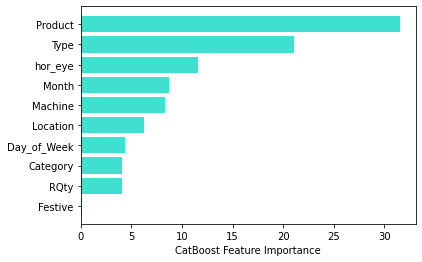

In [250]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(n_db.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

Having transtotal as our dependent variable we see that product is the most important feature 